# Part1 Neural Network Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings,np_utils
warnings.filterwarnings(action='ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.layers import Activation,ReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import mean_absolute_error,mean_squared_error
from keras.layers.normalization import BatchNormalization
import random
from IPython.display import Audio
from scipy.stats import shapiro,f_oneway
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
random.seed(0)
sound_file = 'C:\\Users\\raghavendra.s.k\\Music\\Notification.mp3'
def notify():
    return Audio(sound_file, autoplay=True)

## 1. Import data

In [3]:
df = pd.read_csv('Part- 1,2&3 - Signal (3).csv')

In [4]:
df

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0             7.4        0.700         0.00          1.9        0.076   
1             7.8        0.880         0.00          2.6        0.098   
2             7.8        0.760         0.04          2.3        0.092   
3            11.2        0.280         0.56          1.9        0.075   
4             7.4        0.700         0.00          1.9        0.076   
...           ...          ...          ...          ...          ...   
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1596          6.3        0.510         0.13          2.3        0.076   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0            11.0         34.0      0.99780         3.51          0.56   
1            25.0         67.0      0.99680         3.20          0.68   
2            15.0         54.0      0.99700         3.26          0.65   
3            17.0         60.0      0.99800         3.16          0.58   
4            11.0         34.0      0.99780         3.51          0.56   
...           ...          ...          ...          ...           ...   
1594         32.0         44.0      0.99490         3.45          0.58   
1595         39.0         51.0      0.99512         3.52          0.76   
1596         29.0         40.0      0.99574         3.42          0.75   
1597         32.0         44.0      0.99547         3.57          0.71   
1598         18.0         42.0      0.99549         3.39          0.66   

      Parameter 11  Signal_Strength  
0              9.4                5  
1              9.8                5  
2              9.8                5  
3              9.8                6  
4              9.4                5  
...            ...              ...  
1594          10.5                5  
1595          11.2                6  
1596          11.0                6  
1597          10.2                5  
1598          11.0                6  

[1599 rows x 12 columns]

## 2.Data analysis & visualisation:
### •Perform relevant and detailed statistical analysis on the data.
### •Perform relevant and detailed uni, bi and multi variate analysis.Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns 

In [5]:
df.corr()['Signal_Strength'].sort_values(ascending=False)

# Parameter 4,Parameter 6 and Parameter 9 does not correlate much with the Targe "Signal_strength"

Signal_Strength    1.000000
Parameter 11       0.476166
Parameter 10       0.251397
Parameter 3        0.226373
Parameter 1        0.124052
Parameter 4        0.013732
Parameter 6       -0.050656
Parameter 9       -0.057731
Parameter 5       -0.128907
Parameter 8       -0.174919
Parameter 7       -0.185100
Parameter 2       -0.390558
Name: Signal_Strength, dtype: float64

<AxesSubplot:xlabel='Parameter 1', ylabel='Density'>

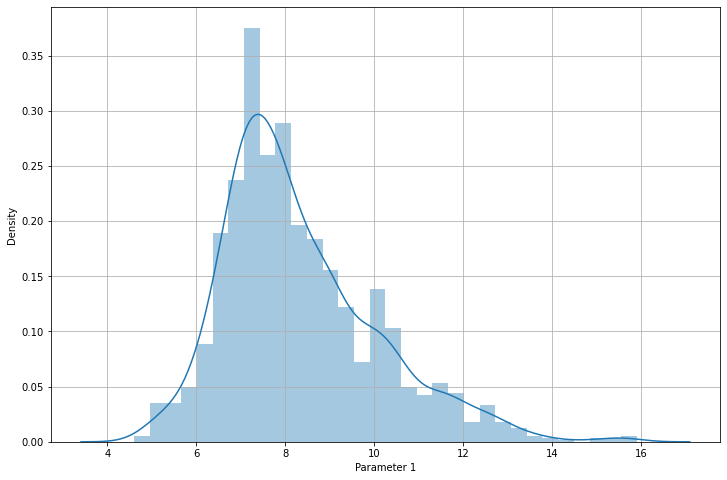

In [7]:
plt.figure(figsize=(12,8))
plt.grid()
sns.distplot(df['Parameter 1'])

# There is a little skewness in the data

In [8]:
# Ho = "The column is not normally distributed"
# Ha = "The column is normally distributed"
stat,Pvalue = shapiro(df['Parameter 1'])
if Pvalue<0.5:
    print(f"We reject null hypothesis as pvalue is {round(Pvalue)} and the data is normally distributed")
else:
    print("We fail to reject null hypothesis")

We reject null hypothesis as pvalue is 0 and the data is normally distributed


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 1'>

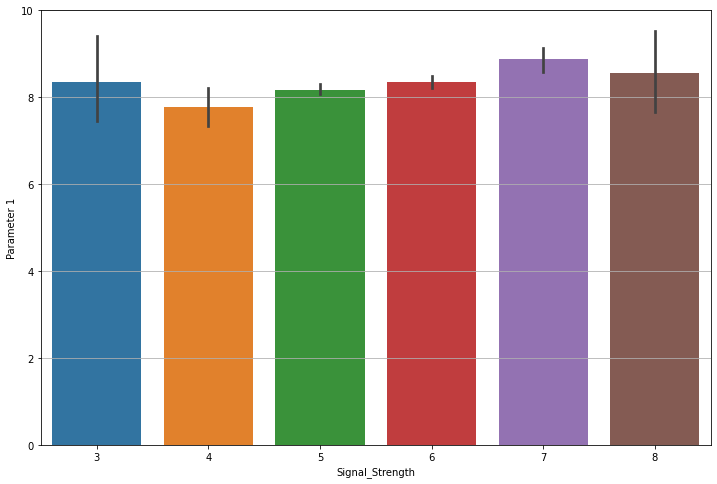

In [9]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 1'])
#We see a very mild connection between target and parameter 1

In [10]:
df.groupby('Signal_Strength')['Parameter 1'].mean()

Signal_Strength
3    8.360000
4    7.779245
5    8.167254
6    8.347179
7    8.872362
8    8.566667
Name: Parameter 1, dtype: float64

In [11]:
# Ho = "There is no connect between Parameter 1 and target"
# Ha = "There is a connect between Parameter 1 and target"

stat,Pvalue = f_oneway(df[df['Signal_Strength']==3]['Parameter 1'],df[df['Signal_Strength']==4]['Parameter 1'],df[df['Signal_Strength']==5]['Parameter 1'],df[df['Signal_Strength']==6]['Parameter 1'],df[df['Signal_Strength']==7]['Parameter 1'],df[df['Signal_Strength']==8]['Parameter 1'])
if Pvalue<0.5:
    print(f"We reject null hypothesis as pvalue is {round(Pvalue)} and there is a connect between Parameter 1 and target")
else:
    print("We fail to reject null hypothesis")

We reject null hypothesis as pvalue is 0 and there is a connect between Parameter 1 and target


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 1'>

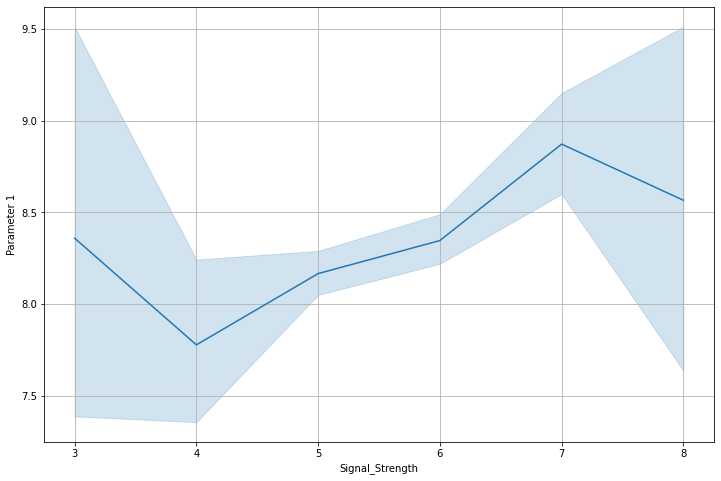

In [12]:
plt.figure(figsize=(12,8))
plt.grid()
sns.lineplot(df['Signal_Strength'],df['Parameter 1'])

<AxesSubplot:xlabel='Parameter 1', ylabel='Parameter 9'>

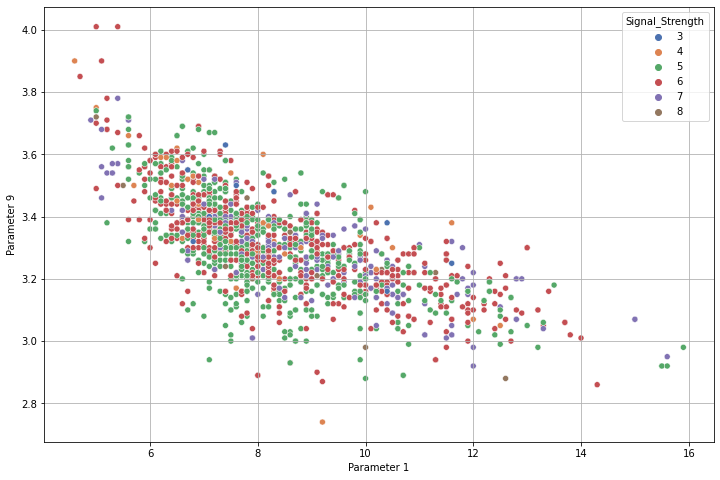

In [13]:
plt.figure(figsize=(12,8))
plt.grid()
sns.scatterplot(df['Parameter 1'],df['Parameter 9'],hue=df['Signal_Strength'],palette='deep')

<AxesSubplot:xlabel='Parameter 1', ylabel='Parameter 3'>

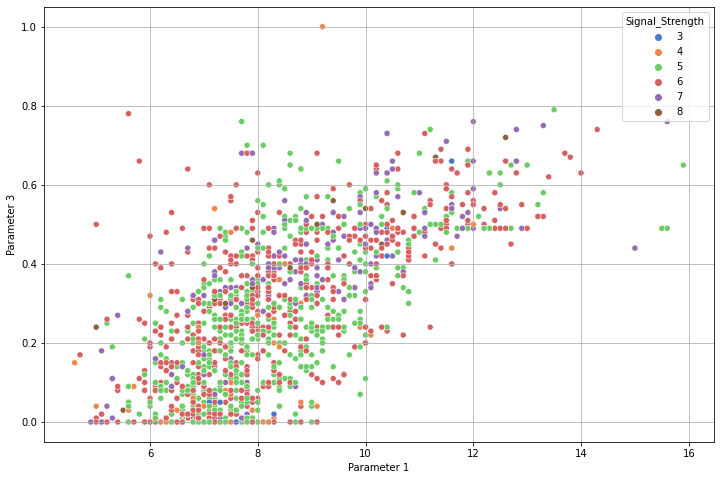

In [14]:
plt.figure(figsize=(12,8))
plt.grid()
sns.scatterplot(df['Parameter 1'],df['Parameter 3'],hue=df['Signal_Strength'],palette='muted')

<AxesSubplot:xlabel='Parameter 2', ylabel='Density'>

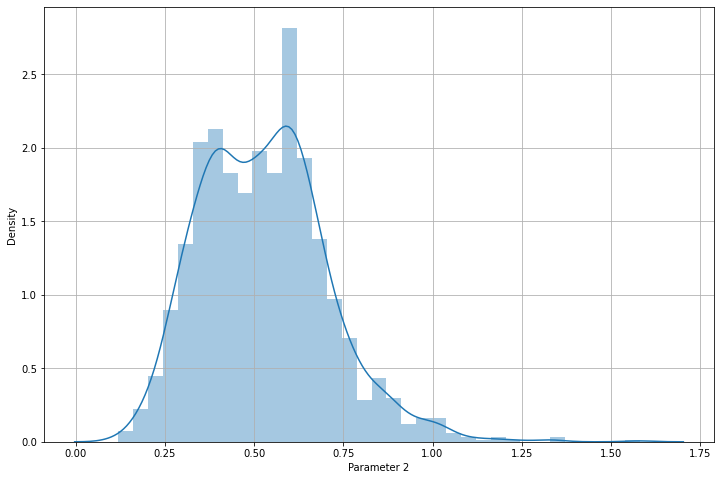

In [15]:
plt.figure(figsize=(12,8))
plt.grid()
sns.distplot(df['Parameter 2'])

<AxesSubplot:xlabel='Parameter 2'>

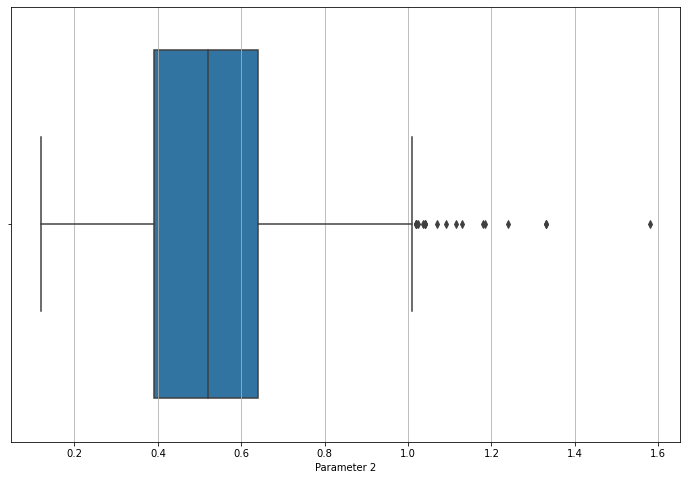

In [16]:
plt.figure(figsize=(12,8))
plt.grid()
sns.boxplot(df['Parameter 2'])

In [17]:
df.corr()['Parameter 2'].sort_values(ascending=False)

Parameter 2        1.000000
Parameter 9        0.234937
Parameter 7        0.076470
Parameter 5        0.061298
Parameter 8        0.022026
Parameter 4        0.001918
Parameter 6       -0.010504
Parameter 11      -0.202288
Parameter 1       -0.256131
Parameter 10      -0.260987
Signal_Strength   -0.390558
Parameter 3       -0.552496
Name: Parameter 2, dtype: float64

<AxesSubplot:xlabel='Parameter 2', ylabel='Parameter 3'>

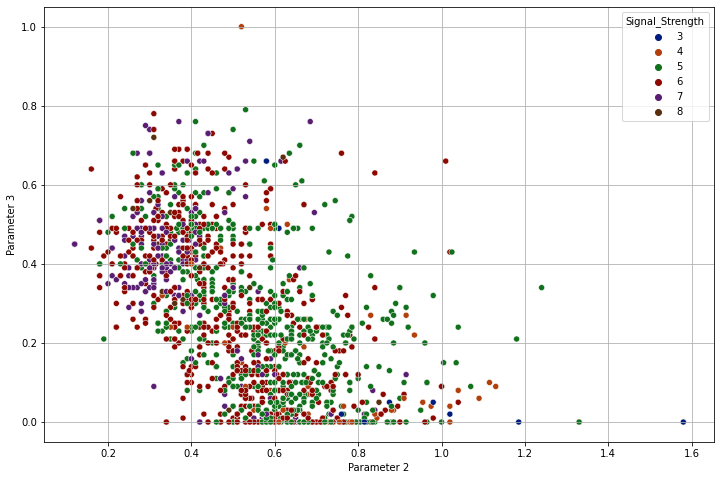

In [18]:
plt.figure(figsize=(12,8))
plt.grid()
sns.scatterplot(df['Parameter 2'],df['Parameter 3'],hue=df['Signal_Strength'],palette='dark')

<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 2'>

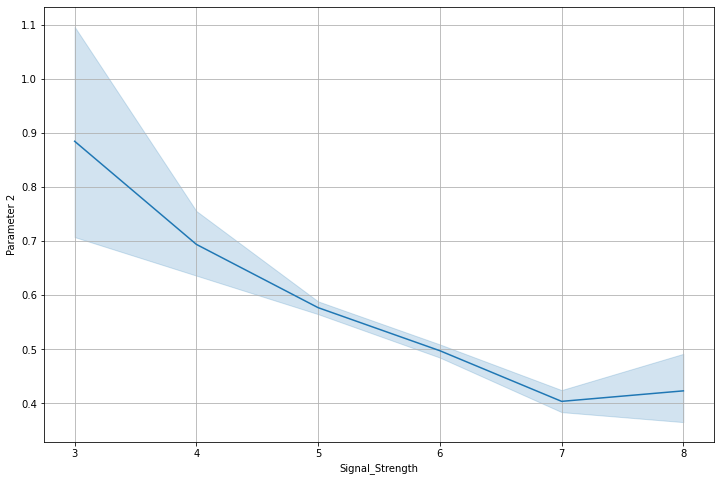

In [19]:
plt.figure(figsize=(12,8))
plt.grid()
sns.lineplot(df['Signal_Strength'],df['Parameter 2'])

<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 3'>

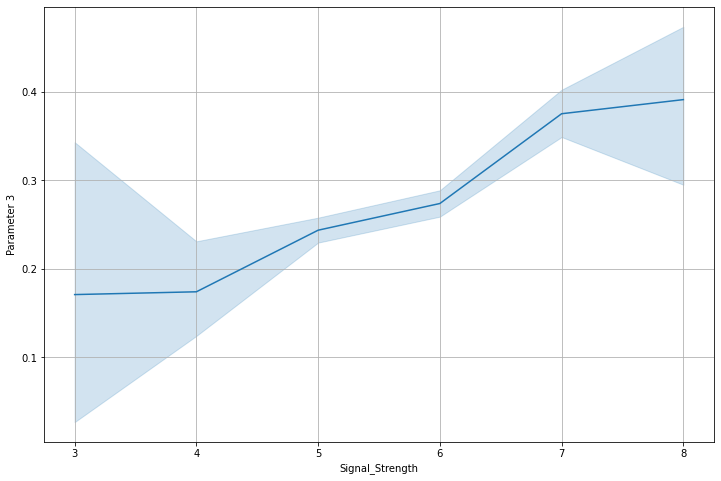

In [20]:
plt.figure(figsize=(12,8))
plt.grid()
sns.lineplot(df['Signal_Strength'],df['Parameter 3'])

# We try PCA to reduce the features to lesser dimensions

In [22]:
pca = PCA(n_components=5)
SS = StandardScaler()
features = SS.fit_transform(df.drop('Signal_Strength',axis=1))

In [23]:
pca.fit(features)

PCA(n_components=5)

In [24]:
[i*100 for  i in pca.explained_variance_ratio_]

#70% variance explained by 4 components, we can also try keeping 5 components

[28.17393127884516,
 17.508269905390712,
 14.095849898004953,
 11.029386641613897,
 8.720837012249948]

In [25]:
transformed_features = pca.transform(features)
df1 = pd.DataFrame(transformed_features,columns=['Feature1','Feature2','Feature3','Feature4','Feature5'])
df1['Signal_Strength'] = df['Signal_Strength']

In [26]:
df1

Feature1  Feature2  Feature3  Feature4  Feature5  Signal_Strength
0    -1.619530  0.450950 -1.774454  0.043740  0.067014                5
1    -0.799170  1.856553 -0.911690  0.548066 -0.018392                5
2    -0.748479  0.882039 -1.171394  0.411021 -0.043531                5
3     2.357673 -0.269976  0.243489 -0.928450 -1.499149                6
4    -1.619530  0.450950 -1.774454  0.043740  0.067014                5
...        ...       ...       ...       ...       ...              ...
1594 -2.150500  0.814286  0.617063  0.407687 -0.240936                5
1595 -2.214496  0.893101  1.807402  0.414003  0.119592                6
1596 -1.456129  0.311746  1.124239  0.491877  0.193716                6
1597 -2.270518  0.979791  0.627965  0.639770  0.067735                5
1598 -0.426975 -0.536690  1.628955 -0.391716  0.450482                6

[1599 rows x 6 columns]

In [27]:
df1.corr()['Signal_Strength'].sort_values(ascending=False)
#Now we see a better correlation with 4 features except 1

Signal_Strength    1.000000
Feature3           0.399274
Feature1           0.110349
Feature5           0.101539
Feature4          -0.044159
Feature2          -0.386802
Name: Signal_Strength, dtype: float64

<AxesSubplot:xlabel='Signal_Strength', ylabel='Feature3'>

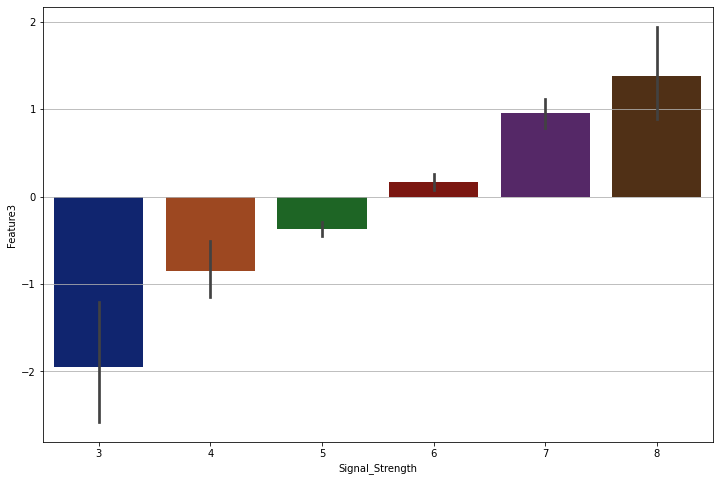

In [28]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df1['Signal_Strength'],df1['Feature3'],palette='dark')

<AxesSubplot:xlabel='Signal_Strength', ylabel='Feature1'>

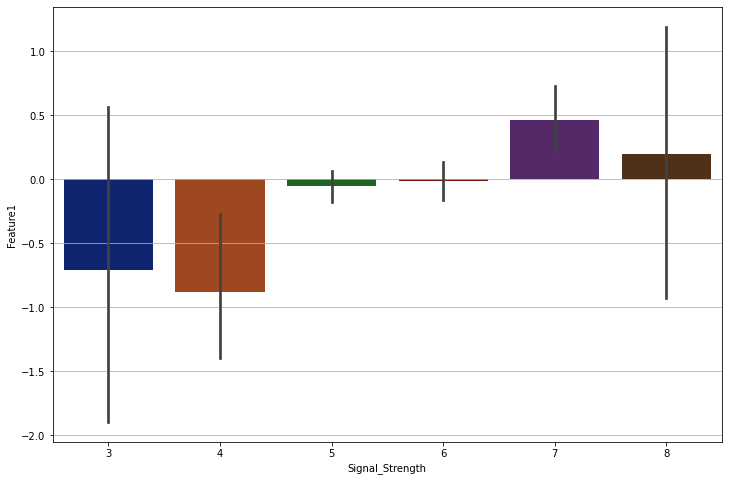

In [29]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df1['Signal_Strength'],df1['Feature1'],palette='dark')

<AxesSubplot:xlabel='Signal_Strength', ylabel='Feature2'>

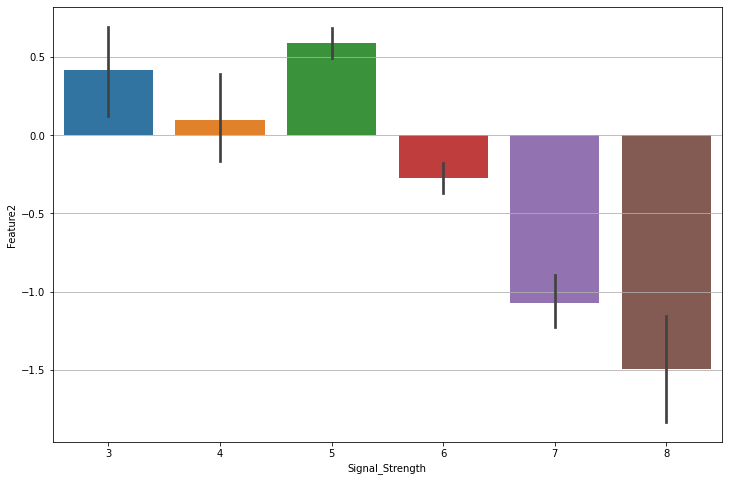

In [30]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df1['Signal_Strength'],df1['Feature2'])

<AxesSubplot:xlabel='Signal_Strength', ylabel='Feature5'>

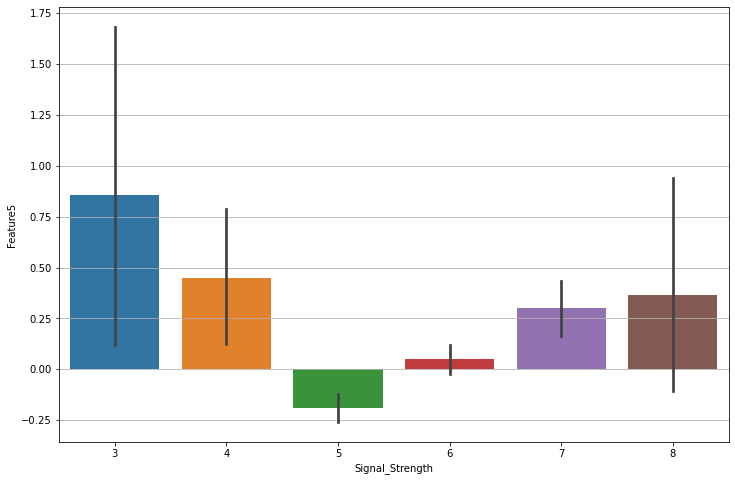

In [31]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df1['Signal_Strength'],df1['Feature5'])

<AxesSubplot:xlabel='Signal_Strength', ylabel='Feature4'>

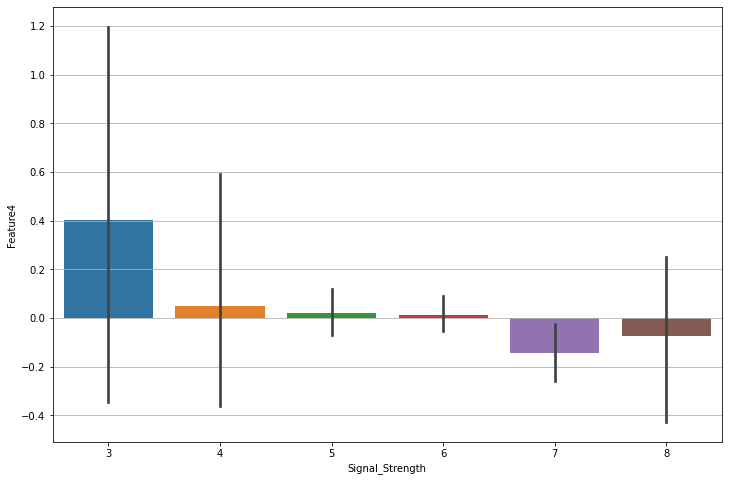

In [32]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df1['Signal_Strength'],df1['Feature4'])

In [33]:
df1['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Source - We have 2 source of data
## Source1: df : The actual data imported in from the source file
## Source2: df1 : PCA decomposed source data

In [34]:
df1.head()

Feature1  Feature2  Feature3  Feature4  Feature5  Signal_Strength
0 -1.619530  0.450950 -1.774454  0.043740  0.067014                5
1 -0.799170  1.856553 -0.911690  0.548066 -0.018392                5
2 -0.748479  0.882039 -1.171394  0.411021 -0.043531                5
3  2.357673 -0.269976  0.243489 -0.928450 -1.499149                6
4 -1.619530  0.450950 -1.774454  0.043740  0.067014                5

In [35]:
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [36]:
from scipy.stats import shapiro,f_oneway

<AxesSubplot:xlabel='Signal_Strength', ylabel='Density'>

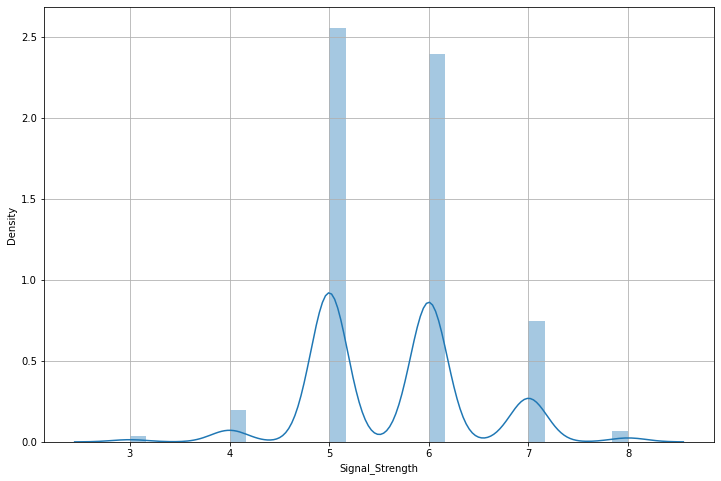

In [37]:
plt.figure(figsize=(12,8))
plt.grid()
sns.distplot(df['Signal_Strength'])

In [38]:
# Ha = "The Signal_strength is not normally distributed"
# Ho = "The Signal_strength is normally distributed"

statistic,P_value = shapiro(df['Signal_Strength'])
if P_value<0.5:
    print("The signal strength is not normally distributed")
else:
    print("The signal strength is normally distributed")

The signal strength is not normally distributed


## The Signal_Strength is not normally distributed. We see that the shapiro test telling us that the data is not normally distributed. Also if a data is not normally distributed but continuous then as per Central Limit theorem with more than 30 samples the data should become a normal distribution but here it is multi modal and the range of data is from 3 to 8 which clearly tells that the target is a discrete data.

## FYI: Target is discrete and does not even show a binomial or poisson distribution

In [39]:
df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 1'>

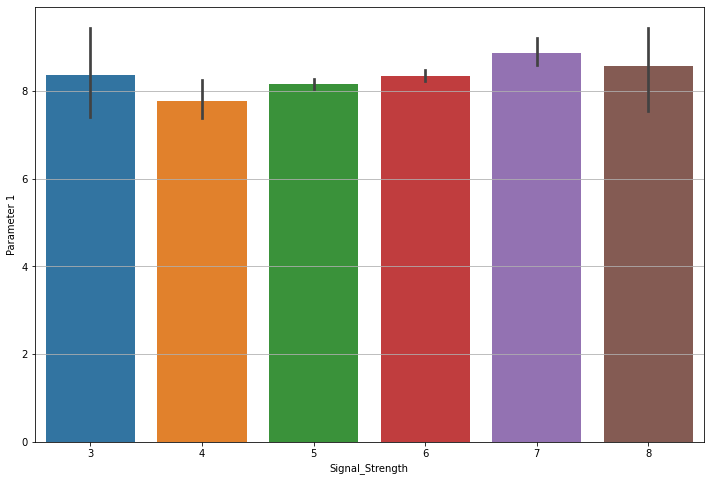

In [40]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 1'])

#Ho Parameter1 does not play a role in signal Strength
#Ha Parameter1 plays a role in signal Strength

In [41]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 1'],df[df['Signal_Strength']==6]['Parameter 1'],df[df['Signal_Strength']==7]['Parameter 1'],df[df['Signal_Strength']==4]['Parameter 1'],df[df['Signal_Strength']==8]['Parameter 1'],df[df['Signal_Strength']==3]['Parameter 1'])
print(round(p_value,3))
#Ha Parameter1 plays a role in signal Strength

0.0


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 2'>

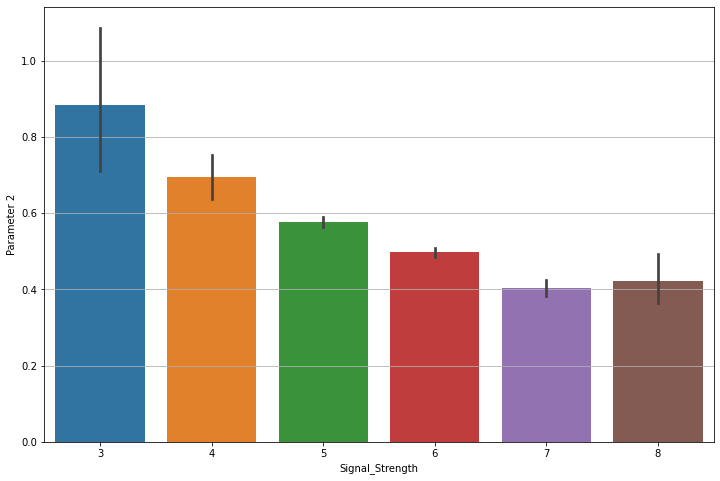

In [42]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 2'])

In [43]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 2'],df[df['Signal_Strength']==6]['Parameter 2'],df[df['Signal_Strength']==7]['Parameter 2'],df[df['Signal_Strength']==4]['Parameter 2'],df[df['Signal_Strength']==8]['Parameter 2'],df[df['Signal_Strength']==3]['Parameter 2'])
print(round(p_value,3))
#Ha Parameter2 plays a role in signal Strength

0.0


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 3'>

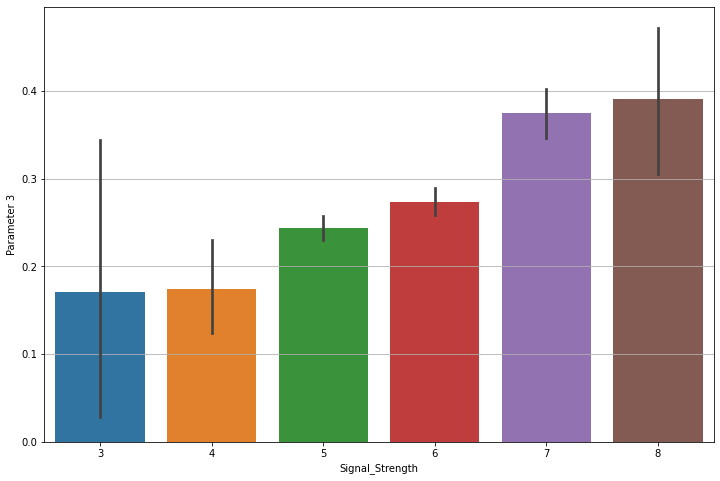

In [44]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 3'])

In [45]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 3'],df[df['Signal_Strength']==6]['Parameter 3'],df[df['Signal_Strength']==7]['Parameter 3'],df[df['Signal_Strength']==4]['Parameter 3'],df[df['Signal_Strength']==8]['Parameter 3'],df[df['Signal_Strength']==3]['Parameter 3'])
print(round(p_value,3))
#Ha Parameter3 plays a role in signal Strength

0.0


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 4'>

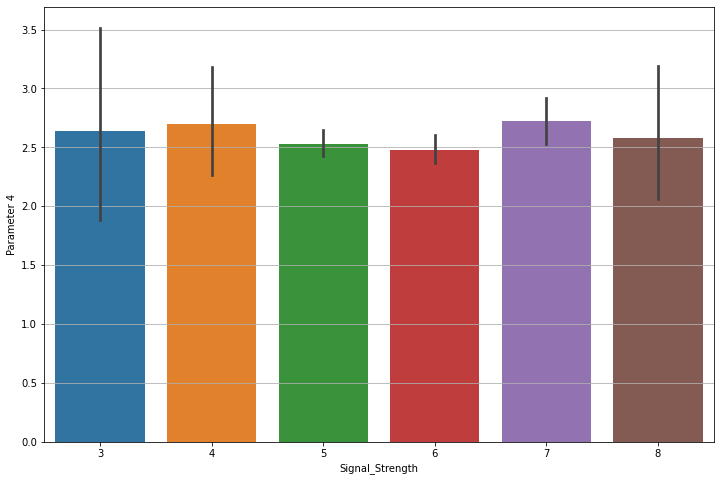

In [46]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 4'])

In [47]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 4'],df[df['Signal_Strength']==6]['Parameter 4'],df[df['Signal_Strength']==7]['Parameter 4'],df[df['Signal_Strength']==4]['Parameter 4'],df[df['Signal_Strength']==8]['Parameter 4'],df[df['Signal_Strength']==3]['Parameter 4'])
print(round(p_value,3))
#Ha Parameter4 plays a role in signal Strength

0.385


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 5'>

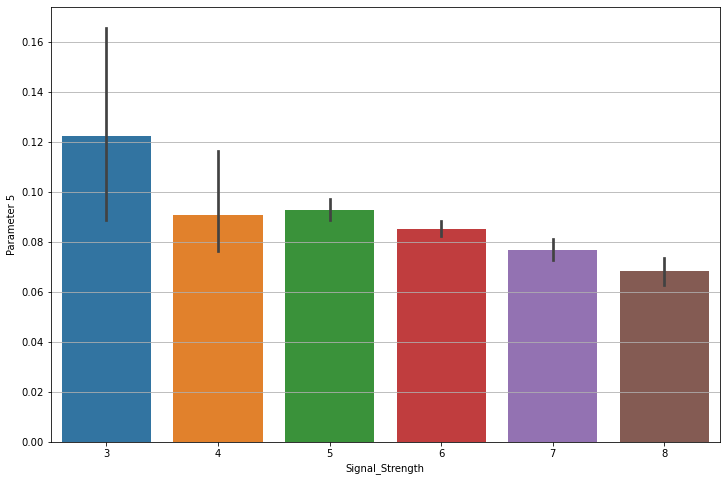

In [48]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 5'])

In [49]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 5'],df[df['Signal_Strength']==6]['Parameter 5'],df[df['Signal_Strength']==7]['Parameter 5'],df[df['Signal_Strength']==4]['Parameter 5'],df[df['Signal_Strength']==8]['Parameter 5'],df[df['Signal_Strength']==3]['Parameter 5'])
print(round(p_value,3))
#Ha Parameter5 plays a role in signal Strength

0.0


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 6'>

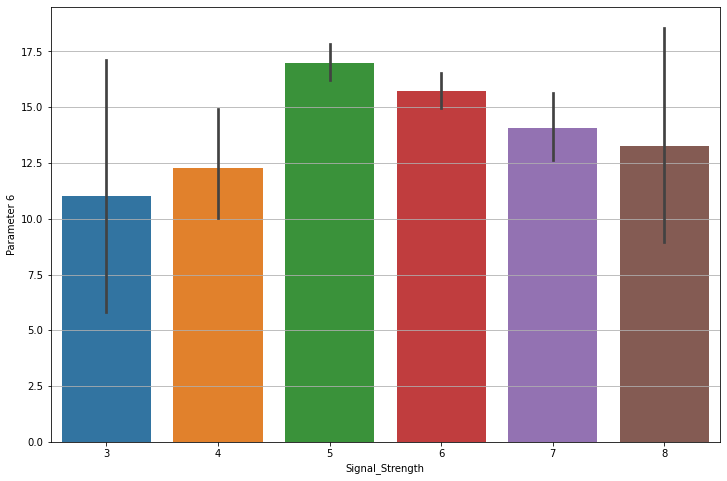

In [50]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 6'])

In [51]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 6'],df[df['Signal_Strength']==6]['Parameter 6'],df[df['Signal_Strength']==7]['Parameter 6'],df[df['Signal_Strength']==4]['Parameter 6'],df[df['Signal_Strength']==8]['Parameter 6'],df[df['Signal_Strength']==3]['Parameter 6'])
print(round(p_value,3))
#Ha Parameter6 plays a role in signal Strength

0.0


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 7'>

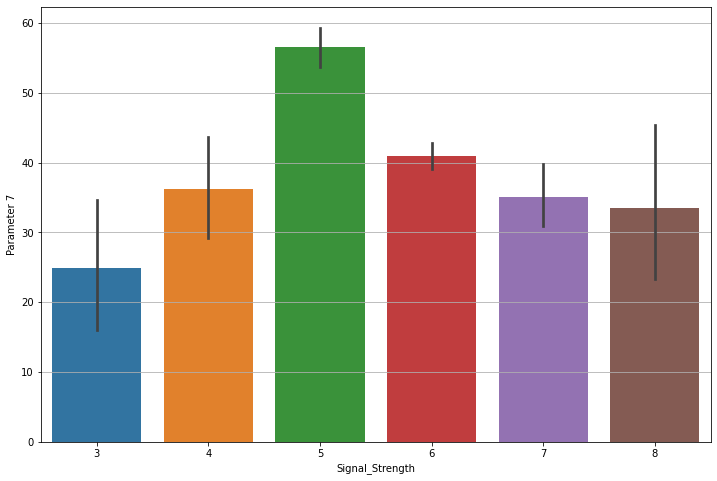

In [52]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 7'])

In [53]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 7'],df[df['Signal_Strength']==6]['Parameter 7'],df[df['Signal_Strength']==7]['Parameter 7'],df[df['Signal_Strength']==4]['Parameter 7'],df[df['Signal_Strength']==8]['Parameter 7'],df[df['Signal_Strength']==3]['Parameter 7'])
print(round(p_value,3))
#Ha Parameter7 plays a role in signal Strength

0.0


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 8'>

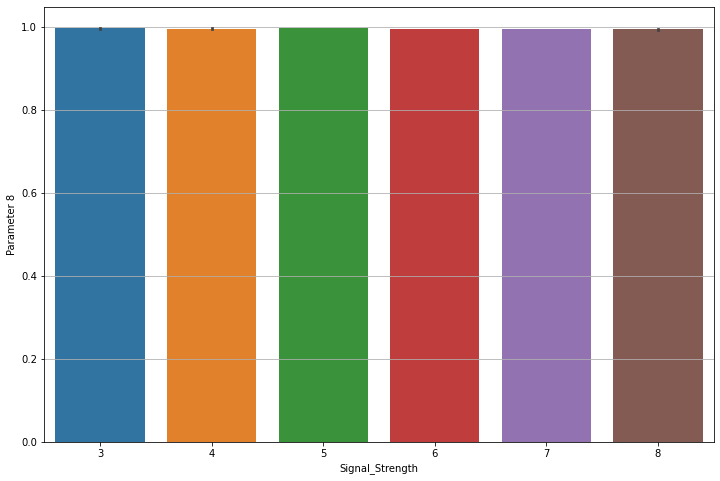

In [54]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 8'])

In [55]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 8'],df[df['Signal_Strength']==6]['Parameter 8'],df[df['Signal_Strength']==7]['Parameter 8'],df[df['Signal_Strength']==4]['Parameter 8'],df[df['Signal_Strength']==8]['Parameter 8'],df[df['Signal_Strength']==3]['Parameter 8'])
print(round(p_value,3))
#Ha Parameter8 plays a role in signal Strength

0.0


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 9'>

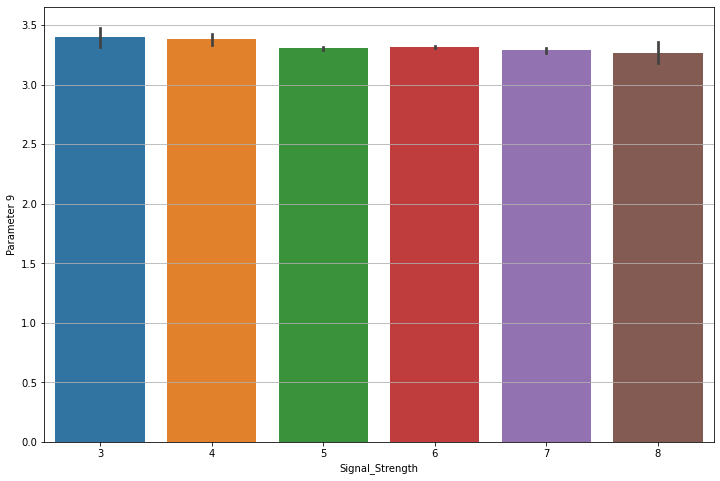

In [56]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 9'])

In [57]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 9'],df[df['Signal_Strength']==6]['Parameter 9'],df[df['Signal_Strength']==7]['Parameter 9'],df[df['Signal_Strength']==4]['Parameter 9'],df[df['Signal_Strength']==8]['Parameter 9'],df[df['Signal_Strength']==3]['Parameter 9'])
print(round(p_value,3))
#Ha Parameter9 plays a role in signal Strength

0.001


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 10'>

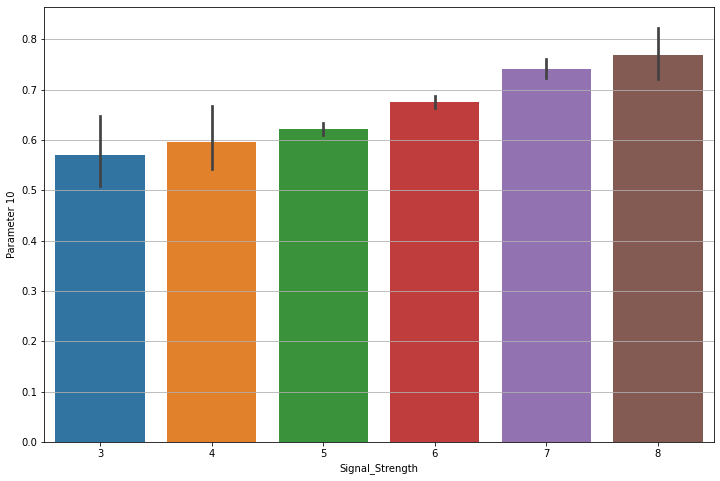

In [58]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 10'])

In [59]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 10'],df[df['Signal_Strength']==6]['Parameter 10'],df[df['Signal_Strength']==7]['Parameter 10'],df[df['Signal_Strength']==4]['Parameter 10'],df[df['Signal_Strength']==8]['Parameter 10'],df[df['Signal_Strength']==3]['Parameter 10'])
print(round(p_value,3))
#Ha Parameter10 plays a role in signal Strength

0.0


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 11'>

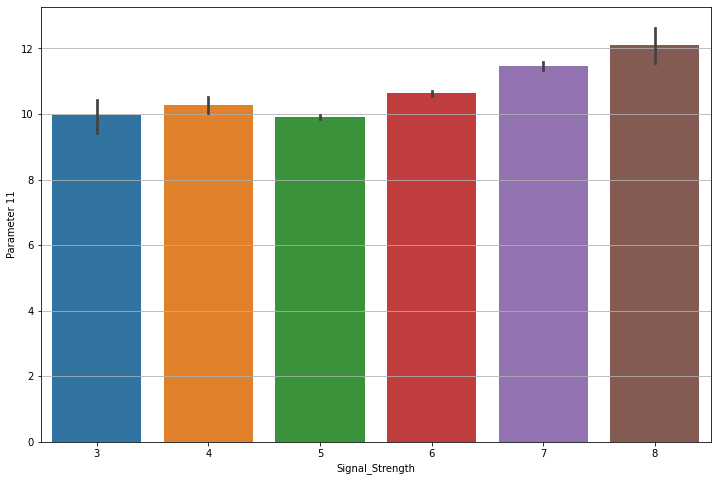

In [60]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 11'])

In [61]:
statistic,p_value = f_oneway(df[df['Signal_Strength']==5]['Parameter 11'],df[df['Signal_Strength']==6]['Parameter 11'],df[df['Signal_Strength']==7]['Parameter 11'],df[df['Signal_Strength']==4]['Parameter 11'],df[df['Signal_Strength']==8]['Parameter 11'],df[df['Signal_Strength']==3]['Parameter 11'])
print(round(p_value,3))
#Ha Parameter11 plays a role in signal Strength

0.0


In [62]:
df1.corr()['Signal_Strength'].sort_values(ascending=False)

Signal_Strength    1.000000
Feature3           0.399274
Feature1           0.110349
Feature5           0.101539
Feature4          -0.044159
Feature2          -0.386802
Name: Signal_Strength, dtype: float64

In [63]:
df.corr()['Signal_Strength'].sort_values(ascending=False)

Signal_Strength    1.000000
Parameter 11       0.476166
Parameter 10       0.251397
Parameter 3        0.226373
Parameter 1        0.124052
Parameter 4        0.013732
Parameter 6       -0.050656
Parameter 9       -0.057731
Parameter 5       -0.128907
Parameter 8       -0.174919
Parameter 7       -0.185100
Parameter 2       -0.390558
Name: Signal_Strength, dtype: float64

# Design, train, tune and test a neural network regressor. 
#### 1 PCA applied data source 2 - df1

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Signal_Strength',axis=1), df1['Signal_Strength'], test_size=0.3, random_state=11)

# Model1 - PCA -  4 - rmsprop optimizer - tuning Learning rate & momentum 

In [69]:
def RMS_prop(opt):
    model_metrics = pd.DataFrame(columns=['Model','Optimizer','Learning_rate','Momentum','Training Loss','Test Loss'])
    new_dict = {}
    lr = [0.01,0.05,0.1,0.5,0.001,0.005]
    Momentum = [0.8,0.6,0.4]
    try:
        i = model_metrics['Model'].iloc[-1]
        i+=1
    except:
        i = 1
    for l in lr:
        for m in Momentum:
            model1 = Sequential()
            model1.add(Dense(10,input_shape=(5,),activation='relu'))
            model1.add(Dense(8,activation='relu'))
            model1.add(Dense(4,activation='relu'))
            model1.add(Dense(2,activation='relu'))
            model1.add(Dense(1,activation='relu'))
            optimizer = optimizers.RMSprop(lr=l,momentum=m)
            model1.compile(optimizer=optimizer,metrics='mean_absolute_error',loss='mean_absolute_error')
            model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))
            training_pred = model1.predict(X_train)
            training_mae = mean_absolute_error(y_train,training_pred)
            test_pred = model1.predict(X_test)
            test_mae = mean_absolute_error(y_test,test_pred)
            dd = {'Model':i,'Optimizer':opt,'Learning_rate':l,'Momentum':m,'Training Loss':training_mae,'Test Loss':test_mae}
            model_metrics = model_metrics.append(dd,ignore_index=True) 
            i+=1
    return model_metrics    

In [70]:
data1 = RMS_prop('RMSprop')

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 2.0126 - mean_absolute_error: 2.0126 - val_loss: 0.7351 - val_mean_absolute_error: 0.7351
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6902 - mean_absolute_error: 0.6902 - val_loss: 0.6461 - val_mean_absolute_error: 0.6461
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5763 - mean_absolute_error: 0.5763 - val_loss: 0.6233 - val_mean_absolute_error: 0.6233
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5781 - mean_absolute_error: 0.5781 - val_loss: 0.5224 - val_mean_absolute_error: 0.5224
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5486 - mean_absolute_error: 0.5486 - val_loss: 0.5113 - val_mean_absolute_error: 0.5113
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5440 - mean_absolute_error: 0.5440 - val_loss: 0.5115 - val_mean_absolute_error: 0.5115
Epoch 7/50
35/35 [==========

35/35 [==============================] - 1s 8ms/step - loss: 1.2348 - mean_absolute_error: 1.2348 - val_loss: 0.7937 - val_mean_absolute_error: 0.7937
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6650 - mean_absolute_error: 0.6650 - val_loss: 0.6337 - val_mean_absolute_error: 0.6337
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6109 - mean_absolute_error: 0.6109 - val_loss: 0.6218 - val_mean_absolute_error: 0.6218
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5750 - mean_absolute_error: 0.5750 - val_loss: 0.6596 - val_mean_absolute_error: 0.6596
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5703 - mean_absolute_error: 0.5703 - val_loss: 0.5945 - val_mean_absolute_error: 0.5945
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5567 - mean_absolute_error: 0.5567 - val_loss: 0.5299 - val_mean_absolute_error: 0.5299
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 1.5155 - mean_absolute_error: 1.5155 - val_loss: 0.6562 - val_mean_absolute_error: 0.6562
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6630 - mean_absolute_error: 0.6630 - val_loss: 0.6697 - val_mean_absolute_error: 0.6697
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6693 - mean_absolute_error: 0.6693 - val_loss: 0.6812 - val_mean_absolute_error: 0.6812
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7151 - mean_absolute_error: 0.7151 - val_loss: 0.7174 - val_mean_absolute_error: 0.7174
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6953 - mean_absolute_error: 0.6953 - val_loss: 0.6979 - val_mean_absolute_error: 0.6979
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6883 - mean_absolute_error: 0.6883 - val_loss: 0.6949 - val_mean_absolute_error: 0.6949
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 1.5733 - mean_absolute_error: 1.5733 - val_loss: 0.7715 - val_mean_absolute_error: 0.7715
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7064 - mean_absolute_error: 0.7064 - val_loss: 0.6204 - val_mean_absolute_error: 0.6204
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6843 - mean_absolute_error: 0.6843 - val_loss: 0.5677 - val_mean_absolute_error: 0.5677
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6438 - mean_absolute_error: 0.6438 - val_loss: 0.8174 - val_mean_absolute_error: 0.8174
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6389 - mean_absolute_error: 0.6389 - val_loss: 0.5901 - val_mean_absolute_error: 0.5901
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6580 - mean_absolute_error: 0.6580 - val_loss: 0.5528 - val_mean_absolute_error: 0.5528
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 11ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [====================

# model 2 - PCA -  4 - rmsprop optimizer - tuning Learning rate & momentum

In [71]:
def RMS_prop(opt):
    model_metrics = pd.DataFrame(columns=['Model','Optimizer','Learning_rate','Momentum','Training Loss','Test Loss'])
    new_dict = {}
    lr = [0.01,0.05,0.1,0.5,0.001,0.005]
    Momentum = [0.8,0.6,0.4]
    try:
        i = model_metrics['Model'].iloc[-1]
        i+=1
    except:
        i = 1
    for l in lr:
        for m in Momentum:
            model1 = Sequential()
            model1.add(Dense(10,input_shape=(5,),activation='relu'))
            model1.add(Dense(8,activation='relu'))
            model1.add(Dense(4,activation='relu'))
            model1.add(Dense(2,activation='relu'))
            model1.add(Dense(1,activation='relu'))
            optimizer = optimizers.RMSprop(lr=l,momentum=m)
            model1.compile(optimizer=optimizer,metrics='mean_absolute_error',loss='mean_absolute_error')
            model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))
            training_pred = model1.predict(X_train)
            training_mae = mean_absolute_error(y_train,training_pred)
            test_pred = model1.predict(X_test)
            test_mae = mean_absolute_error(y_test,test_pred)
            dd = {'Model':i,'Optimizer':opt,'Learning_rate':l,'Momentum':m,'Training Loss':training_mae,'Test Loss':test_mae}
            model_metrics = model_metrics.append(dd,ignore_index=True) 
            i+=1
    notify()
    return model_metrics    

In [72]:
data2 = RMS_prop('RMSprop')

Epoch 1/50
35/35 [==============================] - 1s 9ms/step - loss: 1.9769 - mean_absolute_error: 1.9769 - val_loss: 0.7686 - val_mean_absolute_error: 0.7686
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6070 - mean_absolute_error: 0.6070 - val_loss: 0.5841 - val_mean_absolute_error: 0.5841
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5743 - mean_absolute_error: 0.5743 - val_loss: 0.5324 - val_mean_absolute_error: 0.5324
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5326 - mean_absolute_error: 0.5326 - val_loss: 0.5821 - val_mean_absolute_error: 0.5821
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5399 - mean_absolute_error: 0.5399 - val_loss: 0.5790 - val_mean_absolute_error: 0.5790
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5307 - mean_absolute_error: 0.5307 - val_loss: 0.5603 - val_mean_absolute_error: 0.5603
Epoch 7/50
35/35 [==========

35/35 [==============================] - 1s 9ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.0742 - mean_absolute_error: 1.0742 - val_loss: 0.7537 - val_mean_absolute_error: 0.7537
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5936 - mean_absolute_error: 0.5936 - val_loss: 0.5384 - val_mean_absolute_error: 0.5384
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5568 - mean_absolute_error: 0.5568 - val_loss: 0.6266 - val_mean_absolute_error: 0.6266
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5807 - mean_absolute_error: 0.5807 - val_loss: 0.4992 - val_mean_absolute_error: 0.4992
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5706 - mean_absolute_error: 0.5706 - val_loss: 0.5367 - val_mean_absolute_error: 0.5367
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5617 - mean_absolute_error: 0.5617 - val_loss: 0.5715 - val_mean_absolute_error: 0.5715
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.3935 - mean_absolute_error: 1.3935 - val_loss: 1.6459 - val_mean_absolute_error: 1.6459
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8805 - mean_absolute_error: 0.8805 - val_loss: 0.7943 - val_mean_absolute_error: 0.7943
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6416 - mean_absolute_error: 0.6416 - val_loss: 0.6842 - val_mean_absolute_error: 0.6842
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6503 - mean_absolute_error: 0.6503 - val_loss: 0.5290 - val_mean_absolute_error: 0.5290
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6288 - mean_absolute_error: 0.6288 - val_loss: 0.5692 - val_mean_absolute_error: 0.5692
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6285 - mean_absolute_error: 0.6285 - val_loss: 0.7359 - val_mean_absolute_error: 0.7359
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 9.7005 - mean_absolute_error: 9.7005 - val_loss: 0.7118 - val_mean_absolute_error: 0.7118
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7415 - mean_absolute_error: 0.7415 - val_loss: 0.6901 - val_mean_absolute_error: 0.6901
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7365 - mean_absolute_error: 0.7365 - val_loss: 0.7168 - val_mean_absolute_error: 0.7168
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7291 - mean_absolute_error: 0.7291 - val_loss: 0.7378 - val_mean_absolute_error: 0.7378
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7246 - mean_absolute_error: 0.7246 - val_loss: 1.0971 - val_mean_absolute_error: 1.0971
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7272 - mean_absolute_error: 0.7272 - val_loss: 0.7145 - val_mean_absolute_error: 0.7145
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 3.7894 - mean_absolute_error: 3.7894 - val_loss: 1.7132 - val_mean_absolute_error: 1.7132
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.2786 - mean_absolute_error: 1.2786 - val_loss: 1.0660 - val_mean_absolute_error: 1.0660
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9420 - mean_absolute_error: 0.9420 - val_loss: 0.8743 - val_mean_absolute_error: 0.8743
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7915 - mean_absolute_error: 0.7915 - val_loss: 0.7591 - val_mean_absolute_error: 0.7591
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6911 - mean_absolute_error: 0.6911 - val_loss: 0.6493 - val_mean_absolute_error: 0.6493
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6213 - mean_absolute_error: 0.6213 - val_loss: 0.6156 - val_mean_absolute_error: 0.6156
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 4.3281 - mean_absolute_error: 4.3281 - val_loss: 3.4596 - val_mean_absolute_error: 3.4596
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 2.7672 - mean_absolute_error: 2.7672 - val_loss: 2.1221 - val_mean_absolute_error: 2.1221
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 1.8648 - mean_absolute_error: 1.8648 - val_loss: 1.6323 - val_mean_absolute_error: 1.6323
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 1.4627 - mean_absolute_error: 1.4627 - val_loss: 1.3013 - val_mean_absolute_error: 1.3013
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 1.1846 - mean_absolute_error: 1.1846 - val_loss: 1.1096 - val_mean_absolute_error: 1.1096
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 1.0067 - mean_absolute_error: 1.0067 - val_loss: 0.9827 - val_mean_absolute_error: 0.9827
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.9986 - mean_absolute_error: 1.9986 - val_loss: 0.8707 - val_mean_absolute_error: 0.8707
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7235 - mean_absolute_error: 0.7235 - val_loss: 0.6697 - val_mean_absolute_error: 0.6697
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6067 - mean_absolute_error: 0.6067 - val_loss: 0.6423 - val_mean_absolute_error: 0.6423
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5592 - mean_absolute_error: 0.5592 - val_loss: 0.5649 - val_mean_absolute_error: 0.5649
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5528 - mean_absolute_error: 0.5528 - val_loss: 0.5574 - val_mean_absolute_error: 0.5574
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5432 - mean_absolute_error: 0.5432 - val_loss: 0.5786 - val_mean_absolute_error: 0.5786
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.6623 - mean_absolute_error: 1.6623 - val_loss: 1.0258 - val_mean_absolute_error: 1.0258
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7754 - mean_absolute_error: 0.7754 - val_loss: 0.6991 - val_mean_absolute_error: 0.6991
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6033 - mean_absolute_error: 0.6033 - val_loss: 0.6188 - val_mean_absolute_error: 0.6188
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5595 - mean_absolute_error: 0.5595 - val_loss: 0.5729 - val_mean_absolute_error: 0.5729
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5424 - mean_absolute_error: 0.5424 - val_loss: 0.6213 - val_mean_absolute_error: 0.6213
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5341 - mean_absolute_error: 0.5341 - val_loss: 0.5469 - val_mean_absolute_error: 0.5469
Epoch 7/50
35/35 [=====================

# Model3 PCA- Stochastic gradient descent - tuning Learning rate, Momentum and decay

In [73]:
def RMS_prop(opt):
    model_metrics = pd.DataFrame(columns=['Model','Optimizer','Learning_rate','Momentum','Decay','Training Loss','Test Loss'])
    new_dict = {}
    lr = [0.01,0.05,0.1,0.5,0.001,0.005]
    Momentum = [0.8,0.6,0.4]
    decay = [1e-6,1e-4,1e-2,1]
    try:
        i = model_metrics['Model'].iloc[-1]
        i+=1
    except:
        i = 1
    for l in lr:
        for m in Momentum:
            for d in decay:
                model1 = Sequential()
                model1.add(Dense(10,input_shape=(5,),activation='relu'))
                model1.add(Dense(8,activation='relu'))
                model1.add(Dense(4,activation='relu'))
                model1.add(Dense(2,activation='relu'))
                model1.add(Dense(1,activation='relu'))
                sgd = optimizers.SGD(lr=l, decay=d, momentum=m)
                model1.compile(optimizer=sgd,metrics='mean_absolute_error',loss='mean_absolute_error')
                model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))
                training_pred = model1.predict(X_train)
                training_mae = mean_absolute_error(y_train,training_pred)
                test_pred = model1.predict(X_test)
                test_mae = mean_absolute_error(y_test,test_pred)
                dd = {'Model':i,'Optimizer':opt,'Learning_rate':l,'Momentum':m,'Decay':d,'Training Loss':training_mae,'Test Loss':test_mae}
                model_metrics = model_metrics.append(dd,ignore_index=True) 
                i+=1
    notify()
    return model_metrics    

In [74]:
data3 = RMS_prop('SGD')

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [==========

35/35 [==============================] - 1s 9ms/step - loss: 4.9746 - mean_absolute_error: 4.9746 - val_loss: 3.8617 - val_mean_absolute_error: 3.8617
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 2.0120 - mean_absolute_error: 2.0120 - val_loss: 0.9155 - val_mean_absolute_error: 0.9155
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7074 - mean_absolute_error: 0.7074 - val_loss: 0.6523 - val_mean_absolute_error: 0.6523
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5991 - mean_absolute_error: 0.5991 - val_loss: 0.6045 - val_mean_absolute_error: 0.6045
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5644 - mean_absolute_error: 0.5644 - val_loss: 0.5928 - val_mean_absolute_error: 0.5928
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5555 - mean_absolute_error: 0.5555 - val_loss: 0.5702 - val_mean_absolute_error: 0.5702
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 10ms/step - loss: 5.2668 - mean_absolute_error: 5.2668 - val_loss: 4.8197 - val_mean_absolute_error: 4.8197
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 4.3508 - mean_absolute_error: 4.3508 - val_loss: 3.8132 - val_mean_absolute_error: 3.8132
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 2.7282 - mean_absolute_error: 2.7282 - val_loss: 0.9162 - val_mean_absolute_error: 0.9162
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7641 - mean_absolute_error: 0.7641 - val_loss: 0.6817 - val_mean_absolute_error: 0.6817
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6002 - mean_absolute_error: 0.6002 - val_loss: 0.5837 - val_mean_absolute_error: 0.5837
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5472 - mean_absolute_error: 0.5472 - val_loss: 0.5634 - val_mean_absolute_error: 0.5634
Epoch 7/50
35/35 [====================

35/35 [==============================] - 1s 8ms/step - loss: 5.2574 - mean_absolute_error: 5.2574 - val_loss: 4.7971 - val_mean_absolute_error: 4.7971
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 4.2148 - mean_absolute_error: 4.2148 - val_loss: 3.4093 - val_mean_absolute_error: 3.4093
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 1.5638 - mean_absolute_error: 1.5638 - val_loss: 0.7334 - val_mean_absolute_error: 0.7334
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6003 - mean_absolute_error: 0.6003 - val_loss: 0.6013 - val_mean_absolute_error: 0.6013
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5558 - mean_absolute_error: 0.5558 - val_loss: 0.5677 - val_mean_absolute_error: 0.5677
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5345 - mean_absolute_error: 0.5345 - val_loss: 0.5608 - val_mean_absolute_error: 0.5608
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.3683 - mean_absolute_error: 5.3683 - val_loss: 5.3151 - val_mean_absolute_error: 5.3151
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.2748 - mean_absolute_error: 5.2748 - val_loss: 5.2680 - val_mean_absolute_error: 5.2680
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.2386 - mean_absolute_error: 5.2386 - val_loss: 5.2397 - val_mean_absolute_error: 5.2397
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.2145 - mean_absolute_error: 5.2145 - val_loss: 5.2190 - val_mean_absolute_error: 5.2190
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1963 - mean_absolute_error: 5.1963 - val_loss: 5.2028 - val_mean_absolute_error: 5.2028
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1815 - mean_absolute_error: 5.1815 - val_loss: 5.1894 - val_mean_absolute_error: 5.1894
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 5.3614 - mean_absolute_error: 5.3614 - val_loss: 5.0309 - val_mean_absolute_error: 5.0309
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 4.4318 - mean_absolute_error: 4.4318 - val_loss: 3.2822 - val_mean_absolute_error: 3.2822
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 1.6977 - mean_absolute_error: 1.6977 - val_loss: 0.9248 - val_mean_absolute_error: 0.9248
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6504 - mean_absolute_error: 0.6504 - val_loss: 0.6393 - val_mean_absolute_error: 0.6393
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5681 - mean_absolute_error: 0.5681 - val_loss: 0.6004 - val_mean_absolute_error: 0.6004
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5507 - mean_absolute_error: 0.5507 - val_loss: 0.5741 - val_mean_absolute_error: 0.5741
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 10ms/step - loss: 2.1862 - mean_absolute_error: 2.1862 - val_loss: 0.6053 - val_mean_absolute_error: 0.6053
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5297 - mean_absolute_error: 0.5297 - val_loss: 0.5318 - val_mean_absolute_error: 0.5318
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5096 - mean_absolute_error: 0.5096 - val_loss: 0.5239 - val_mean_absolute_error: 0.5239
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5068 - mean_absolute_error: 0.5068 - val_loss: 0.4970 - val_mean_absolute_error: 0.4970
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4915 - mean_absolute_error: 0.4915 - val_loss: 0.5133 - val_mean_absolute_error: 0.5133
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4884 - mean_absolute_error: 0.4884 - val_loss: 0.5167 - val_mean_absolute_error: 0.5167
Epoch 7/50
35/35 [====================

35/35 [==============================] - 1s 8ms/step - loss: 4.9210 - mean_absolute_error: 4.9210 - val_loss: 4.1539 - val_mean_absolute_error: 4.1539
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 3.3904 - mean_absolute_error: 3.3904 - val_loss: 2.4711 - val_mean_absolute_error: 2.4711
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 1.6677 - mean_absolute_error: 1.6677 - val_loss: 1.1618 - val_mean_absolute_error: 1.1618
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 1.0460 - mean_absolute_error: 1.0460 - val_loss: 1.0345 - val_mean_absolute_error: 1.0345
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9413 - mean_absolute_error: 0.9413 - val_loss: 0.9660 - val_mean_absolute_error: 0.9660
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8798 - mean_absolute_error: 0.8798 - val_loss: 0.9203 - val_mean_absolute_error: 0.9203
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.9346 - mean_absolute_error: 1.9346 - val_loss: 0.6091 - val_mean_absolute_error: 0.6091
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5895 - mean_absolute_error: 0.5895 - val_loss: 0.5642 - val_mean_absolute_error: 0.5642
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5389 - mean_absolute_error: 0.5389 - val_loss: 0.5355 - val_mean_absolute_error: 0.5355
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5459 - mean_absolute_error: 0.5459 - val_loss: 0.7013 - val_mean_absolute_error: 0.7013
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5374 - mean_absolute_error: 0.5374 - val_loss: 0.5504 - val_mean_absolute_error: 0.5504
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5123 - mean_absolute_error: 0.5123 - val_loss: 0.5117 - val_mean_absolute_error: 0.5117
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 2.4783 - mean_absolute_error: 2.4783 - val_loss: 0.8159 - val_mean_absolute_error: 0.8159
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7669 - mean_absolute_error: 0.7669 - val_loss: 0.7542 - val_mean_absolute_error: 0.7542
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6363 - mean_absolute_error: 0.6363 - val_loss: 0.6044 - val_mean_absolute_error: 0.6044
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5844 - mean_absolute_error: 0.5844 - val_loss: 0.5570 - val_mean_absolute_error: 0.5570
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5758 - mean_absolute_error: 0.5758 - val_loss: 0.6302 - val_mean_absolute_error: 0.6302
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5836 - mean_absolute_error: 0.5836 - val_loss: 0.5513 - val_mean_absolute_error: 0.5513
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.4369 - mean_absolute_error: 1.4369 - val_loss: 0.5741 - val_mean_absolute_error: 0.5741
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6099 - mean_absolute_error: 0.6099 - val_loss: 0.7785 - val_mean_absolute_error: 0.7785
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5594 - mean_absolute_error: 0.5594 - val_loss: 0.5082 - val_mean_absolute_error: 0.5082
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5363 - mean_absolute_error: 0.5363 - val_loss: 0.4942 - val_mean_absolute_error: 0.4942
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5474 - mean_absolute_error: 0.5474 - val_loss: 0.5737 - val_mean_absolute_error: 0.5737
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5057 - mean_absolute_error: 0.5057 - val_loss: 0.5385 - val_mean_absolute_error: 0.5385
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 3.7609 - mean_absolute_error: 3.7609 - val_loss: 0.9538 - val_mean_absolute_error: 0.9538
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6682 - mean_absolute_error: 0.6682 - val_loss: 0.6186 - val_mean_absolute_error: 0.6186
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5894 - mean_absolute_error: 0.5894 - val_loss: 0.5961 - val_mean_absolute_error: 0.5961
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5728 - mean_absolute_error: 0.5728 - val_loss: 0.5842 - val_mean_absolute_error: 0.5842
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5658 - mean_absolute_error: 0.5658 - val_loss: 0.5787 - val_mean_absolute_error: 0.5787
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5598 - mean_absolute_error: 0.5598 - val_loss: 0.5754 - val_mean_absolute_error: 0.5754
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.9545 - mean_absolute_error: 1.9545 - val_loss: 1.0011 - val_mean_absolute_error: 1.0011
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8793 - mean_absolute_error: 0.8793 - val_loss: 0.8925 - val_mean_absolute_error: 0.8925
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8097 - mean_absolute_error: 0.8097 - val_loss: 0.8389 - val_mean_absolute_error: 0.8389
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7729 - mean_absolute_error: 0.7729 - val_loss: 0.8082 - val_mean_absolute_error: 0.8082
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7497 - mean_absolute_error: 0.7497 - val_loss: 0.7870 - val_mean_absolute_error: 0.7870
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7323 - mean_absolute_error: 0.7323 - val_loss: 0.7718 - val_mean_absolute_error: 0.7718
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.6795 - mean_absolute_error: 1.6795 - val_loss: 0.6201 - val_mean_absolute_error: 0.6201
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6359 - mean_absolute_error: 0.6359 - val_loss: 0.7522 - val_mean_absolute_error: 0.7522
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5749 - mean_absolute_error: 0.5749 - val_loss: 0.5712 - val_mean_absolute_error: 0.5712
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5797 - mean_absolute_error: 0.5797 - val_loss: 0.5492 - val_mean_absolute_error: 0.5492
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5481 - mean_absolute_error: 0.5481 - val_loss: 0.5346 - val_mean_absolute_error: 0.5346
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5432 - mean_absolute_error: 0.5432 - val_loss: 0.5301 - val_mean_absolute_error: 0.5301
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.8918 - mean_absolute_error: 1.8918 - val_loss: 1.2224 - val_mean_absolute_error: 1.2224
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.0619 - mean_absolute_error: 1.0619 - val_loss: 1.0781 - val_mean_absolute_error: 1.0781
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9763 - mean_absolute_error: 0.9763 - val_loss: 1.0124 - val_mean_absolute_error: 1.0124
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9288 - mean_absolute_error: 0.9288 - val_loss: 0.9695 - val_mean_absolute_error: 0.9695
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8976 - mean_absolute_error: 0.8976 - val_loss: 0.9393 - val_mean_absolute_error: 0.9393
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8740 - mean_absolute_error: 0.8740 - val_loss: 0.9164 - val_mean_absolute_error: 0.9164
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.6671 - mean_absolute_error: 1.6671 - val_loss: 0.6609 - val_mean_absolute_error: 0.6609
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6942 - mean_absolute_error: 0.6942 - val_loss: 0.7016 - val_mean_absolute_error: 0.7016
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6845 - mean_absolute_error: 0.6845 - val_loss: 0.6922 - val_mean_absolute_error: 0.6922
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6830 - mean_absolute_error: 0.6830 - val_loss: 0.6672 - val_mean_absolute_error: 0.6672
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6868 - mean_absolute_error: 0.6868 - val_loss: 0.7038 - val_mean_absolute_error: 0.7038
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7049 - mean_absolute_error: 0.7049 - val_loss: 0.7108 - val_mean_absolute_error: 0.7108
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.3773 - mean_absolute_error: 1.3773 - val_loss: 0.6683 - val_mean_absolute_error: 0.6683
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6924 - mean_absolute_error: 0.6924 - val_loss: 0.6988 - val_mean_absolute_error: 0.6988
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6886 - mean_absolute_error: 0.6886 - val_loss: 0.7043 - val_mean_absolute_error: 0.7043
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6886 - mean_absolute_error: 0.6886 - val_loss: 0.6634 - val_mean_absolute_error: 0.6634
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6809 - mean_absolute_error: 0.6809 - val_loss: 0.6864 - val_mean_absolute_error: 0.6864
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6853 - mean_absolute_error: 0.6853 - val_loss: 0.6555 - val_mean_absolute_error: 0.6555
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.9553 - mean_absolute_error: 1.9553 - val_loss: 0.8485 - val_mean_absolute_error: 0.8485
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7584 - mean_absolute_error: 0.7584 - val_loss: 0.7572 - val_mean_absolute_error: 0.7572
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7094 - mean_absolute_error: 0.7094 - val_loss: 0.7303 - val_mean_absolute_error: 0.7303
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6910 - mean_absolute_error: 0.6910 - val_loss: 0.7139 - val_mean_absolute_error: 0.7139
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6789 - mean_absolute_error: 0.6789 - val_loss: 0.7045 - val_mean_absolute_error: 0.7045
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6705 - mean_absolute_error: 0.6705 - val_loss: 0.6969 - val_mean_absolute_error: 0.6969
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.3989 - mean_absolute_error: 5.3989 - val_loss: 5.0260 - val_mean_absolute_error: 5.0260
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 4.3327 - mean_absolute_error: 4.3327 - val_loss: 3.4831 - val_mean_absolute_error: 3.4831
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 2.4344 - mean_absolute_error: 2.4344 - val_loss: 1.4846 - val_mean_absolute_error: 1.4846
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 1.2024 - mean_absolute_error: 1.2024 - val_loss: 1.1038 - val_mean_absolute_error: 1.1038
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9734 - mean_absolute_error: 0.9734 - val_loss: 0.9437 - val_mean_absolute_error: 0.9437
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8527 - mean_absolute_error: 0.8527 - val_loss: 0.8424 - val_mean_absolute_error: 0.8424
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.5922 - mean_absolute_error: 5.5922 - val_loss: 5.5963 - val_mean_absolute_error: 5.5963
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5812 - mean_absolute_error: 5.5812 - val_loss: 5.5914 - val_mean_absolute_error: 5.5914
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5774 - mean_absolute_error: 5.5774 - val_loss: 5.5886 - val_mean_absolute_error: 5.5886
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5750 - mean_absolute_error: 5.5750 - val_loss: 5.5867 - val_mean_absolute_error: 5.5867
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5732 - mean_absolute_error: 5.5732 - val_loss: 5.5852 - val_mean_absolute_error: 5.5852
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5718 - mean_absolute_error: 5.5718 - val_loss: 5.5839 - val_mean_absolute_error: 5.5839
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 3.8856 - mean_absolute_error: 3.8856 - val_loss: 2.8855 - val_mean_absolute_error: 2.8855
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 2.2019 - mean_absolute_error: 2.2019 - val_loss: 1.8729 - val_mean_absolute_error: 1.8729
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 1.6542 - mean_absolute_error: 1.6542 - val_loss: 1.6302 - val_mean_absolute_error: 1.6302
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 1.4553 - mean_absolute_error: 1.4553 - val_loss: 1.4655 - val_mean_absolute_error: 1.4655
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 1.2982 - mean_absolute_error: 1.2982 - val_loss: 1.3276 - val_mean_absolute_error: 1.3276
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 1.1708 - mean_absolute_error: 1.1708 - val_loss: 1.2109 - val_mean_absolute_error: 1.2109
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 16ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [====================

35/35 [==============================] - 1s 8ms/step - loss: 5.5919 - mean_absolute_error: 5.5919 - val_loss: 5.5649 - val_mean_absolute_error: 5.5649
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5288 - mean_absolute_error: 5.5288 - val_loss: 5.5004 - val_mean_absolute_error: 5.5004
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4632 - mean_absolute_error: 5.4632 - val_loss: 5.4327 - val_mean_absolute_error: 5.4327
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.3933 - mean_absolute_error: 5.3933 - val_loss: 5.3602 - val_mean_absolute_error: 5.3602
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.3179 - mean_absolute_error: 5.3179 - val_loss: 5.2821 - val_mean_absolute_error: 5.2821
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.2366 - mean_absolute_error: 5.2366 - val_loss: 5.1980 - val_mean_absolute_error: 5.1980
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6287 - mean_absolute_error: 5.6287 - val_loss: 5.6350 - val_mean_absolute_error: 5.6350
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6267 - mean_absolute_error: 5.6267 - val_loss: 5.6340 - val_mean_absolute_error: 5.6340
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6259 - mean_absolute_error: 5.6259 - val_loss: 5.6334 - val_mean_absolute_error: 5.6334
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 5.6254 - mean_absolute_error: 5.6254 - val_loss: 5.6329 - val_mean_absolute_error: 5.6329
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6250 - mean_absolute_error: 5.6250 - val_loss: 5.6326 - val_mean_absolute_error: 5.6326
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6247 - mean_absolute_error: 5.6247 - val_loss: 5.6323 - val_mean_absolute_error: 5.6323
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 2.7118 - mean_absolute_error: 2.7118 - val_loss: 1.0146 - val_mean_absolute_error: 1.0146
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8342 - mean_absolute_error: 0.8342 - val_loss: 0.7282 - val_mean_absolute_error: 0.7282
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6509 - mean_absolute_error: 0.6509 - val_loss: 0.6639 - val_mean_absolute_error: 0.6639
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5728 - mean_absolute_error: 0.5728 - val_loss: 0.5944 - val_mean_absolute_error: 0.5944
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5542 - mean_absolute_error: 0.5542 - val_loss: 0.5779 - val_mean_absolute_error: 0.5779
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5364 - mean_absolute_error: 0.5364 - val_loss: 0.5360 - val_mean_absolute_error: 0.5360
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.4893 - mean_absolute_error: 5.4893 - val_loss: 5.4572 - val_mean_absolute_error: 5.4572
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4341 - mean_absolute_error: 5.4341 - val_loss: 5.4327 - val_mean_absolute_error: 5.4327
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4157 - mean_absolute_error: 5.4157 - val_loss: 5.4189 - val_mean_absolute_error: 5.4189
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4041 - mean_absolute_error: 5.4041 - val_loss: 5.4091 - val_mean_absolute_error: 5.4091
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.3955 - mean_absolute_error: 5.3955 - val_loss: 5.4016 - val_mean_absolute_error: 5.4016
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.3886 - mean_absolute_error: 5.3886 - val_loss: 5.3954 - val_mean_absolute_error: 5.3954
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6008 - mean_absolute_error: 5.6008 - val_loss: 5.5931 - val_mean_absolute_error: 5.5931
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5804 - mean_absolute_error: 5.5804 - val_loss: 5.5831 - val_mean_absolute_error: 5.5831
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5728 - mean_absolute_error: 5.5728 - val_loss: 5.5773 - val_mean_absolute_error: 5.5773
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5678 - mean_absolute_error: 5.5678 - val_loss: 5.5732 - val_mean_absolute_error: 5.5732
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5642 - mean_absolute_error: 5.5642 - val_loss: 5.5700 - val_mean_absolute_error: 5.5700
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5612 - mean_absolute_error: 5.5612 - val_loss: 5.5674 - val_mean_absolute_error: 5.5674
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

# Model4 PCA- Stochastic gradient descent - tuning Learning rate, Momentum and decay

In [75]:
def RMS_prop(opt):
    model_metrics = pd.DataFrame(columns=['Model','Optimizer','Learning_rate','Momentum','Decay','Training Loss','Test Loss'])
    new_dict = {}
    lr = [0.01,0.05,0.1,0.5,0.001,0.005]
    Momentum = [0.8,0.6,0.4]
    decay = [1e-6,1e-4,1e-2,1]
    try:
        i = model_metrics['Model'].iloc[-1]
        i+=1
    except:
        i = 1
    for l in lr:
        for m in Momentum:
            for d in decay:
                model1 = Sequential()
                model1.add(Dense(10,input_shape=(5,),activation='relu'))
                model1.add(Dense(8,activation='relu'))
                model1.add(Dense(4,activation='relu'))
                model1.add(Dense(2,activation='relu'))
                model1.add(Dense(1,activation='relu'))
                sgd = optimizers.SGD(lr=l, decay=d, momentum=m)
                model1.compile(optimizer=sgd,metrics='mean_absolute_error',loss='mean_absolute_error')
                model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))
                training_pred = model1.predict(X_train)
                training_mae = mean_absolute_error(y_train,training_pred)
                test_pred = model1.predict(X_test)
                test_mae = mean_absolute_error(y_test,test_pred)
                dd = {'Model':i,'Optimizer':opt,'Learning_rate':l,'Momentum':m,'Decay':d,'Training Loss':training_mae,'Test Loss':test_mae}
                model_metrics = model_metrics.append(dd,ignore_index=True) 
                i+=1
    notify()
    return model_metrics    

In [76]:
data4 = RMS_prop('SGD')

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 2.6377 - mean_absolute_error: 2.6377 - val_loss: 0.8651 - val_mean_absolute_error: 0.8651
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6417 - mean_absolute_error: 0.6417 - val_loss: 0.5852 - val_mean_absolute_error: 0.5852
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5386 - mean_absolute_error: 0.5386 - val_loss: 0.5736 - val_mean_absolute_error: 0.5736
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5207 - mean_absolute_error: 0.5207 - val_loss: 0.5678 - val_mean_absolute_error: 0.5678
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5169 - mean_absolute_error: 0.5169 - val_loss: 0.5850 - val_mean_absolute_error: 0.5850
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5247 - mean_absolute_error: 0.5247 - val_loss: 0.5409 - val_mean_absolute_error: 0.5409
Epoch 7/50
35/35 [==========

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 2.7040 - mean_absolute_error: 2.7040 - val_loss: 1.1546 - val_mean_absolute_error: 1.1546
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8978 - mean_absolute_error: 0.8978 - val_loss: 0.8660 - val_mean_absolute_error: 0.8660
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7379 - mean_absolute_error: 0.7379 - val_loss: 0.7889 - val_mean_absolute_error: 0.7889
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6765 - mean_absolute_error: 0.6765 - val_loss: 0.7315 - val_mean_absolute_error: 0.7315
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6354 - mean_absolute_error: 0.6354 - val_loss: 0.6896 - val_mean_absolute_error: 0.6896
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6122 - mean_absolute_error: 0.6122 - val_loss: 0.6688 - val_mean_absolute_error: 0.6688
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 3.9115 - mean_absolute_error: 3.9115 - val_loss: 1.5103 - val_mean_absolute_error: 1.5103
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.0380 - mean_absolute_error: 1.0380 - val_loss: 0.9242 - val_mean_absolute_error: 0.9242
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7989 - mean_absolute_error: 0.7989 - val_loss: 0.7933 - val_mean_absolute_error: 0.7933
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7081 - mean_absolute_error: 0.7081 - val_loss: 0.7431 - val_mean_absolute_error: 0.7431
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6619 - mean_absolute_error: 0.6619 - val_loss: 0.6963 - val_mean_absolute_error: 0.6963
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6293 - mean_absolute_error: 0.6293 - val_loss: 0.6758 - val_mean_absolute_error: 0.6758
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 3.7521 - mean_absolute_error: 3.7521 - val_loss: 0.7010 - val_mean_absolute_error: 0.7010
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5791 - mean_absolute_error: 0.5791 - val_loss: 0.5645 - val_mean_absolute_error: 0.5645
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5869 - mean_absolute_error: 0.5869 - val_loss: 0.5685 - val_mean_absolute_error: 0.5685
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5705 - mean_absolute_error: 0.5705 - val_loss: 0.6281 - val_mean_absolute_error: 0.6281
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5494 - mean_absolute_error: 0.5494 - val_loss: 0.5271 - val_mean_absolute_error: 0.5271
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5191 - mean_absolute_error: 0.5191 - val_loss: 0.5819 - val_mean_absolute_error: 0.5819
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.3600 - mean_absolute_error: 1.3600 - val_loss: 0.5886 - val_mean_absolute_error: 0.5886
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5595 - mean_absolute_error: 0.5595 - val_loss: 0.6033 - val_mean_absolute_error: 0.6033
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5212 - mean_absolute_error: 0.5212 - val_loss: 0.5853 - val_mean_absolute_error: 0.5853
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5209 - mean_absolute_error: 0.5209 - val_loss: 0.5100 - val_mean_absolute_error: 0.5100
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5106 - mean_absolute_error: 0.5106 - val_loss: 0.5613 - val_mean_absolute_error: 0.5613
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5032 - mean_absolute_error: 0.5032 - val_loss: 0.5209 - val_mean_absolute_error: 0.5209
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.8184 - mean_absolute_error: 1.8184 - val_loss: 0.5861 - val_mean_absolute_error: 0.5861
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5936 - mean_absolute_error: 0.5936 - val_loss: 0.6349 - val_mean_absolute_error: 0.6349
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5689 - mean_absolute_error: 0.5689 - val_loss: 0.6183 - val_mean_absolute_error: 0.6183
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5683 - mean_absolute_error: 0.5683 - val_loss: 0.5628 - val_mean_absolute_error: 0.5628
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5429 - mean_absolute_error: 0.5429 - val_loss: 0.5587 - val_mean_absolute_error: 0.5587
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5315 - mean_absolute_error: 0.5315 - val_loss: 0.5082 - val_mean_absolute_error: 0.5082
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 2.9633 - mean_absolute_error: 2.9633 - val_loss: 0.6475 - val_mean_absolute_error: 0.6475
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5582 - mean_absolute_error: 0.5582 - val_loss: 0.5619 - val_mean_absolute_error: 0.5619
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5263 - mean_absolute_error: 0.5263 - val_loss: 0.5237 - val_mean_absolute_error: 0.5237
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5159 - mean_absolute_error: 0.5159 - val_loss: 0.5132 - val_mean_absolute_error: 0.5132
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5014 - mean_absolute_error: 0.5014 - val_loss: 0.5272 - val_mean_absolute_error: 0.5272
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5011 - mean_absolute_error: 0.5011 - val_loss: 0.5015 - val_mean_absolute_error: 0.5015
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 3.1794 - mean_absolute_error: 3.1794 - val_loss: 0.8313 - val_mean_absolute_error: 0.8313
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6656 - mean_absolute_error: 0.6656 - val_loss: 0.5623 - val_mean_absolute_error: 0.5623
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5619 - mean_absolute_error: 0.5619 - val_loss: 0.5657 - val_mean_absolute_error: 0.5657
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5309 - mean_absolute_error: 0.5309 - val_loss: 0.5243 - val_mean_absolute_error: 0.5243
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5205 - mean_absolute_error: 0.5205 - val_loss: 0.5832 - val_mean_absolute_error: 0.5832
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5508 - mean_absolute_error: 0.5508 - val_loss: 0.5186 - val_mean_absolute_error: 0.5186
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 2.2568 - mean_absolute_error: 2.2568 - val_loss: 0.6588 - val_mean_absolute_error: 0.6588
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5720 - mean_absolute_error: 0.5720 - val_loss: 0.5817 - val_mean_absolute_error: 0.5817
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5550 - mean_absolute_error: 0.5550 - val_loss: 0.5623 - val_mean_absolute_error: 0.5623
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5298 - mean_absolute_error: 0.5298 - val_loss: 0.5557 - val_mean_absolute_error: 0.5557
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5211 - mean_absolute_error: 0.5211 - val_loss: 0.5504 - val_mean_absolute_error: 0.5504
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5136 - mean_absolute_error: 0.5136 - val_loss: 0.5459 - val_mean_absolute_error: 0.5459
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.6269 - mean_absolute_error: 1.6269 - val_loss: 0.6536 - val_mean_absolute_error: 0.6536
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6032 - mean_absolute_error: 0.6032 - val_loss: 0.5182 - val_mean_absolute_error: 0.5182
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5552 - mean_absolute_error: 0.5552 - val_loss: 0.5601 - val_mean_absolute_error: 0.5601
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5158 - mean_absolute_error: 0.5158 - val_loss: 0.5027 - val_mean_absolute_error: 0.5027
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5077 - mean_absolute_error: 0.5077 - val_loss: 0.4989 - val_mean_absolute_error: 0.4989
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4981 - mean_absolute_error: 0.4981 - val_loss: 0.5665 - val_mean_absolute_error: 0.5665
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.9973 - mean_absolute_error: 1.9973 - val_loss: 0.5451 - val_mean_absolute_error: 0.5451
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5370 - mean_absolute_error: 0.5370 - val_loss: 0.5325 - val_mean_absolute_error: 0.5325
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5259 - mean_absolute_error: 0.5259 - val_loss: 0.5820 - val_mean_absolute_error: 0.5820
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5120 - mean_absolute_error: 0.5120 - val_loss: 0.5073 - val_mean_absolute_error: 0.5073
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5082 - mean_absolute_error: 0.5082 - val_loss: 0.5136 - val_mean_absolute_error: 0.5136
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4986 - mean_absolute_error: 0.4986 - val_loss: 0.5220 - val_mean_absolute_error: 0.5220
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.5912 - mean_absolute_error: 1.5912 - val_loss: 0.5698 - val_mean_absolute_error: 0.5698
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6394 - mean_absolute_error: 0.6394 - val_loss: 0.5527 - val_mean_absolute_error: 0.5527
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5888 - mean_absolute_error: 0.5888 - val_loss: 0.5259 - val_mean_absolute_error: 0.5259
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5876 - mean_absolute_error: 0.5876 - val_loss: 0.6038 - val_mean_absolute_error: 0.6038
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5471 - mean_absolute_error: 0.5471 - val_loss: 0.5823 - val_mean_absolute_error: 0.5823
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5798 - mean_absolute_error: 0.5798 - val_loss: 0.5318 - val_mean_absolute_error: 0.5318
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.5809 - mean_absolute_error: 1.5809 - val_loss: 0.6942 - val_mean_absolute_error: 0.6942
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6830 - mean_absolute_error: 0.6830 - val_loss: 0.7164 - val_mean_absolute_error: 0.7164
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6903 - mean_absolute_error: 0.6903 - val_loss: 0.6564 - val_mean_absolute_error: 0.6564
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7008 - mean_absolute_error: 0.7008 - val_loss: 0.7175 - val_mean_absolute_error: 0.7175
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7466 - mean_absolute_error: 0.7466 - val_loss: 0.7315 - val_mean_absolute_error: 0.7315
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7123 - mean_absolute_error: 0.7123 - val_loss: 0.6591 - val_mean_absolute_error: 0.6591
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.4145 - mean_absolute_error: 1.4145 - val_loss: 0.6899 - val_mean_absolute_error: 0.6899
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6838 - mean_absolute_error: 0.6838 - val_loss: 0.7836 - val_mean_absolute_error: 0.7836
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6864 - mean_absolute_error: 0.6864 - val_loss: 0.6853 - val_mean_absolute_error: 0.6853
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6701 - mean_absolute_error: 0.6701 - val_loss: 0.7246 - val_mean_absolute_error: 0.7246
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6911 - mean_absolute_error: 0.6911 - val_loss: 0.6771 - val_mean_absolute_error: 0.6771
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6893 - mean_absolute_error: 0.6893 - val_loss: 0.7149 - val_mean_absolute_error: 0.7149
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.4015 - mean_absolute_error: 1.4015 - val_loss: 0.6076 - val_mean_absolute_error: 0.6076
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5398 - mean_absolute_error: 0.5398 - val_loss: 0.5015 - val_mean_absolute_error: 0.5015
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4988 - mean_absolute_error: 0.4988 - val_loss: 0.5099 - val_mean_absolute_error: 0.5099
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4976 - mean_absolute_error: 0.4976 - val_loss: 0.4935 - val_mean_absolute_error: 0.4935
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4777 - mean_absolute_error: 0.4777 - val_loss: 0.4809 - val_mean_absolute_error: 0.4809
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - val_loss: 0.4888 - val_mean_absolute_error: 0.4888
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.6089 - mean_absolute_error: 1.6089 - val_loss: 0.6625 - val_mean_absolute_error: 0.6625
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6754 - mean_absolute_error: 0.6754 - val_loss: 0.7250 - val_mean_absolute_error: 0.7250
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6980 - mean_absolute_error: 0.6980 - val_loss: 0.6956 - val_mean_absolute_error: 0.6956
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6885 - mean_absolute_error: 0.6885 - val_loss: 0.7335 - val_mean_absolute_error: 0.7335
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6873 - mean_absolute_error: 0.6873 - val_loss: 0.6577 - val_mean_absolute_error: 0.6577
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6870 - mean_absolute_error: 0.6870 - val_loss: 0.6854 - val_mean_absolute_error: 0.6854
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.6740 - mean_absolute_error: 1.6740 - val_loss: 0.6938 - val_mean_absolute_error: 0.6938
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6817 - mean_absolute_error: 0.6817 - val_loss: 0.6686 - val_mean_absolute_error: 0.6686
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6747 - mean_absolute_error: 0.6747 - val_loss: 0.6509 - val_mean_absolute_error: 0.6509
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6721 - mean_absolute_error: 0.6721 - val_loss: 0.6635 - val_mean_absolute_error: 0.6635
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6687 - mean_absolute_error: 0.6687 - val_loss: 0.6620 - val_mean_absolute_error: 0.6620
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6713 - mean_absolute_error: 0.6713 - val_loss: 0.6640 - val_mean_absolute_error: 0.6640
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 5.5514 - mean_absolute_error: 5.5514 - val_loss: 5.4777 - val_mean_absolute_error: 5.4777
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.3928 - mean_absolute_error: 5.3928 - val_loss: 5.3293 - val_mean_absolute_error: 5.3293
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.2544 - mean_absolute_error: 5.2544 - val_loss: 5.1991 - val_mean_absolute_error: 5.1991
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1310 - mean_absolute_error: 5.1310 - val_loss: 5.0802 - val_mean_absolute_error: 5.0802
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.0171 - mean_absolute_error: 5.0171 - val_loss: 4.9691 - val_mean_absolute_error: 4.9691
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 4.9091 - mean_absolute_error: 4.9091 - val_loss: 4.8633 - val_mean_absolute_error: 4.8633
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.2186 - mean_absolute_error: 5.2186 - val_loss: 5.0564 - val_mean_absolute_error: 5.0564
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 4.7766 - mean_absolute_error: 4.7766 - val_loss: 4.4906 - val_mean_absolute_error: 4.4906
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 3.9455 - mean_absolute_error: 3.9455 - val_loss: 3.3629 - val_mean_absolute_error: 3.3629
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 2.6097 - mean_absolute_error: 2.6097 - val_loss: 2.2580 - val_mean_absolute_error: 2.2580
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 1.8627 - mean_absolute_error: 1.8627 - val_loss: 1.7020 - val_mean_absolute_error: 1.7020
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 1.4378 - mean_absolute_error: 1.4378 - val_loss: 1.3474 - val_mean_absolute_error: 1.3474
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6069 - mean_absolute_error: 5.6069 - val_loss: 5.5861 - val_mean_absolute_error: 5.5861
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5474 - mean_absolute_error: 5.5474 - val_loss: 5.5230 - val_mean_absolute_error: 5.5230
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4841 - mean_absolute_error: 5.4841 - val_loss: 5.4597 - val_mean_absolute_error: 5.4597
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4206 - mean_absolute_error: 5.4206 - val_loss: 5.3958 - val_mean_absolute_error: 5.3958
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.3560 - mean_absolute_error: 5.3560 - val_loss: 5.3305 - val_mean_absolute_error: 5.3305
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.2903 - mean_absolute_error: 5.2903 - val_loss: 5.2639 - val_mean_absolute_error: 5.2639
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6138 - mean_absolute_error: 5.6138 - val_loss: 5.6005 - val_mean_absolute_error: 5.6005
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5733 - mean_absolute_error: 5.5733 - val_loss: 5.5636 - val_mean_absolute_error: 5.5636
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5391 - mean_absolute_error: 5.5391 - val_loss: 5.5323 - val_mean_absolute_error: 5.5323
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5099 - mean_absolute_error: 5.5099 - val_loss: 5.5052 - val_mean_absolute_error: 5.5052
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4846 - mean_absolute_error: 5.4846 - val_loss: 5.4816 - val_mean_absolute_error: 5.4816
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4624 - mean_absolute_error: 5.4624 - val_loss: 5.4608 - val_mean_absolute_error: 5.4608
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.4411 - mean_absolute_error: 5.4411 - val_loss: 5.0708 - val_mean_absolute_error: 5.0708
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 4.6297 - mean_absolute_error: 4.6297 - val_loss: 4.1745 - val_mean_absolute_error: 4.1745
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 3.6446 - mean_absolute_error: 3.6446 - val_loss: 3.0313 - val_mean_absolute_error: 3.0313
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 2.1050 - mean_absolute_error: 2.1050 - val_loss: 0.7277 - val_mean_absolute_error: 0.7277
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5921 - mean_absolute_error: 0.5921 - val_loss: 0.5874 - val_mean_absolute_error: 0.5874
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5437 - mean_absolute_error: 0.5437 - val_loss: 0.5597 - val_mean_absolute_error: 0.5597
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 3.1482 - mean_absolute_error: 3.1482 - val_loss: 1.6781 - val_mean_absolute_error: 1.6781
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.2025 - mean_absolute_error: 1.2025 - val_loss: 1.0199 - val_mean_absolute_error: 1.0199
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8189 - mean_absolute_error: 0.8189 - val_loss: 0.8113 - val_mean_absolute_error: 0.8113
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6873 - mean_absolute_error: 0.6873 - val_loss: 0.7264 - val_mean_absolute_error: 0.7264
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6260 - mean_absolute_error: 0.6260 - val_loss: 0.6694 - val_mean_absolute_error: 0.6694
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5914 - mean_absolute_error: 0.5914 - val_loss: 0.6371 - val_mean_absolute_error: 0.6371
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.4670 - mean_absolute_error: 5.4670 - val_loss: 5.2306 - val_mean_absolute_error: 5.2306
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 4.9944 - mean_absolute_error: 4.9944 - val_loss: 4.7251 - val_mean_absolute_error: 4.7251
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 4.4245 - mean_absolute_error: 4.4245 - val_loss: 4.0476 - val_mean_absolute_error: 4.0476
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 3.5397 - mean_absolute_error: 3.5397 - val_loss: 2.8483 - val_mean_absolute_error: 2.8483
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 1.9902 - mean_absolute_error: 1.9902 - val_loss: 1.4583 - val_mean_absolute_error: 1.4583
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 1.1493 - mean_absolute_error: 1.1493 - val_loss: 1.1852 - val_mean_absolute_error: 1.1852
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.2687 - mean_absolute_error: 5.2687 - val_loss: 4.6944 - val_mean_absolute_error: 4.6944
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 2.9157 - mean_absolute_error: 2.9157 - val_loss: 1.5265 - val_mean_absolute_error: 1.5265
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 1.2394 - mean_absolute_error: 1.2394 - val_loss: 1.0993 - val_mean_absolute_error: 1.0993
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9178 - mean_absolute_error: 0.9178 - val_loss: 0.8765 - val_mean_absolute_error: 0.8765
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7586 - mean_absolute_error: 0.7586 - val_loss: 0.7471 - val_mean_absolute_error: 0.7471
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6632 - mean_absolute_error: 0.6632 - val_loss: 0.6727 - val_mean_absolute_error: 0.6727
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 5.6259 - mean_absolute_error: 5.6259 - val_loss: 5.6146 - val_mean_absolute_error: 5.6146
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5715 - mean_absolute_error: 5.5715 - val_loss: 5.5318 - val_mean_absolute_error: 5.5318
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4594 - mean_absolute_error: 5.4594 - val_loss: 5.4035 - val_mean_absolute_error: 5.4035
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.3104 - mean_absolute_error: 5.3104 - val_loss: 5.2403 - val_mean_absolute_error: 5.2403
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1271 - mean_absolute_error: 5.1271 - val_loss: 5.0470 - val_mean_absolute_error: 5.0470
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 4.9312 - mean_absolute_error: 4.9312 - val_loss: 4.8464 - val_mean_absolute_error: 4.8464
Epoch 7/50
35/35 [=====================

# Model5 PCA - adam optimizer - Tuning Learning rate, Momentum and Decay

In [77]:
def Adam(opt):
    model_metrics = pd.DataFrame(columns=['Model','Optimizer','Learning_rate','Training Loss','Test Loss'])
    new_dict = {}
    lr = [0.01,0.05,0.1,0.5,0.001,0.005]
    Momentum = [0.8,0.6,0.4]
    decay = [1e-6,1e-4,1e-2,1]
    try:
        i = model_metrics['Model'].iloc[-1]
        i+=1
    except:
        i = 1
    for l in lr:
        for d in decay:
            model1 = Sequential()
            model1.add(Dense(10,input_shape=(5,),activation='relu'))
            model1.add(Dense(8,activation='relu'))
            model1.add(Dense(4,activation='relu'))
            model1.add(Dense(2,activation='relu'))
            model1.add(Dense(1,activation='relu'))
            adam = optimizers.Adam(lr=l, decay=d)
            model1.compile(optimizer=adam,metrics='mean_absolute_error',loss='mean_absolute_error')
            model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))
            training_pred = model1.predict(X_train)
            training_mae = mean_absolute_error(y_train,training_pred)
            test_pred = model1.predict(X_test)
            test_mae = mean_absolute_error(y_test,test_pred)
            dd = {'Model':i,'Optimizer':opt,'Learning_rate':l,'Training Loss':training_mae,'Test Loss':test_mae}
            model_metrics = model_metrics.append(dd,ignore_index=True) 
            i+=1
    notify()
    return model_metrics 

In [78]:
data5 = Adam('Adam')

Epoch 1/50
35/35 [==============================] - 1s 9ms/step - loss: 2.1371 - mean_absolute_error: 2.1371 - val_loss: 1.1961 - val_mean_absolute_error: 1.1961
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9022 - mean_absolute_error: 0.9022 - val_loss: 0.8248 - val_mean_absolute_error: 0.8248
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6776 - mean_absolute_error: 0.6776 - val_loss: 0.6563 - val_mean_absolute_error: 0.6563
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5799 - mean_absolute_error: 0.5799 - val_loss: 0.5831 - val_mean_absolute_error: 0.5831
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5350 - mean_absolute_error: 0.5350 - val_loss: 0.5342 - val_mean_absolute_error: 0.5342
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5203 - mean_absolute_error: 0.5203 - val_loss: 0.5284 - val_mean_absolute_error: 0.5284
Epoch 7/50
35/35 [==========

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.5829 - mean_absolute_error: 1.5829 - val_loss: 0.6785 - val_mean_absolute_error: 0.6785
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5631 - mean_absolute_error: 0.5631 - val_loss: 0.5821 - val_mean_absolute_error: 0.5821
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5112 - mean_absolute_error: 0.5112 - val_loss: 0.5286 - val_mean_absolute_error: 0.5286
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5445 - mean_absolute_error: 0.5445 - val_loss: 0.5395 - val_mean_absolute_error: 0.5395
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5214 - mean_absolute_error: 0.5214 - val_loss: 0.5212 - val_mean_absolute_error: 0.5212
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5216 - mean_absolute_error: 0.5216 - val_loss: 0.5706 - val_mean_absolute_error: 0.5706
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.6294 - mean_absolute_error: 1.6294 - val_loss: 0.9801 - val_mean_absolute_error: 0.9801
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6576 - mean_absolute_error: 0.6576 - val_loss: 0.5786 - val_mean_absolute_error: 0.5786
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5412 - mean_absolute_error: 0.5412 - val_loss: 0.5294 - val_mean_absolute_error: 0.5294
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5458 - mean_absolute_error: 0.5458 - val_loss: 0.5149 - val_mean_absolute_error: 0.5149
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5290 - mean_absolute_error: 0.5290 - val_loss: 0.5366 - val_mean_absolute_error: 0.5366
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5236 - mean_absolute_error: 0.5236 - val_loss: 0.5268 - val_mean_absolute_error: 0.5268
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 16ms/step - loss: 1.6130 - mean_absolute_error: 1.6130 - val_loss: 1.1620 - val_mean_absolute_error: 1.1620
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.0240 - mean_absolute_error: 1.0240 - val_loss: 1.0376 - val_mean_absolute_error: 1.0376
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9459 - mean_absolute_error: 0.9459 - val_loss: 0.9678 - val_mean_absolute_error: 0.9678
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8978 - mean_absolute_error: 0.8978 - val_loss: 0.9310 - val_mean_absolute_error: 0.9310
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8685 - mean_absolute_error: 0.8685 - val_loss: 0.9075 - val_mean_absolute_error: 0.9075
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8423 - mean_absolute_error: 0.8423 - val_loss: 0.8860 - val_mean_absolute_error: 0.8860
Epoch 7/50
35/35 [====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.6865 - mean_absolute_error: 1.6865 - val_loss: 0.6825 - val_mean_absolute_error: 0.6825
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5925 - mean_absolute_error: 0.5925 - val_loss: 0.5770 - val_mean_absolute_error: 0.5770
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5392 - mean_absolute_error: 0.5392 - val_loss: 0.5499 - val_mean_absolute_error: 0.5499
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5173 - mean_absolute_error: 0.5173 - val_loss: 0.5358 - val_mean_absolute_error: 0.5358
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5065 - mean_absolute_error: 0.5065 - val_loss: 0.5268 - val_mean_absolute_error: 0.5268
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4997 - mean_absolute_error: 0.4997 - val_loss: 0.5220 - val_mean_absolute_error: 0.5220
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.5636 - mean_absolute_error: 5.5636 - val_loss: 5.4982 - val_mean_absolute_error: 5.4982
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.3726 - mean_absolute_error: 5.3726 - val_loss: 5.2332 - val_mean_absolute_error: 5.2332
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.0213 - mean_absolute_error: 5.0213 - val_loss: 4.7620 - val_mean_absolute_error: 4.7620
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 4.3710 - mean_absolute_error: 4.3710 - val_loss: 3.8799 - val_mean_absolute_error: 3.8799
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 3.1731 - mean_absolute_error: 3.1731 - val_loss: 2.3864 - val_mean_absolute_error: 2.3864
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 1.8602 - mean_absolute_error: 1.8602 - val_loss: 1.6886 - val_mean_absolute_error: 1.6886
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.1734 - mean_absolute_error: 5.1734 - val_loss: 5.1438 - val_mean_absolute_error: 5.1438
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1501 - mean_absolute_error: 5.1501 - val_loss: 5.1315 - val_mean_absolute_error: 5.1315
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1410 - mean_absolute_error: 5.1410 - val_loss: 5.1241 - val_mean_absolute_error: 5.1241
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1351 - mean_absolute_error: 5.1351 - val_loss: 5.1189 - val_mean_absolute_error: 5.1189
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1307 - mean_absolute_error: 5.1307 - val_loss: 5.1147 - val_mean_absolute_error: 5.1147
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1271 - mean_absolute_error: 5.1271 - val_loss: 5.1114 - val_mean_absolute_error: 5.1114
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 16ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [====================

# Model5 PCA - adam optimizer - Tuning Learning rate, Momentum and Decay

In [79]:
def Adam(opt):
    model_metrics = pd.DataFrame(columns=['Model','Optimizer','Learning_rate','Training Loss','Test Loss'])
    new_dict = {}
    lr = [0.01,0.05,0.1,0.5,0.001,0.005]
    Momentum = [0.8,0.6,0.4]
    decay = [1e-6,1e-4,1e-2,1]
    try:
        i = model_metrics['Model'].iloc[-1]
        i+=1
    except:
        i = 1
    for l in lr:
        for d in decay:
            model1 = Sequential()
            model1.add(Dense(10,input_shape=(5,),activation='relu'))
            model1.add(Dense(8,activation='relu'))
            model1.add(Dense(4,activation='relu'))
            model1.add(Dense(2,activation='relu'))
            model1.add(Dense(1,activation='relu'))
            adam = optimizers.Adam(lr=l, decay=d)
            model1.compile(optimizer=adam,metrics='mean_absolute_error',loss='mean_absolute_error')
            model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))
            training_pred = model1.predict(X_train)
            training_mae = mean_absolute_error(y_train,training_pred)
            test_pred = model1.predict(X_test)
            test_mae = mean_absolute_error(y_test,test_pred)
            dd = {'Model':i,'Optimizer':opt,'Learning_rate':l,'decay':d,'Training Loss':training_mae,'Test Loss':test_mae}
            model_metrics = model_metrics.append(dd,ignore_index=True) 
            i+=1
    notify()
    return model_metrics 

In [80]:
data6 = Adam('Adam')

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 3.9237 - mean_absolute_error: 3.9237 - val_loss: 1.8210 - val_mean_absolute_error: 1.8210
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.1984 - mean_absolute_error: 1.1984 - val_loss: 0.9693 - val_mean_absolute_error: 0.9693
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8543 - mean_absolute_error: 0.8543 - val_loss: 0.7741 - val_mean_absolute_error: 0.7741
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6793 - mean_absolute_error: 0.6793 - val_loss: 0.6726 - val_mean_absolute_error: 0.6726
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5986 - mean_absolute_error: 0.5986 - val_loss: 0.6441 - val_mean_absolute_error: 0.6441
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5650 - mean_absolute_error: 0.5650 - val_loss: 0.5563 - val_mean_absolute_error: 0.5563
Epoch 7/50
35/35 [==========

35/35 [==============================] - 1s 8ms/step - loss: 3.5830 - mean_absolute_error: 3.5830 - val_loss: 1.6335 - val_mean_absolute_error: 1.6335
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.0521 - mean_absolute_error: 1.0521 - val_loss: 0.8531 - val_mean_absolute_error: 0.8531
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6774 - mean_absolute_error: 0.6774 - val_loss: 0.6582 - val_mean_absolute_error: 0.6582
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5753 - mean_absolute_error: 0.5753 - val_loss: 0.5943 - val_mean_absolute_error: 0.5943
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5390 - mean_absolute_error: 0.5390 - val_loss: 0.5677 - val_mean_absolute_error: 0.5677
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5293 - mean_absolute_error: 0.5293 - val_loss: 0.5603 - val_mean_absolute_error: 0.5603
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 17ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [====================

35/35 [==============================] - 1s 8ms/step - loss: 1.3635 - mean_absolute_error: 1.3635 - val_loss: 0.6605 - val_mean_absolute_error: 0.6605
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5612 - mean_absolute_error: 0.5612 - val_loss: 0.6436 - val_mean_absolute_error: 0.6436
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5497 - mean_absolute_error: 0.5497 - val_loss: 0.5407 - val_mean_absolute_error: 0.5407
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5027 - mean_absolute_error: 0.5027 - val_loss: 0.5178 - val_mean_absolute_error: 0.5178
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4995 - mean_absolute_error: 0.4995 - val_loss: 0.4957 - val_mean_absolute_error: 0.4957
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5084 - mean_absolute_error: 0.5084 - val_loss: 0.5204 - val_mean_absolute_error: 0.5204
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 4.6139 - mean_absolute_error: 4.6139 - val_loss: 3.9319 - val_mean_absolute_error: 3.9319
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 3.3577 - mean_absolute_error: 3.3577 - val_loss: 2.9215 - val_mean_absolute_error: 2.9215
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 2.4370 - mean_absolute_error: 2.4370 - val_loss: 2.2158 - val_mean_absolute_error: 2.2158
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 1.8156 - mean_absolute_error: 1.8156 - val_loss: 1.8056 - val_mean_absolute_error: 1.8056
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 1.4928 - mean_absolute_error: 1.4928 - val_loss: 1.6128 - val_mean_absolute_error: 1.6128
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 1.3621 - mean_absolute_error: 1.3621 - val_loss: 1.5325 - val_mean_absolute_error: 1.5325
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 0.9840 - mean_absolute_error: 0.9840 - val_loss: 0.6219 - val_mean_absolute_error: 0.6219
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5349 - mean_absolute_error: 0.5349 - val_loss: 0.5754 - val_mean_absolute_error: 0.5754
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5556 - mean_absolute_error: 0.5556 - val_loss: 0.5782 - val_mean_absolute_error: 0.5782
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5032 - mean_absolute_error: 0.5032 - val_loss: 0.5056 - val_mean_absolute_error: 0.5056
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5150 - mean_absolute_error: 0.5150 - val_loss: 0.5965 - val_mean_absolute_error: 0.5965
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5584 - mean_absolute_error: 0.5584 - val_loss: 0.5811 - val_mean_absolute_error: 0.5811
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 1.5212 - mean_absolute_error: 1.5212 - val_loss: 1.1702 - val_mean_absolute_error: 1.1702
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.0526 - mean_absolute_error: 1.0526 - val_loss: 1.0726 - val_mean_absolute_error: 1.0726
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9849 - mean_absolute_error: 0.9849 - val_loss: 1.0233 - val_mean_absolute_error: 1.0233
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9471 - mean_absolute_error: 0.9471 - val_loss: 0.9881 - val_mean_absolute_error: 0.9881
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9188 - mean_absolute_error: 0.9188 - val_loss: 0.9625 - val_mean_absolute_error: 0.9625
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8936 - mean_absolute_error: 0.8936 - val_loss: 0.9423 - val_mean_absolute_error: 0.9423
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 2.8018 - mean_absolute_error: 2.8018 - val_loss: 0.7325 - val_mean_absolute_error: 0.7325
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6963 - mean_absolute_error: 0.6963 - val_loss: 0.6522 - val_mean_absolute_error: 0.6522
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6768 - mean_absolute_error: 0.6768 - val_loss: 0.6633 - val_mean_absolute_error: 0.6633
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6807 - mean_absolute_error: 0.6807 - val_loss: 0.7056 - val_mean_absolute_error: 0.7056
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6679 - mean_absolute_error: 0.6679 - val_loss: 0.7190 - val_mean_absolute_error: 0.7190
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6958 - mean_absolute_error: 0.6958 - val_loss: 0.6548 - val_mean_absolute_error: 0.6548
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 2.7260 - mean_absolute_error: 2.7260 - val_loss: 0.6995 - val_mean_absolute_error: 0.6995
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6883 - mean_absolute_error: 0.6883 - val_loss: 0.6763 - val_mean_absolute_error: 0.6763
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6684 - mean_absolute_error: 0.6684 - val_loss: 0.6603 - val_mean_absolute_error: 0.6603
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6690 - mean_absolute_error: 0.6690 - val_loss: 0.6525 - val_mean_absolute_error: 0.6525
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6633 - mean_absolute_error: 0.6633 - val_loss: 0.6645 - val_mean_absolute_error: 0.6645
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6736 - mean_absolute_error: 0.6736 - val_loss: 0.6529 - val_mean_absolute_error: 0.6529
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6280 - mean_absolute_error: 5.6280 - val_loss: 5.6107 - val_mean_absolute_error: 5.6107
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5223 - mean_absolute_error: 5.5223 - val_loss: 5.4357 - val_mean_absolute_error: 5.4357
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.3126 - mean_absolute_error: 5.3126 - val_loss: 5.1763 - val_mean_absolute_error: 5.1763
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 4.9282 - mean_absolute_error: 4.9282 - val_loss: 4.6390 - val_mean_absolute_error: 4.6390
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 4.1208 - mean_absolute_error: 4.1208 - val_loss: 3.5274 - val_mean_absolute_error: 3.5274
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 2.6942 - mean_absolute_error: 2.6942 - val_loss: 2.0182 - val_mean_absolute_error: 2.0182
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 4.9370 - mean_absolute_error: 4.9370 - val_loss: 3.5440 - val_mean_absolute_error: 3.5440
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 2.1864 - mean_absolute_error: 2.1864 - val_loss: 1.6011 - val_mean_absolute_error: 1.6011
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 1.2528 - mean_absolute_error: 1.2528 - val_loss: 1.0962 - val_mean_absolute_error: 1.0962
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9041 - mean_absolute_error: 0.9041 - val_loss: 0.8731 - val_mean_absolute_error: 0.8731
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7527 - mean_absolute_error: 0.7527 - val_loss: 0.7517 - val_mean_absolute_error: 0.7517
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6609 - mean_absolute_error: 0.6609 - val_loss: 0.6801 - val_mean_absolute_error: 0.6801
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

In [81]:
def good_model(x,y):
    if x<y:
        return "Overfit"
    elif x>=y:
        return "Approved"
data1['Status'] = data1.apply(lambda x:good_model(x['Training Loss'],x['Test Loss']),axis=1)
data2['Status'] = data1.apply(lambda x:good_model(x['Training Loss'],x['Test Loss']),axis=1)
data3['Status'] = data1.apply(lambda x:good_model(x['Training Loss'],x['Test Loss']),axis=1)
data4['Status'] = data1.apply(lambda x:good_model(x['Training Loss'],x['Test Loss']),axis=1)
data5['Status'] = data1.apply(lambda x:good_model(x['Training Loss'],x['Test Loss']),axis=1)
data6['Status'] = data6.apply(lambda x:good_model(x['Training Loss'],x['Test Loss']),axis=1)

## Trying to understand the best model out of 224 models that we created 

In [82]:
RMSprop_models = pd.concat([data1,data2],axis=0)
RMSprop_models.to_excel("RMSprop_models.xlsx",index=False)

SGD_models = pd.concat([data3,data3],axis=0)
SGD_models.to_excel("SGD_models.xlsx",index=False)

adam_model = pd.concat([data5,data6],axis=0)
adam_model.to_excel('adam_model1.xlsx',index=False)

# We notice that the best model is model 9 with	Adam optimizer, learning rate	0.1 - training loss-	0.450810883	test loss - 0.4668022	

# We take the best model from above  and try applying regularization techniques

In [83]:
def Adam_regularization(opt):
    model_metrics = pd.DataFrame(columns=['Model','Optimizer','Learning_rate','Training Loss','Test Loss'])
    new_dict = {}
    lr = [0.01,0.05,0.1,0.5,0.001,0.005]
    Momentum = [0.8,0.6,0.4]
    decay = [1e-6,1e-4,1e-2,1]
    try:
        i = model_metrics['Model'].iloc[-1]
        i+=1
    except:
        i = 1
    for l in lr:
        for d in decay:
            model1 = Sequential()
            model1.add(Dense(10,input_shape=(5,),activation='relu'))
            model1.add(Dropout(0.2))
            model1.add(Dense(8,activation='relu'))
            model1.add(Dropout(0.2))
            model1.add(Dense(4,activation='relu'))
            model1.add(Dropout(0.2))
            model1.add(Dense(2,activation='relu'))
            model1.add(Dropout(0.2))
            model1.add(Dense(1,activation='relu'))
            adam = optimizers.Adam(lr=l, decay=d)
            model1.compile(optimizer=adam,metrics='mean_absolute_error',loss='mean_absolute_error')
            model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))
            training_pred = model1.predict(X_train)
            training_mae = mean_absolute_error(y_train,training_pred)
            test_pred = model1.predict(X_test)
            test_mae = mean_absolute_error(y_test,test_pred)
            dd = {'Model':i,'Optimizer':opt,'Learning_rate':l,'Training Loss':training_mae,'Test Loss':test_mae}
            model_metrics = model_metrics.append(dd,ignore_index=True) 
            i+=1
    notify()
    return model_metrics 

In [84]:
data7 = Adam_regularization('adam')

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [==========

35/35 [==============================] - 1s 8ms/step - loss: 3.5128 - mean_absolute_error: 3.5128 - val_loss: 2.4685 - val_mean_absolute_error: 2.4685
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 2.7582 - mean_absolute_error: 2.7582 - val_loss: 1.7038 - val_mean_absolute_error: 1.7038
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 2.2629 - mean_absolute_error: 2.2629 - val_loss: 1.7593 - val_mean_absolute_error: 1.7593
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 2.0985 - mean_absolute_error: 2.0985 - val_loss: 1.5565 - val_mean_absolute_error: 1.5565
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 1.9166 - mean_absolute_error: 1.9166 - val_loss: 1.4910 - val_mean_absolute_error: 1.4910
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 1.8425 - mean_absolute_error: 1.8425 - val_loss: 1.5234 - val_mean_absolute_error: 1.5234
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 3.0376 - mean_absolute_error: 3.0376 - val_loss: 1.4818 - val_mean_absolute_error: 1.4818
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.2544 - mean_absolute_error: 1.2544 - val_loss: 0.7736 - val_mean_absolute_error: 0.7736
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 1.1050 - mean_absolute_error: 1.1050 - val_loss: 0.6958 - val_mean_absolute_error: 0.6958
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9378 - mean_absolute_error: 0.9378 - val_loss: 0.6538 - val_mean_absolute_error: 0.6538
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8178 - mean_absolute_error: 0.8178 - val_loss: 0.6662 - val_mean_absolute_error: 0.6662
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6868 - mean_absolute_error: 0.6868 - val_loss: 0.6388 - val_mean_absolute_error: 0.6388
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 10ms/step - loss: 2.1821 - mean_absolute_error: 2.1821 - val_loss: 0.8399 - val_mean_absolute_error: 0.8399
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 1.2094 - mean_absolute_error: 1.2094 - val_loss: 0.7161 - val_mean_absolute_error: 0.7161
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.9789 - mean_absolute_error: 0.9789 - val_loss: 0.7002 - val_mean_absolute_error: 0.7002
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.8099 - mean_absolute_error: 0.8099 - val_loss: 0.6791 - val_mean_absolute_error: 0.6791
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7190 - mean_absolute_error: 0.7190 - val_loss: 0.6455 - val_mean_absolute_error: 0.6455
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6604 - mean_absolute_error: 0.6604 - val_loss: 0.6033 - val_mean_absolute_error: 0.6033
Epoch 7/50
35/35 [====================

35/35 [==============================] - 1s 8ms/step - loss: 3.3959 - mean_absolute_error: 3.3959 - val_loss: 2.2211 - val_mean_absolute_error: 2.2211
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 3.0997 - mean_absolute_error: 3.0997 - val_loss: 2.2541 - val_mean_absolute_error: 2.2541
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 2.9627 - mean_absolute_error: 2.9627 - val_loss: 2.2408 - val_mean_absolute_error: 2.2408
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 2.9472 - mean_absolute_error: 2.9472 - val_loss: 2.2067 - val_mean_absolute_error: 2.2067
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 2.9876 - mean_absolute_error: 2.9876 - val_loss: 2.1290 - val_mean_absolute_error: 2.1290
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 2.9492 - mean_absolute_error: 2.9492 - val_loss: 2.1401 - val_mean_absolute_error: 2.1401
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 2.5299 - mean_absolute_error: 2.5299 - val_loss: 0.7932 - val_mean_absolute_error: 0.7932
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.9481 - mean_absolute_error: 0.9481 - val_loss: 0.7138 - val_mean_absolute_error: 0.7138
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6807 - mean_absolute_error: 0.6807 - val_loss: 0.5719 - val_mean_absolute_error: 0.5719
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6221 - mean_absolute_error: 0.6221 - val_loss: 0.5936 - val_mean_absolute_error: 0.5936
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5851 - mean_absolute_error: 0.5851 - val_loss: 0.5582 - val_mean_absolute_error: 0.5582
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5974 - mean_absolute_error: 0.5974 - val_loss: 0.5277 - val_mean_absolute_error: 0.5277
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 3.0074 - mean_absolute_error: 3.0074 - val_loss: 2.2034 - val_mean_absolute_error: 2.2034
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 2.6954 - mean_absolute_error: 2.6954 - val_loss: 1.7944 - val_mean_absolute_error: 1.7944
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 2.3590 - mean_absolute_error: 2.3590 - val_loss: 1.8686 - val_mean_absolute_error: 1.8686
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 2.4942 - mean_absolute_error: 2.4942 - val_loss: 1.8654 - val_mean_absolute_error: 1.8654
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 2.4087 - mean_absolute_error: 2.4087 - val_loss: 1.9220 - val_mean_absolute_error: 1.9220
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 2.2738 - mean_absolute_error: 2.2738 - val_loss: 1.8810 - val_mean_absolute_error: 1.8810
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 2s 17ms/step - loss: 2.9939 - mean_absolute_error: 2.9939 - val_loss: 0.7245 - val_mean_absolute_error: 0.7245
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6912 - mean_absolute_error: 0.6912 - val_loss: 0.7096 - val_mean_absolute_error: 0.7096
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6953 - mean_absolute_error: 0.6953 - val_loss: 0.7082 - val_mean_absolute_error: 0.7082
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7047 - mean_absolute_error: 0.7047 - val_loss: 0.7899 - val_mean_absolute_error: 0.7899
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.7339 - mean_absolute_error: 0.7339 - val_loss: 0.7091 - val_mean_absolute_error: 0.7091
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6947 - mean_absolute_error: 0.6947 - val_loss: 0.6602 - val_mean_absolute_error: 0.6602
Epoch 7/50
35/35 [====================

35/35 [==============================] - 1s 9ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 5.3267 - mean_absolute_error: 5.3267 - val_loss: 5.1615 - val_mean_absolute_error: 5.1615
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 4.8506 - mean_absolute_error: 4.8506 - val_loss: 4.5687 - val_mean_absolute_error: 4.5687
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 4.1998 - mean_absolute_error: 4.1998 - val_loss: 3.6761 - val_mean_absolute_error: 3.6761
Epoch 4/50
35/35 [==============================] - ETA: 0s - loss: 3.5877 - mean_absolute_error: 3.587 - 0s 2ms/step - loss: 3.5626 - mean_absolute_error: 3.5626 - val_loss: 2.9248 - val_mean_absolute_error: 2.9248
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 3.2726 - mean_absolute_error: 3.2726 - val_loss: 2.5543 - val_mean_absolute_error: 2.5543
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 3.1275 - mean_absolute_error: 3.1275 - val_loss: 2.5443 - val_mean_absolute

35/35 [==============================] - 2s 8ms/step - loss: 5.6075 - mean_absolute_error: 5.6075 - val_loss: 5.6414 - val_mean_absolute_error: 5.6414
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5772 - mean_absolute_error: 5.5772 - val_loss: 5.6402 - val_mean_absolute_error: 5.6402
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.5278 - mean_absolute_error: 5.5278 - val_loss: 5.6314 - val_mean_absolute_error: 5.6314
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4474 - mean_absolute_error: 5.4474 - val_loss: 5.5804 - val_mean_absolute_error: 5.5804
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1863 - mean_absolute_error: 5.1863 - val_loss: 5.0676 - val_mean_absolute_error: 5.0676
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 4.4024 - mean_absolute_error: 4.4024 - val_loss: 3.7674 - val_mean_absolute_error: 3.7674
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 5.1272 - mean_absolute_error: 5.1272 - val_loss: 5.1664 - val_mean_absolute_error: 5.1664
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1152 - mean_absolute_error: 5.1152 - val_loss: 5.1572 - val_mean_absolute_error: 5.1572
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1089 - mean_absolute_error: 5.1089 - val_loss: 5.1517 - val_mean_absolute_error: 5.1517
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.0944 - mean_absolute_error: 5.0944 - val_loss: 5.1477 - val_mean_absolute_error: 5.1477
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.1148 - mean_absolute_error: 5.1148 - val_loss: 5.1447 - val_mean_absolute_error: 5.1447
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.0762 - mean_absolute_error: 5.0762 - val_loss: 5.1421 - val_mean_absolute_error: 5.1421
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 8ms/step - loss: 3.8267 - mean_absolute_error: 3.8267 - val_loss: 2.1993 - val_mean_absolute_error: 2.1993
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 2.7894 - mean_absolute_error: 2.7894 - val_loss: 1.8574 - val_mean_absolute_error: 1.8574
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 2.6136 - mean_absolute_error: 2.6136 - val_loss: 1.6499 - val_mean_absolute_error: 1.6499
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 2.3463 - mean_absolute_error: 2.3463 - val_loss: 1.5911 - val_mean_absolute_error: 1.5911
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 2.0606 - mean_absolute_error: 2.0606 - val_loss: 1.5737 - val_mean_absolute_error: 1.5737
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 2.0012 - mean_absolute_error: 2.0012 - val_loss: 1.2950 - val_mean_absolute_error: 1.2950
Epoch 7/50
35/35 [=====================

35/35 [==============================] - 1s 9ms/step - loss: 5.5382 - mean_absolute_error: 5.5382 - val_loss: 5.5768 - val_mean_absolute_error: 5.5768
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4873 - mean_absolute_error: 5.4873 - val_loss: 5.5576 - val_mean_absolute_error: 5.5576
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 5.4783 - mean_absolute_error: 5.4783 - val_loss: 5.5447 - val_mean_absolute_error: 5.5447
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4720 - mean_absolute_error: 5.4720 - val_loss: 5.5351 - val_mean_absolute_error: 5.5351
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4561 - mean_absolute_error: 5.4561 - val_loss: 5.5271 - val_mean_absolute_error: 5.5271
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 5.4520 - mean_absolute_error: 5.4520 - val_loss: 5.5206 - val_mean_absolute_error: 5.5206
Epoch 7/50
35/35 [=====================

In [85]:
data7['Status'] = data7.apply(lambda x:good_model(x['Training Loss'],x['Test Loss']),axis=1)
data7.to_excel('Adam_regularized.xlsx',index=False)
#Post checking the dropout layers dont add up in prediction

# We try the same model 9 with	Adam optimizer, learning rate	0.1 - training loss-	0.450810883	test loss - 0.4668022	by increasing the Epochs and setting an Early stopping

In [86]:
def Adam_Epochs_ES(opt):
    model_metrics = pd.DataFrame(columns=['Model','Optimizer','Learning_rate','Decay','Training Loss','Test Loss'])
    new_dict = {}
    lr = [0.01,0.05,0.1,0.5,0.001,0.005]
    Momentum = [0.8,0.6,0.4]
    decay = [1e-6,1e-4,1e-2,1]
    ES = EarlyStopping(monitor='mean_absolute_error',mode='min',verbose=1,patience=35)
    try:
        i = model_metrics['Model'].iloc[-1]
        i+=1
    except:
        i = 1
    for l in lr:
        for d in decay:
            model1 = Sequential()
            model1.add(Dense(10,input_shape=(5,),activation='relu'))
            model1.add(Dense(8,activation='relu'))
            model1.add(Dense(4,activation='relu'))
            model1.add(Dense(2,activation='relu'))
            model1.add(Dense(1,activation='relu'))
            adam = optimizers.Adam(lr=l, decay=d)
            model1.compile(optimizer=adam,metrics='mean_absolute_error',loss='mean_absolute_error')
            model1.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=ES)
            training_pred = model1.predict(X_train)
            training_mae = mean_absolute_error(y_train,training_pred)
            test_pred = model1.predict(X_test)
            test_mae = mean_absolute_error(y_test,test_pred)
            dd = {'Model':i,'Optimizer':opt,'Learning_rate':l,'Decay':d,'Training Loss':training_mae,'Test Loss':test_mae}
            model_metrics = model_metrics.append(dd,ignore_index=True) 
            i+=1
    notify()
    return model_metrics 

In [87]:
data8 = Adam_Epochs_ES('adam')

Epoch 1/500
35/35 [==============================] - 2s 9ms/step - loss: 2.6860 - mean_absolute_error: 2.6860 - val_loss: 1.3470 - val_mean_absolute_error: 1.3470
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9724 - mean_absolute_error: 0.9724 - val_loss: 0.7858 - val_mean_absolute_error: 0.7858
Epoch 3/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6784 - mean_absolute_error: 0.6784 - val_loss: 0.6335 - val_mean_absolute_error: 0.6335
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5744 - mean_absolute_error: 0.5744 - val_loss: 0.5742 - val_mean_absolute_error: 0.5742
Epoch 5/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5491 - mean_absolute_error: 0.5491 - val_loss: 0.5553 - val_mean_absolute_error: 0.5553
Epoch 6/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5273 - mean_absolute_error: 0.5273 - val_loss: 0.5358 - val_mean_absolute_error: 0.5358
Epoch 7/500
35/35 [===

35/35 [==============================] - 0s 2ms/step - loss: 0.4848 - mean_absolute_error: 0.4848 - val_loss: 0.5210 - val_mean_absolute_error: 0.5210
Epoch 52/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4767 - mean_absolute_error: 0.4767 - val_loss: 0.5058 - val_mean_absolute_error: 0.5058
Epoch 53/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4769 - mean_absolute_error: 0.4769 - val_loss: 0.5109 - val_mean_absolute_error: 0.5109
Epoch 54/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4768 - mean_absolute_error: 0.4768 - val_loss: 0.5285 - val_mean_absolute_error: 0.5285
Epoch 55/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4765 - mean_absolute_error: 0.4765 - val_loss: 0.5045 - val_mean_absolute_error: 0.5045
Epoch 56/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4688 - mean_absolute_error: 0.4688 - val_loss: 0.5005 - val_mean_absolute_error: 0.5005
Epoch 57/500
35/35 [=========

35/35 [==============================] - 0s 2ms/step - loss: 0.4339 - mean_absolute_error: 0.4339 - val_loss: 0.5181 - val_mean_absolute_error: 0.5181
Epoch 102/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4335 - mean_absolute_error: 0.4335 - val_loss: 0.4878 - val_mean_absolute_error: 0.4878
Epoch 103/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4304 - mean_absolute_error: 0.4304 - val_loss: 0.5109 - val_mean_absolute_error: 0.5109
Epoch 104/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4577 - mean_absolute_error: 0.4577 - val_loss: 0.5089 - val_mean_absolute_error: 0.5089
Epoch 105/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4468 - mean_absolute_error: 0.4468 - val_loss: 0.4950 - val_mean_absolute_error: 0.4950
Epoch 106/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4303 - mean_absolute_error: 0.4303 - val_loss: 0.5148 - val_mean_absolute_error: 0.5148
Epoch 107/500
35/35 [===

Epoch 151/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4162 - mean_absolute_error: 0.4162 - val_loss: 0.5039 - val_mean_absolute_error: 0.5039
Epoch 152/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4215 - mean_absolute_error: 0.4215 - val_loss: 0.5184 - val_mean_absolute_error: 0.5184
Epoch 153/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4179 - mean_absolute_error: 0.4179 - val_loss: 0.5037 - val_mean_absolute_error: 0.5037
Epoch 154/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4243 - mean_absolute_error: 0.4243 - val_loss: 0.5106 - val_mean_absolute_error: 0.5106
Epoch 155/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4150 - mean_absolute_error: 0.4150 - val_loss: 0.5023 - val_mean_absolute_error: 0.5023
Epoch 156/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4160 - mean_absolute_error: 0.4160 - val_loss: 0.4940 - val_mean_absolute_error: 0.4940
Epoch 157/

Epoch 201/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4357 - mean_absolute_error: 0.4357 - val_loss: 0.5252 - val_mean_absolute_error: 0.5252
Epoch 202/500
35/35 [==============================] - ETA: 0s - loss: 0.3425 - mean_absolute_error: 0.342 - 0s 2ms/step - loss: 0.4074 - mean_absolute_error: 0.4074 - val_loss: 0.5030 - val_mean_absolute_error: 0.5030
Epoch 203/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4051 - mean_absolute_error: 0.4051 - val_loss: 0.5061 - val_mean_absolute_error: 0.5061
Epoch 204/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4082 - mean_absolute_error: 0.4082 - val_loss: 0.4907 - val_mean_absolute_error: 0.4907
Epoch 205/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4176 - mean_absolute_error: 0.4176 - val_loss: 0.5121 - val_mean_absolute_error: 0.5121
Epoch 206/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4107 - mean_absolute_error: 0.4107 - val_los

Epoch 300/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3915 - mean_absolute_error: 0.3915 - val_loss: 0.5041 - val_mean_absolute_error: 0.5041
Epoch 301/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - val_loss: 0.5076 - val_mean_absolute_error: 0.5076
Epoch 302/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - val_loss: 0.5065 - val_mean_absolute_error: 0.5065
Epoch 303/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3979 - mean_absolute_error: 0.3979 - val_loss: 0.5099 - val_mean_absolute_error: 0.5099
Epoch 304/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3986 - mean_absolute_error: 0.3986 - val_loss: 0.5023 - val_mean_absolute_error: 0.5023
Epoch 305/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3948 - mean_absolute_error: 0.3948 - val_loss: 0.5020 - val_mean_absolute_error: 0.5020
Epoch 306/

35/35 [==============================] - 0s 2ms/step - loss: 0.4906 - mean_absolute_error: 0.4906 - val_loss: 0.5055 - val_mean_absolute_error: 0.5055
Epoch 63/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4949 - mean_absolute_error: 0.4949 - val_loss: 0.5237 - val_mean_absolute_error: 0.5237
Epoch 64/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4947 - mean_absolute_error: 0.4947 - val_loss: 0.5187 - val_mean_absolute_error: 0.5187
Epoch 65/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4907 - mean_absolute_error: 0.4907 - val_loss: 0.5057 - val_mean_absolute_error: 0.5057
Epoch 66/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4890 - mean_absolute_error: 0.4890 - val_loss: 0.5187 - val_mean_absolute_error: 0.5187
Epoch 67/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4938 - mean_absolute_error: 0.4938 - val_loss: 0.5216 - val_mean_absolute_error: 0.5216
Epoch 68/500
35/35 [=========

Epoch 161/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4766 - mean_absolute_error: 0.4766 - val_loss: 0.5199 - val_mean_absolute_error: 0.5199
Epoch 162/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4772 - mean_absolute_error: 0.4772 - val_loss: 0.5429 - val_mean_absolute_error: 0.5429
Epoch 163/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4883 - mean_absolute_error: 0.4883 - val_loss: 0.5133 - val_mean_absolute_error: 0.5133
Epoch 164/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4778 - mean_absolute_error: 0.4778 - val_loss: 0.5180 - val_mean_absolute_error: 0.5180
Epoch 165/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4853 - mean_absolute_error: 0.4853 - val_loss: 0.5305 - val_mean_absolute_error: 0.5305
Epoch 166/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4826 - mean_absolute_error: 0.4826 - val_loss: 0.5170 - val_mean_absolute_error: 0.5170
Epoch 167/

Epoch 211/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4760 - mean_absolute_error: 0.4760 - val_loss: 0.5144 - val_mean_absolute_error: 0.5144
Epoch 212/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4732 - mean_absolute_error: 0.4732 - val_loss: 0.5094 - val_mean_absolute_error: 0.5094
Epoch 213/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4731 - mean_absolute_error: 0.4731 - val_loss: 0.5142 - val_mean_absolute_error: 0.5142
Epoch 214/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4845 - mean_absolute_error: 0.4845 - val_loss: 0.5211 - val_mean_absolute_error: 0.5211
Epoch 215/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4764 - mean_absolute_error: 0.4764 - val_loss: 0.5135 - val_mean_absolute_error: 0.5135
Epoch 216/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4737 - mean_absolute_error: 0.4737 - val_loss: 0.5155 - val_mean_absolute_error: 0.5155
Epoch 217/

Epoch 261/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4745 - mean_absolute_error: 0.4745 - val_loss: 0.5132 - val_mean_absolute_error: 0.5132
Epoch 262/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4690 - mean_absolute_error: 0.4690 - val_loss: 0.5188 - val_mean_absolute_error: 0.5188
Epoch 263/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4741 - mean_absolute_error: 0.4741 - val_loss: 0.5141 - val_mean_absolute_error: 0.5141
Epoch 264/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4697 - mean_absolute_error: 0.4697 - val_loss: 0.5256 - val_mean_absolute_error: 0.5256
Epoch 265/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4700 - mean_absolute_error: 0.4700 - val_loss: 0.5148 - val_mean_absolute_error: 0.5148
Epoch 00265: early stopping
Epoch 1/500
35/35 [==============================] - 1s 8ms/step - loss: 3.7058 - mean_absolute_error: 3.7058 - val_loss: 1.9967 - val_mean_absolut

Epoch 46/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4846 - mean_absolute_error: 0.4846 - val_loss: 0.5245 - val_mean_absolute_error: 0.5245
Epoch 47/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4835 - mean_absolute_error: 0.4835 - val_loss: 0.5234 - val_mean_absolute_error: 0.5234
Epoch 48/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4834 - mean_absolute_error: 0.4834 - val_loss: 0.5231 - val_mean_absolute_error: 0.5231
Epoch 49/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4827 - mean_absolute_error: 0.4827 - val_loss: 0.5266 - val_mean_absolute_error: 0.5266
Epoch 50/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4838 - mean_absolute_error: 0.4838 - val_loss: 0.5243 - val_mean_absolute_error: 0.5243
Epoch 51/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4828 - mean_absolute_error: 0.4828 - val_loss: 0.5224 - val_mean_absolute_error: 0.5224
Epoch 52/500
35/

Epoch 96/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4738 - mean_absolute_error: 0.4738 - val_loss: 0.5151 - val_mean_absolute_error: 0.5151
Epoch 97/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4742 - mean_absolute_error: 0.4742 - val_loss: 0.5126 - val_mean_absolute_error: 0.5126
Epoch 98/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4740 - mean_absolute_error: 0.4740 - val_loss: 0.5166 - val_mean_absolute_error: 0.5166
Epoch 99/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4742 - mean_absolute_error: 0.4742 - val_loss: 0.5142 - val_mean_absolute_error: 0.5142
Epoch 100/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4741 - mean_absolute_error: 0.4741 - val_loss: 0.5156 - val_mean_absolute_error: 0.5156
Epoch 101/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4740 - mean_absolute_error: 0.4740 - val_loss: 0.5142 - val_mean_absolute_error: 0.5142
Epoch 102/500


Epoch 146/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4719 - mean_absolute_error: 0.4719 - val_loss: 0.5107 - val_mean_absolute_error: 0.5107
Epoch 147/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - val_loss: 0.5111 - val_mean_absolute_error: 0.5111
Epoch 148/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4707 - mean_absolute_error: 0.4707 - val_loss: 0.5111 - val_mean_absolute_error: 0.5111
Epoch 149/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4716 - mean_absolute_error: 0.4716 - val_loss: 0.5105 - val_mean_absolute_error: 0.5105
Epoch 150/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - val_loss: 0.5099 - val_mean_absolute_error: 0.5099
Epoch 151/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - val_loss: 0.5105 - val_mean_absolute_error: 0.5105
Epoch 152/

Epoch 196/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4697 - mean_absolute_error: 0.4697 - val_loss: 0.5093 - val_mean_absolute_error: 0.5093
Epoch 197/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4691 - mean_absolute_error: 0.4691 - val_loss: 0.5086 - val_mean_absolute_error: 0.5086
Epoch 198/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4692 - mean_absolute_error: 0.4692 - val_loss: 0.5094 - val_mean_absolute_error: 0.5094
Epoch 199/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - val_loss: 0.5086 - val_mean_absolute_error: 0.5086
Epoch 200/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - val_loss: 0.5089 - val_mean_absolute_error: 0.5089
Epoch 201/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4693 - mean_absolute_error: 0.4693 - val_loss: 0.5084 - val_mean_absolute_error: 0.5084
Epoch 202/

Epoch 246/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4684 - mean_absolute_error: 0.4684 - val_loss: 0.5073 - val_mean_absolute_error: 0.5073
Epoch 247/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - val_loss: 0.5076 - val_mean_absolute_error: 0.5076
Epoch 248/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4680 - mean_absolute_error: 0.4680 - val_loss: 0.5079 - val_mean_absolute_error: 0.5079
Epoch 249/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4682 - mean_absolute_error: 0.4682 - val_loss: 0.5089 - val_mean_absolute_error: 0.5089
Epoch 250/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - val_loss: 0.5079 - val_mean_absolute_error: 0.5079
Epoch 251/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4680 - mean_absolute_error: 0.4680 - val_loss: 0.5077 - val_mean_absolute_error: 0.5077
Epoch 252/

Epoch 296/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4670 - mean_absolute_error: 0.4670 - val_loss: 0.5065 - val_mean_absolute_error: 0.5065
Epoch 297/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4668 - mean_absolute_error: 0.4668 - val_loss: 0.5064 - val_mean_absolute_error: 0.5064
Epoch 298/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4669 - mean_absolute_error: 0.4669 - val_loss: 0.5059 - val_mean_absolute_error: 0.5059
Epoch 299/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4668 - mean_absolute_error: 0.4668 - val_loss: 0.5064 - val_mean_absolute_error: 0.5064
Epoch 300/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4669 - mean_absolute_error: 0.4669 - val_loss: 0.5064 - val_mean_absolute_error: 0.5064
Epoch 301/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4668 - mean_absolute_error: 0.4668 - val_loss: 0.5064 - val_mean_absolute_error: 0.5064
Epoch 302/

Epoch 346/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4657 - mean_absolute_error: 0.4657 - val_loss: 0.5047 - val_mean_absolute_error: 0.5047
Epoch 347/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4656 - mean_absolute_error: 0.4656 - val_loss: 0.5051 - val_mean_absolute_error: 0.5051
Epoch 348/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4658 - mean_absolute_error: 0.4658 - val_loss: 0.5045 - val_mean_absolute_error: 0.5045
Epoch 349/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4656 - mean_absolute_error: 0.4656 - val_loss: 0.5046 - val_mean_absolute_error: 0.5046
Epoch 350/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4658 - mean_absolute_error: 0.4658 - val_loss: 0.5055 - val_mean_absolute_error: 0.5055
Epoch 351/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4655 - mean_absolute_error: 0.4655 - val_loss: 0.5048 - val_mean_absolute_error: 0.5048
Epoch 352/

Epoch 396/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4647 - mean_absolute_error: 0.4647 - val_loss: 0.5034 - val_mean_absolute_error: 0.5034
Epoch 397/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4650 - mean_absolute_error: 0.4650 - val_loss: 0.5036 - val_mean_absolute_error: 0.5036
Epoch 398/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4647 - mean_absolute_error: 0.4647 - val_loss: 0.5040 - val_mean_absolute_error: 0.5040
Epoch 399/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4648 - mean_absolute_error: 0.4648 - val_loss: 0.5041 - val_mean_absolute_error: 0.5041
Epoch 400/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4648 - mean_absolute_error: 0.4648 - val_loss: 0.5039 - val_mean_absolute_error: 0.5039
Epoch 401/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4647 - mean_absolute_error: 0.4647 - val_loss: 0.5040 - val_mean_absolute_error: 0.5040
Epoch 402/

Epoch 446/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - val_loss: 0.5033 - val_mean_absolute_error: 0.5033
Epoch 447/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - val_loss: 0.5031 - val_mean_absolute_error: 0.5031
Epoch 448/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - val_loss: 0.5034 - val_mean_absolute_error: 0.5034
Epoch 449/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - val_loss: 0.5030 - val_mean_absolute_error: 0.5030
Epoch 450/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - val_loss: 0.5031 - val_mean_absolute_error: 0.5031
Epoch 451/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4642 - mean_absolute_error: 0.4642 - val_loss: 0.5030 - val_mean_absolute_error: 0.5030
Epoch 452/

Epoch 496/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4636 - mean_absolute_error: 0.4636 - val_loss: 0.5030 - val_mean_absolute_error: 0.5030
Epoch 497/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4636 - mean_absolute_error: 0.4636 - val_loss: 0.5031 - val_mean_absolute_error: 0.5031
Epoch 498/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4636 - mean_absolute_error: 0.4636 - val_loss: 0.5030 - val_mean_absolute_error: 0.5030
Epoch 499/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4636 - mean_absolute_error: 0.4636 - val_loss: 0.5028 - val_mean_absolute_error: 0.5028
Epoch 500/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4635 - mean_absolute_error: 0.4635 - val_loss: 0.5027 - val_mean_absolute_error: 0.5027
Epoch 1/500
35/35 [==============================] - 1s 8ms/step - loss: 5.3741 - mean_absolute_error: 5.3741 - val_loss: 5.3058 - val_mean_absolute_error: 5.3058
Epoch 2/500


Epoch 46/500
35/35 [==============================] - 0s 2ms/step - loss: 4.8908 - mean_absolute_error: 4.8908 - val_loss: 4.8915 - val_mean_absolute_error: 4.8915
Epoch 47/500
35/35 [==============================] - 0s 2ms/step - loss: 4.8880 - mean_absolute_error: 4.8880 - val_loss: 4.8888 - val_mean_absolute_error: 4.8888
Epoch 48/500
35/35 [==============================] - 0s 2ms/step - loss: 4.8853 - mean_absolute_error: 4.8853 - val_loss: 4.8861 - val_mean_absolute_error: 4.8861
Epoch 49/500
35/35 [==============================] - 0s 2ms/step - loss: 4.8827 - mean_absolute_error: 4.8827 - val_loss: 4.8835 - val_mean_absolute_error: 4.8835
Epoch 50/500
35/35 [==============================] - 0s 2ms/step - loss: 4.8801 - mean_absolute_error: 4.8801 - val_loss: 4.8809 - val_mean_absolute_error: 4.8809
Epoch 51/500
35/35 [==============================] - 0s 2ms/step - loss: 4.8776 - mean_absolute_error: 4.8776 - val_loss: 4.8784 - val_mean_absolute_error: 4.8784
Epoch 52/500
35/

Epoch 96/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7951 - mean_absolute_error: 4.7951 - val_loss: 4.7960 - val_mean_absolute_error: 4.7960
Epoch 97/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7938 - mean_absolute_error: 4.7938 - val_loss: 4.7946 - val_mean_absolute_error: 4.7946
Epoch 98/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7924 - mean_absolute_error: 4.7924 - val_loss: 4.7933 - val_mean_absolute_error: 4.7933
Epoch 99/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7911 - mean_absolute_error: 4.7911 - val_loss: 4.7919 - val_mean_absolute_error: 4.7919
Epoch 100/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7897 - mean_absolute_error: 4.7897 - val_loss: 4.7906 - val_mean_absolute_error: 4.7906
Epoch 101/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7884 - mean_absolute_error: 4.7884 - val_loss: 4.7892 - val_mean_absolute_error: 4.7892
Epoch 102/500


Epoch 146/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7390 - mean_absolute_error: 4.7390 - val_loss: 4.7397 - val_mean_absolute_error: 4.7397
Epoch 147/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7381 - mean_absolute_error: 4.7381 - val_loss: 4.7387 - val_mean_absolute_error: 4.7387
Epoch 148/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7372 - mean_absolute_error: 4.7372 - val_loss: 4.7378 - val_mean_absolute_error: 4.7378
Epoch 149/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7363 - mean_absolute_error: 4.7363 - val_loss: 4.7369 - val_mean_absolute_error: 4.7369
Epoch 150/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7354 - mean_absolute_error: 4.7354 - val_loss: 4.7360 - val_mean_absolute_error: 4.7360
Epoch 151/500
35/35 [==============================] - 0s 2ms/step - loss: 4.7345 - mean_absolute_error: 4.7345 - val_loss: 4.7351 - val_mean_absolute_error: 4.7351
Epoch 152/

Epoch 196/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6988 - mean_absolute_error: 4.6988 - val_loss: 4.6992 - val_mean_absolute_error: 4.6992
Epoch 197/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6981 - mean_absolute_error: 4.6981 - val_loss: 4.6984 - val_mean_absolute_error: 4.6984
Epoch 198/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6974 - mean_absolute_error: 4.6974 - val_loss: 4.6977 - val_mean_absolute_error: 4.6977
Epoch 199/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6967 - mean_absolute_error: 4.6967 - val_loss: 4.6970 - val_mean_absolute_error: 4.6970
Epoch 200/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6960 - mean_absolute_error: 4.6960 - val_loss: 4.6963 - val_mean_absolute_error: 4.6963
Epoch 201/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6953 - mean_absolute_error: 4.6953 - val_loss: 4.6957 - val_mean_absolute_error: 4.6957
Epoch 202/

Epoch 246/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6673 - mean_absolute_error: 4.6673 - val_loss: 4.6674 - val_mean_absolute_error: 4.6674
Epoch 247/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6667 - mean_absolute_error: 4.6667 - val_loss: 4.6668 - val_mean_absolute_error: 4.6668
Epoch 248/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6661 - mean_absolute_error: 4.6661 - val_loss: 4.6662 - val_mean_absolute_error: 4.6662
Epoch 249/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6656 - mean_absolute_error: 4.6656 - val_loss: 4.6657 - val_mean_absolute_error: 4.6657
Epoch 250/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6650 - mean_absolute_error: 4.6650 - val_loss: 4.6651 - val_mean_absolute_error: 4.6651
Epoch 251/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6644 - mean_absolute_error: 4.6644 - val_loss: 4.6645 - val_mean_absolute_error: 4.6645
Epoch 252/

Epoch 296/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6412 - mean_absolute_error: 4.6412 - val_loss: 4.6411 - val_mean_absolute_error: 4.6411
Epoch 297/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6407 - mean_absolute_error: 4.6407 - val_loss: 4.6406 - val_mean_absolute_error: 4.6406
Epoch 298/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6403 - mean_absolute_error: 4.6403 - val_loss: 4.6402 - val_mean_absolute_error: 4.6402
Epoch 299/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6398 - mean_absolute_error: 4.6398 - val_loss: 4.6397 - val_mean_absolute_error: 4.6397
Epoch 300/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6393 - mean_absolute_error: 4.6393 - val_loss: 4.6392 - val_mean_absolute_error: 4.6392
Epoch 301/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6388 - mean_absolute_error: 4.6388 - val_loss: 4.6387 - val_mean_absolute_error: 4.6387
Epoch 302/

Epoch 346/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6190 - mean_absolute_error: 4.6190 - val_loss: 4.6187 - val_mean_absolute_error: 4.6187
Epoch 347/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6185 - mean_absolute_error: 4.6185 - val_loss: 4.6183 - val_mean_absolute_error: 4.6183
Epoch 348/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6181 - mean_absolute_error: 4.6181 - val_loss: 4.6179 - val_mean_absolute_error: 4.6179
Epoch 349/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6177 - mean_absolute_error: 4.6177 - val_loss: 4.6175 - val_mean_absolute_error: 4.6175
Epoch 350/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6173 - mean_absolute_error: 4.6173 - val_loss: 4.6170 - val_mean_absolute_error: 4.6170
Epoch 351/500
35/35 [==============================] - 0s 2ms/step - loss: 4.6169 - mean_absolute_error: 4.6169 - val_loss: 4.6166 - val_mean_absolute_error: 4.6166
Epoch 352/

Epoch 396/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5995 - mean_absolute_error: 4.5995 - val_loss: 4.5991 - val_mean_absolute_error: 4.5991
Epoch 397/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5991 - mean_absolute_error: 4.5991 - val_loss: 4.5988 - val_mean_absolute_error: 4.5988
Epoch 398/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5988 - mean_absolute_error: 4.5988 - val_loss: 4.5984 - val_mean_absolute_error: 4.5984
Epoch 399/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5984 - mean_absolute_error: 4.5984 - val_loss: 4.5980 - val_mean_absolute_error: 4.5980
Epoch 400/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5981 - mean_absolute_error: 4.5981 - val_loss: 4.5977 - val_mean_absolute_error: 4.5977
Epoch 401/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5977 - mean_absolute_error: 4.5977 - val_loss: 4.5973 - val_mean_absolute_error: 4.5973
Epoch 402/

Epoch 446/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5822 - mean_absolute_error: 4.5822 - val_loss: 4.5818 - val_mean_absolute_error: 4.5818
Epoch 447/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5819 - mean_absolute_error: 4.5819 - val_loss: 4.5814 - val_mean_absolute_error: 4.5814
Epoch 448/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5816 - mean_absolute_error: 4.5816 - val_loss: 4.5811 - val_mean_absolute_error: 4.5811
Epoch 449/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5812 - mean_absolute_error: 4.5812 - val_loss: 4.5808 - val_mean_absolute_error: 4.5808
Epoch 450/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5809 - mean_absolute_error: 4.5809 - val_loss: 4.5804 - val_mean_absolute_error: 4.5804
Epoch 451/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5806 - mean_absolute_error: 4.5806 - val_loss: 4.5801 - val_mean_absolute_error: 4.5801
Epoch 452/

Epoch 496/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5666 - mean_absolute_error: 4.5666 - val_loss: 4.5661 - val_mean_absolute_error: 4.5661
Epoch 497/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5663 - mean_absolute_error: 4.5663 - val_loss: 4.5658 - val_mean_absolute_error: 4.5658
Epoch 498/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5660 - mean_absolute_error: 4.5660 - val_loss: 4.5655 - val_mean_absolute_error: 4.5655
Epoch 499/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5657 - mean_absolute_error: 4.5657 - val_loss: 4.5652 - val_mean_absolute_error: 4.5652
Epoch 500/500
35/35 [==============================] - 0s 2ms/step - loss: 4.5654 - mean_absolute_error: 4.5654 - val_loss: 4.5649 - val_mean_absolute_error: 4.5649
Epoch 1/500
35/35 [==============================] - 1s 8ms/step - loss: 2.1285 - mean_absolute_error: 2.1285 - val_loss: 0.9126 - val_mean_absolute_error: 0.9126
Epoch 2/500


Epoch 46/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4729 - mean_absolute_error: 0.4729 - val_loss: 0.5016 - val_mean_absolute_error: 0.5016
Epoch 47/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - val_loss: 0.4797 - val_mean_absolute_error: 0.4797
Epoch 48/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4943 - mean_absolute_error: 0.4943 - val_loss: 0.5309 - val_mean_absolute_error: 0.5309
Epoch 49/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4804 - mean_absolute_error: 0.4804 - val_loss: 0.5052 - val_mean_absolute_error: 0.5052
Epoch 50/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4675 - mean_absolute_error: 0.4675 - val_loss: 0.4995 - val_mean_absolute_error: 0.4995
Epoch 51/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4740 - mean_absolute_error: 0.4740 - val_loss: 0.5085 - val_mean_absolute_error: 0.5085
Epoch 52/500
35/

Epoch 96/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4434 - mean_absolute_error: 0.4434 - val_loss: 0.4837 - val_mean_absolute_error: 0.4837
Epoch 97/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4684 - mean_absolute_error: 0.4684 - val_loss: 0.4769 - val_mean_absolute_error: 0.4769
Epoch 98/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4396 - mean_absolute_error: 0.4396 - val_loss: 0.4768 - val_mean_absolute_error: 0.4768
Epoch 99/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4411 - mean_absolute_error: 0.4411 - val_loss: 0.4816 - val_mean_absolute_error: 0.4816
Epoch 100/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4427 - mean_absolute_error: 0.4427 - val_loss: 0.4890 - val_mean_absolute_error: 0.4890
Epoch 101/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4241 - mean_absolute_error: 0.4241 - val_loss: 0.4806 - val_mean_absolute_error: 0.4806
Epoch 102/500


Epoch 23/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 24/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 25/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 26/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 27/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 28/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 29/500
35/

Epoch 37/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9211 - mean_absolute_error: 0.9211 - val_loss: 0.9876 - val_mean_absolute_error: 0.9876
Epoch 38/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9181 - mean_absolute_error: 0.9181 - val_loss: 0.9845 - val_mean_absolute_error: 0.9845
Epoch 39/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9153 - mean_absolute_error: 0.9153 - val_loss: 0.9817 - val_mean_absolute_error: 0.9817
Epoch 40/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9125 - mean_absolute_error: 0.9125 - val_loss: 0.9791 - val_mean_absolute_error: 0.9791
Epoch 41/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9097 - mean_absolute_error: 0.9097 - val_loss: 0.9761 - val_mean_absolute_error: 0.9761
Epoch 42/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9071 - mean_absolute_error: 0.9071 - val_loss: 0.9734 - val_mean_absolute_error: 0.9734
Epoch 43/500
35/

Epoch 87/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8372 - mean_absolute_error: 0.8372 - val_loss: 0.9011 - val_mean_absolute_error: 0.9011
Epoch 88/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8363 - mean_absolute_error: 0.8363 - val_loss: 0.9001 - val_mean_absolute_error: 0.9001
Epoch 89/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8353 - mean_absolute_error: 0.8353 - val_loss: 0.8990 - val_mean_absolute_error: 0.8990
Epoch 90/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8344 - mean_absolute_error: 0.8344 - val_loss: 0.8981 - val_mean_absolute_error: 0.8981
Epoch 91/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8334 - mean_absolute_error: 0.8334 - val_loss: 0.8970 - val_mean_absolute_error: 0.8970
Epoch 92/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8326 - mean_absolute_error: 0.8326 - val_loss: 0.8961 - val_mean_absolute_error: 0.8961
Epoch 93/500
35/

Epoch 137/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8025 - mean_absolute_error: 0.8025 - val_loss: 0.8647 - val_mean_absolute_error: 0.8647
Epoch 138/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8019 - mean_absolute_error: 0.8019 - val_loss: 0.8640 - val_mean_absolute_error: 0.8640
Epoch 139/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8014 - mean_absolute_error: 0.8014 - val_loss: 0.8634 - val_mean_absolute_error: 0.8634
Epoch 140/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8009 - mean_absolute_error: 0.8009 - val_loss: 0.8628 - val_mean_absolute_error: 0.8628
Epoch 141/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8004 - mean_absolute_error: 0.8004 - val_loss: 0.8622 - val_mean_absolute_error: 0.8622
Epoch 142/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7999 - mean_absolute_error: 0.7999 - val_loss: 0.8617 - val_mean_absolute_error: 0.8617
Epoch 143/

Epoch 187/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7809 - mean_absolute_error: 0.7809 - val_loss: 0.8423 - val_mean_absolute_error: 0.8423
Epoch 188/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7806 - mean_absolute_error: 0.7806 - val_loss: 0.8419 - val_mean_absolute_error: 0.8419
Epoch 189/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7802 - mean_absolute_error: 0.7802 - val_loss: 0.8416 - val_mean_absolute_error: 0.8416
Epoch 190/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7799 - mean_absolute_error: 0.7799 - val_loss: 0.8412 - val_mean_absolute_error: 0.8412
Epoch 191/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7795 - mean_absolute_error: 0.7795 - val_loss: 0.8408 - val_mean_absolute_error: 0.8408
Epoch 192/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7792 - mean_absolute_error: 0.7792 - val_loss: 0.8404 - val_mean_absolute_error: 0.8404
Epoch 193/

Epoch 237/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7654 - mean_absolute_error: 0.7654 - val_loss: 0.8260 - val_mean_absolute_error: 0.8260
Epoch 238/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7652 - mean_absolute_error: 0.7652 - val_loss: 0.8258 - val_mean_absolute_error: 0.8258
Epoch 239/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7649 - mean_absolute_error: 0.7649 - val_loss: 0.8255 - val_mean_absolute_error: 0.8255
Epoch 240/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7646 - mean_absolute_error: 0.7646 - val_loss: 0.8251 - val_mean_absolute_error: 0.8251
Epoch 241/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7643 - mean_absolute_error: 0.7643 - val_loss: 0.8249 - val_mean_absolute_error: 0.8249
Epoch 242/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7641 - mean_absolute_error: 0.7641 - val_loss: 0.8247 - val_mean_absolute_error: 0.8247
Epoch 243/

Epoch 287/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7534 - mean_absolute_error: 0.7534 - val_loss: 0.8134 - val_mean_absolute_error: 0.8134
Epoch 288/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7531 - mean_absolute_error: 0.7531 - val_loss: 0.8132 - val_mean_absolute_error: 0.8132
Epoch 289/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7529 - mean_absolute_error: 0.7529 - val_loss: 0.8130 - val_mean_absolute_error: 0.8130
Epoch 290/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7527 - mean_absolute_error: 0.7527 - val_loss: 0.8128 - val_mean_absolute_error: 0.8128
Epoch 291/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7525 - mean_absolute_error: 0.7525 - val_loss: 0.8126 - val_mean_absolute_error: 0.8126
Epoch 292/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7523 - mean_absolute_error: 0.7523 - val_loss: 0.8123 - val_mean_absolute_error: 0.8123
Epoch 293/

Epoch 337/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7436 - mean_absolute_error: 0.7436 - val_loss: 0.8034 - val_mean_absolute_error: 0.8034
Epoch 338/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7434 - mean_absolute_error: 0.7434 - val_loss: 0.8033 - val_mean_absolute_error: 0.8033
Epoch 339/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7432 - mean_absolute_error: 0.7432 - val_loss: 0.8031 - val_mean_absolute_error: 0.8031
Epoch 340/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7431 - mean_absolute_error: 0.7431 - val_loss: 0.8029 - val_mean_absolute_error: 0.8029
Epoch 341/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7429 - mean_absolute_error: 0.7429 - val_loss: 0.8027 - val_mean_absolute_error: 0.8027
Epoch 342/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7427 - mean_absolute_error: 0.7427 - val_loss: 0.8025 - val_mean_absolute_error: 0.8025
Epoch 343/

Epoch 387/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7354 - mean_absolute_error: 0.7354 - val_loss: 0.7952 - val_mean_absolute_error: 0.7952
Epoch 388/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7352 - mean_absolute_error: 0.7352 - val_loss: 0.7951 - val_mean_absolute_error: 0.7951
Epoch 389/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7351 - mean_absolute_error: 0.7351 - val_loss: 0.7950 - val_mean_absolute_error: 0.7950
Epoch 390/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7350 - mean_absolute_error: 0.7350 - val_loss: 0.7948 - val_mean_absolute_error: 0.7948
Epoch 391/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7348 - mean_absolute_error: 0.7348 - val_loss: 0.7947 - val_mean_absolute_error: 0.7947
Epoch 392/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7346 - mean_absolute_error: 0.7346 - val_loss: 0.7945 - val_mean_absolute_error: 0.7945
Epoch 393/

Epoch 437/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7284 - mean_absolute_error: 0.7284 - val_loss: 0.7880 - val_mean_absolute_error: 0.7880
Epoch 438/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7283 - mean_absolute_error: 0.7283 - val_loss: 0.7879 - val_mean_absolute_error: 0.7879
Epoch 439/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7282 - mean_absolute_error: 0.7282 - val_loss: 0.7878 - val_mean_absolute_error: 0.7878
Epoch 440/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7281 - mean_absolute_error: 0.7281 - val_loss: 0.7876 - val_mean_absolute_error: 0.7876
Epoch 441/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7279 - mean_absolute_error: 0.7279 - val_loss: 0.7875 - val_mean_absolute_error: 0.7875
Epoch 442/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7278 - mean_absolute_error: 0.7278 - val_loss: 0.7873 - val_mean_absolute_error: 0.7873
Epoch 443/

Epoch 487/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7223 - mean_absolute_error: 0.7223 - val_loss: 0.7816 - val_mean_absolute_error: 0.7816
Epoch 488/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7222 - mean_absolute_error: 0.7222 - val_loss: 0.7814 - val_mean_absolute_error: 0.7814
Epoch 489/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7220 - mean_absolute_error: 0.7220 - val_loss: 0.7813 - val_mean_absolute_error: 0.7813
Epoch 490/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7219 - mean_absolute_error: 0.7219 - val_loss: 0.7812 - val_mean_absolute_error: 0.7812
Epoch 491/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7218 - mean_absolute_error: 0.7218 - val_loss: 0.7811 - val_mean_absolute_error: 0.7811
Epoch 492/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7217 - mean_absolute_error: 0.7217 - val_loss: 0.7810 - val_mean_absolute_error: 0.7810
Epoch 493/

Epoch 37/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - val_loss: 0.4993 - val_mean_absolute_error: 0.4993
Epoch 38/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4710 - mean_absolute_error: 0.4710 - val_loss: 0.4775 - val_mean_absolute_error: 0.4775
Epoch 39/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4607 - mean_absolute_error: 0.4607 - val_loss: 0.4845 - val_mean_absolute_error: 0.4845
Epoch 40/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - val_loss: 0.4800 - val_mean_absolute_error: 0.4800
Epoch 41/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4658 - mean_absolute_error: 0.4658 - val_loss: 0.4765 - val_mean_absolute_error: 0.4765
Epoch 42/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4922 - mean_absolute_error: 0.4922 - val_loss: 0.5196 - val_mean_absolute_error: 0.5196
Epoch 43/500
35/

Epoch 87/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4760 - mean_absolute_error: 0.4760 - val_loss: 0.5489 - val_mean_absolute_error: 0.5489
Epoch 88/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4771 - mean_absolute_error: 0.4771 - val_loss: 0.5037 - val_mean_absolute_error: 0.5037
Epoch 89/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4435 - mean_absolute_error: 0.4435 - val_loss: 0.4959 - val_mean_absolute_error: 0.4959
Epoch 90/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4521 - mean_absolute_error: 0.4521 - val_loss: 0.4660 - val_mean_absolute_error: 0.4660
Epoch 91/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4553 - mean_absolute_error: 0.4553 - val_loss: 0.5798 - val_mean_absolute_error: 0.5798
Epoch 92/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4661 - mean_absolute_error: 0.4661 - val_loss: 0.4952 - val_mean_absolute_error: 0.4952
Epoch 93/500
35/

Epoch 13/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 14/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 15/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 16/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 17/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 18/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 19/500
35/

Epoch 27/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 28/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 29/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 30/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 31/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 32/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 33/500
35/

Epoch 41/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5754 - mean_absolute_error: 0.5754 - val_loss: 0.6367 - val_mean_absolute_error: 0.6367
Epoch 42/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5743 - mean_absolute_error: 0.5743 - val_loss: 0.6351 - val_mean_absolute_error: 0.6351
Epoch 43/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5730 - mean_absolute_error: 0.5730 - val_loss: 0.6341 - val_mean_absolute_error: 0.6341
Epoch 44/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5721 - mean_absolute_error: 0.5721 - val_loss: 0.6326 - val_mean_absolute_error: 0.6326
Epoch 45/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5709 - mean_absolute_error: 0.5709 - val_loss: 0.6316 - val_mean_absolute_error: 0.6316
Epoch 46/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5699 - mean_absolute_error: 0.5699 - val_loss: 0.6303 - val_mean_absolute_error: 0.6303
Epoch 47/500
35/

Epoch 91/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5456 - mean_absolute_error: 0.5456 - val_loss: 0.6032 - val_mean_absolute_error: 0.6032
Epoch 92/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5451 - mean_absolute_error: 0.5451 - val_loss: 0.6027 - val_mean_absolute_error: 0.6027
Epoch 93/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5449 - mean_absolute_error: 0.5449 - val_loss: 0.6025 - val_mean_absolute_error: 0.6025
Epoch 94/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5446 - mean_absolute_error: 0.5446 - val_loss: 0.6022 - val_mean_absolute_error: 0.6022
Epoch 95/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5442 - mean_absolute_error: 0.5442 - val_loss: 0.6017 - val_mean_absolute_error: 0.6017
Epoch 96/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5440 - mean_absolute_error: 0.5440 - val_loss: 0.6015 - val_mean_absolute_error: 0.6015
Epoch 97/500
35/

Epoch 141/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5341 - mean_absolute_error: 0.5341 - val_loss: 0.5913 - val_mean_absolute_error: 0.5913
Epoch 142/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5340 - mean_absolute_error: 0.5340 - val_loss: 0.5911 - val_mean_absolute_error: 0.5911
Epoch 143/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5338 - mean_absolute_error: 0.5338 - val_loss: 0.5908 - val_mean_absolute_error: 0.5908
Epoch 144/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5336 - mean_absolute_error: 0.5336 - val_loss: 0.5908 - val_mean_absolute_error: 0.5908
Epoch 145/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5334 - mean_absolute_error: 0.5334 - val_loss: 0.5905 - val_mean_absolute_error: 0.5905
Epoch 146/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5333 - mean_absolute_error: 0.5333 - val_loss: 0.5904 - val_mean_absolute_error: 0.5904
Epoch 147/

Epoch 191/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5274 - mean_absolute_error: 0.5274 - val_loss: 0.5847 - val_mean_absolute_error: 0.5847
Epoch 192/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5273 - mean_absolute_error: 0.5273 - val_loss: 0.5846 - val_mean_absolute_error: 0.5846
Epoch 193/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5272 - mean_absolute_error: 0.5272 - val_loss: 0.5844 - val_mean_absolute_error: 0.5844
Epoch 194/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5271 - mean_absolute_error: 0.5271 - val_loss: 0.5844 - val_mean_absolute_error: 0.5844
Epoch 195/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5271 - mean_absolute_error: 0.5271 - val_loss: 0.5843 - val_mean_absolute_error: 0.5843
Epoch 196/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5269 - mean_absolute_error: 0.5269 - val_loss: 0.5842 - val_mean_absolute_error: 0.5842
Epoch 197/

Epoch 241/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5231 - mean_absolute_error: 0.5231 - val_loss: 0.5806 - val_mean_absolute_error: 0.5806
Epoch 242/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5231 - mean_absolute_error: 0.5231 - val_loss: 0.5804 - val_mean_absolute_error: 0.5804
Epoch 243/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5230 - mean_absolute_error: 0.5230 - val_loss: 0.5804 - val_mean_absolute_error: 0.5804
Epoch 244/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5230 - mean_absolute_error: 0.5230 - val_loss: 0.5804 - val_mean_absolute_error: 0.5804
Epoch 245/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5228 - mean_absolute_error: 0.5228 - val_loss: 0.5804 - val_mean_absolute_error: 0.5804
Epoch 246/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5228 - mean_absolute_error: 0.5228 - val_loss: 0.5804 - val_mean_absolute_error: 0.5804
Epoch 247/

Epoch 291/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - val_loss: 0.5777 - val_mean_absolute_error: 0.5777
Epoch 292/500
35/35 [==============================] - 0s 3ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - val_loss: 0.5775 - val_mean_absolute_error: 0.5775
Epoch 293/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - val_loss: 0.5774 - val_mean_absolute_error: 0.5774
Epoch 294/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5201 - mean_absolute_error: 0.5201 - val_loss: 0.5773 - val_mean_absolute_error: 0.5773
Epoch 295/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - val_loss: 0.5773 - val_mean_absolute_error: 0.5773
Epoch 296/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - val_loss: 0.5773 - val_mean_absolute_error: 0.5773
Epoch 297/

Epoch 341/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5181 - mean_absolute_error: 0.5181 - val_loss: 0.5750 - val_mean_absolute_error: 0.5750
Epoch 342/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5181 - mean_absolute_error: 0.5181 - val_loss: 0.5750 - val_mean_absolute_error: 0.5750
Epoch 343/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5181 - mean_absolute_error: 0.5181 - val_loss: 0.5749 - val_mean_absolute_error: 0.5749
Epoch 344/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5180 - mean_absolute_error: 0.5180 - val_loss: 0.5749 - val_mean_absolute_error: 0.5749
Epoch 345/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5180 - mean_absolute_error: 0.5180 - val_loss: 0.5749 - val_mean_absolute_error: 0.5749
Epoch 346/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5180 - mean_absolute_error: 0.5180 - val_loss: 0.5748 - val_mean_absolute_error: 0.5748
Epoch 347/

Epoch 440/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5152 - mean_absolute_error: 0.5152 - val_loss: 0.5716 - val_mean_absolute_error: 0.5716
Epoch 441/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5152 - mean_absolute_error: 0.5152 - val_loss: 0.5717 - val_mean_absolute_error: 0.5717
Epoch 442/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5151 - mean_absolute_error: 0.5151 - val_loss: 0.5716 - val_mean_absolute_error: 0.5716
Epoch 443/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5151 - mean_absolute_error: 0.5151 - val_loss: 0.5716 - val_mean_absolute_error: 0.5716
Epoch 444/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5151 - mean_absolute_error: 0.5151 - val_loss: 0.5716 - val_mean_absolute_error: 0.5716
Epoch 445/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5151 - mean_absolute_error: 0.5151 - val_loss: 0.5715 - val_mean_absolute_error: 0.5715
Epoch 446/

35/35 [==============================] - 0s 2ms/step - loss: 0.6707 - mean_absolute_error: 0.6707 - val_loss: 0.7197 - val_mean_absolute_error: 0.7197
Epoch 40/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6826 - mean_absolute_error: 0.6826 - val_loss: 0.6587 - val_mean_absolute_error: 0.6587
Epoch 41/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6881 - mean_absolute_error: 0.6881 - val_loss: 0.7160 - val_mean_absolute_error: 0.7160
Epoch 42/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6911 - mean_absolute_error: 0.6911 - val_loss: 0.6806 - val_mean_absolute_error: 0.6806
Epoch 43/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6806 - mean_absolute_error: 0.6806 - val_loss: 0.6585 - val_mean_absolute_error: 0.6585
Epoch 44/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6728 - mean_absolute_error: 0.6728 - val_loss: 0.7157 - val_mean_absolute_error: 0.7157
Epoch 45/500
35/35 [=========

Epoch 39/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6967 - mean_absolute_error: 0.6967 - val_loss: 0.7020 - val_mean_absolute_error: 0.7020
Epoch 40/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6815 - mean_absolute_error: 0.6815 - val_loss: 0.6556 - val_mean_absolute_error: 0.6556
Epoch 41/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6767 - mean_absolute_error: 0.6767 - val_loss: 0.6757 - val_mean_absolute_error: 0.6757
Epoch 42/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6753 - mean_absolute_error: 0.6753 - val_loss: 0.6834 - val_mean_absolute_error: 0.6834
Epoch 43/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6879 - mean_absolute_error: 0.6879 - val_loss: 0.6555 - val_mean_absolute_error: 0.6555
Epoch 44/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6927 - mean_absolute_error: 0.6927 - val_loss: 0.6652 - val_mean_absolute_error: 0.6652
Epoch 45/500
35/

Epoch 37/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6664 - mean_absolute_error: 0.6664 - val_loss: 0.6501 - val_mean_absolute_error: 0.6501
Epoch 38/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6637 - mean_absolute_error: 0.6637 - val_loss: 0.6520 - val_mean_absolute_error: 0.6520
Epoch 39/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6675 - mean_absolute_error: 0.6675 - val_loss: 0.6505 - val_mean_absolute_error: 0.6505
Epoch 40/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6645 - mean_absolute_error: 0.6645 - val_loss: 0.6502 - val_mean_absolute_error: 0.6502
Epoch 41/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6642 - mean_absolute_error: 0.6642 - val_loss: 0.6561 - val_mean_absolute_error: 0.6561
Epoch 42/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6658 - mean_absolute_error: 0.6658 - val_loss: 0.6599 - val_mean_absolute_error: 0.6599
Epoch 43/500
35/

Epoch 87/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6635 - mean_absolute_error: 0.6635 - val_loss: 0.6510 - val_mean_absolute_error: 0.6510
Epoch 88/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6669 - mean_absolute_error: 0.6669 - val_loss: 0.6542 - val_mean_absolute_error: 0.6542
Epoch 89/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6628 - mean_absolute_error: 0.6628 - val_loss: 0.6508 - val_mean_absolute_error: 0.6508
Epoch 90/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6630 - mean_absolute_error: 0.6630 - val_loss: 0.6527 - val_mean_absolute_error: 0.6527
Epoch 91/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6640 - mean_absolute_error: 0.6640 - val_loss: 0.6516 - val_mean_absolute_error: 0.6516
Epoch 92/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6631 - mean_absolute_error: 0.6631 - val_loss: 0.6681 - val_mean_absolute_error: 0.6681
Epoch 93/500
35/

Epoch 137/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6646 - mean_absolute_error: 0.6646 - val_loss: 0.6583 - val_mean_absolute_error: 0.6583
Epoch 138/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6638 - mean_absolute_error: 0.6638 - val_loss: 0.6521 - val_mean_absolute_error: 0.6521
Epoch 139/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6626 - mean_absolute_error: 0.6626 - val_loss: 0.6556 - val_mean_absolute_error: 0.6556
Epoch 140/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6629 - mean_absolute_error: 0.6629 - val_loss: 0.6522 - val_mean_absolute_error: 0.6522
Epoch 141/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6631 - mean_absolute_error: 0.6631 - val_loss: 0.6521 - val_mean_absolute_error: 0.6521
Epoch 142/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6641 - mean_absolute_error: 0.6641 - val_loss: 0.6512 - val_mean_absolute_error: 0.6512
Epoch 143/

Epoch 187/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6620 - mean_absolute_error: 0.6620 - val_loss: 0.6501 - val_mean_absolute_error: 0.6501
Epoch 188/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6625 - mean_absolute_error: 0.6625 - val_loss: 0.6502 - val_mean_absolute_error: 0.6502
Epoch 189/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6620 - mean_absolute_error: 0.6620 - val_loss: 0.6521 - val_mean_absolute_error: 0.6521
Epoch 190/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6628 - mean_absolute_error: 0.6628 - val_loss: 0.6518 - val_mean_absolute_error: 0.6518
Epoch 191/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6623 - mean_absolute_error: 0.6623 - val_loss: 0.6509 - val_mean_absolute_error: 0.6509
Epoch 00191: early stopping
Epoch 1/500
35/35 [==============================] - 1s 8ms/step - loss: 2.7324 - mean_absolute_error: 2.7324 - val_loss: 1.3005 - val_mean_absolut

Epoch 46/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4869 - mean_absolute_error: 0.4869 - val_loss: 0.5423 - val_mean_absolute_error: 0.5423
Epoch 47/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4873 - mean_absolute_error: 0.4873 - val_loss: 0.5415 - val_mean_absolute_error: 0.5415
Epoch 48/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4865 - mean_absolute_error: 0.4865 - val_loss: 0.5416 - val_mean_absolute_error: 0.5416
Epoch 49/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4863 - mean_absolute_error: 0.4863 - val_loss: 0.5418 - val_mean_absolute_error: 0.5418
Epoch 50/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4859 - mean_absolute_error: 0.4859 - val_loss: 0.5415 - val_mean_absolute_error: 0.5415
Epoch 51/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4857 - mean_absolute_error: 0.4857 - val_loss: 0.5414 - val_mean_absolute_error: 0.5414
Epoch 52/500
35/

Epoch 96/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4798 - mean_absolute_error: 0.4798 - val_loss: 0.5372 - val_mean_absolute_error: 0.5372
Epoch 97/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4796 - mean_absolute_error: 0.4796 - val_loss: 0.5369 - val_mean_absolute_error: 0.5369
Epoch 98/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4795 - mean_absolute_error: 0.4795 - val_loss: 0.5368 - val_mean_absolute_error: 0.5368
Epoch 99/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4796 - mean_absolute_error: 0.4796 - val_loss: 0.5369 - val_mean_absolute_error: 0.5369
Epoch 100/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4794 - mean_absolute_error: 0.4794 - val_loss: 0.5370 - val_mean_absolute_error: 0.5370
Epoch 101/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4793 - mean_absolute_error: 0.4793 - val_loss: 0.5374 - val_mean_absolute_error: 0.5374
Epoch 102/500


Epoch 146/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4768 - mean_absolute_error: 0.4768 - val_loss: 0.5338 - val_mean_absolute_error: 0.5338
Epoch 147/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4769 - mean_absolute_error: 0.4769 - val_loss: 0.5336 - val_mean_absolute_error: 0.5336
Epoch 148/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4768 - mean_absolute_error: 0.4768 - val_loss: 0.5335 - val_mean_absolute_error: 0.5335
Epoch 149/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4767 - mean_absolute_error: 0.4767 - val_loss: 0.5335 - val_mean_absolute_error: 0.5335
Epoch 150/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4766 - mean_absolute_error: 0.4766 - val_loss: 0.5332 - val_mean_absolute_error: 0.5332
Epoch 151/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4767 - mean_absolute_error: 0.4767 - val_loss: 0.5331 - val_mean_absolute_error: 0.5331
Epoch 152/

Epoch 196/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4753 - mean_absolute_error: 0.4753 - val_loss: 0.5320 - val_mean_absolute_error: 0.5320
Epoch 197/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4754 - mean_absolute_error: 0.4754 - val_loss: 0.5319 - val_mean_absolute_error: 0.5319
Epoch 198/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4753 - mean_absolute_error: 0.4753 - val_loss: 0.5316 - val_mean_absolute_error: 0.5316
Epoch 199/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4752 - mean_absolute_error: 0.4752 - val_loss: 0.5317 - val_mean_absolute_error: 0.5317
Epoch 200/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4752 - mean_absolute_error: 0.4752 - val_loss: 0.5320 - val_mean_absolute_error: 0.5320
Epoch 201/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4752 - mean_absolute_error: 0.4752 - val_loss: 0.5317 - val_mean_absolute_error: 0.5317
Epoch 202/

Epoch 246/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4746 - mean_absolute_error: 0.4746 - val_loss: 0.5306 - val_mean_absolute_error: 0.5306
Epoch 247/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4747 - mean_absolute_error: 0.4747 - val_loss: 0.5308 - val_mean_absolute_error: 0.5308
Epoch 248/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4745 - mean_absolute_error: 0.4745 - val_loss: 0.5306 - val_mean_absolute_error: 0.5306
Epoch 249/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4745 - mean_absolute_error: 0.4745 - val_loss: 0.5308 - val_mean_absolute_error: 0.5308
Epoch 250/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4745 - mean_absolute_error: 0.4745 - val_loss: 0.5308 - val_mean_absolute_error: 0.5308
Epoch 251/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4744 - mean_absolute_error: 0.4744 - val_loss: 0.5307 - val_mean_absolute_error: 0.5307
Epoch 252/

Epoch 296/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - val_loss: 0.5301 - val_mean_absolute_error: 0.5301
Epoch 297/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - val_loss: 0.5299 - val_mean_absolute_error: 0.5299
Epoch 298/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - val_loss: 0.5301 - val_mean_absolute_error: 0.5301
Epoch 299/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - val_loss: 0.5301 - val_mean_absolute_error: 0.5301
Epoch 300/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - val_loss: 0.5302 - val_mean_absolute_error: 0.5302
Epoch 301/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - val_loss: 0.5300 - val_mean_absolute_error: 0.5300
Epoch 302/

Epoch 346/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - val_loss: 0.5296 - val_mean_absolute_error: 0.5296
Epoch 347/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - val_loss: 0.5296 - val_mean_absolute_error: 0.5296
Epoch 348/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4735 - mean_absolute_error: 0.4735 - val_loss: 0.5295 - val_mean_absolute_error: 0.5295
Epoch 349/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - val_loss: 0.5296 - val_mean_absolute_error: 0.5296
Epoch 350/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - val_loss: 0.5296 - val_mean_absolute_error: 0.5296
Epoch 351/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - val_loss: 0.5296 - val_mean_absolute_error: 0.5296
Epoch 352/

Epoch 445/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4728 - mean_absolute_error: 0.4728 - val_loss: 0.5292 - val_mean_absolute_error: 0.5292
Epoch 446/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4727 - mean_absolute_error: 0.4727 - val_loss: 0.5292 - val_mean_absolute_error: 0.5292
Epoch 447/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4727 - mean_absolute_error: 0.4727 - val_loss: 0.5292 - val_mean_absolute_error: 0.5292
Epoch 448/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4728 - mean_absolute_error: 0.4728 - val_loss: 0.5292 - val_mean_absolute_error: 0.5292
Epoch 449/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4727 - mean_absolute_error: 0.4727 - val_loss: 0.5291 - val_mean_absolute_error: 0.5291
Epoch 450/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4727 - mean_absolute_error: 0.4727 - val_loss: 0.5291 - val_mean_absolute_error: 0.5291
Epoch 451/

Epoch 495/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - val_loss: 0.5290 - val_mean_absolute_error: 0.5290
Epoch 496/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - val_loss: 0.5290 - val_mean_absolute_error: 0.5290
Epoch 497/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - val_loss: 0.5291 - val_mean_absolute_error: 0.5291
Epoch 498/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - val_loss: 0.5290 - val_mean_absolute_error: 0.5290
Epoch 499/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - val_loss: 0.5291 - val_mean_absolute_error: 0.5291
Epoch 500/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - val_loss: 0.5290 - val_mean_absolute_error: 0.5290
Epoch 1/50

Epoch 45/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4922 - mean_absolute_error: 0.4922 - val_loss: 0.5164 - val_mean_absolute_error: 0.5164
Epoch 46/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4916 - mean_absolute_error: 0.4916 - val_loss: 0.5141 - val_mean_absolute_error: 0.5141
Epoch 47/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4918 - mean_absolute_error: 0.4918 - val_loss: 0.5122 - val_mean_absolute_error: 0.5122
Epoch 48/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4897 - mean_absolute_error: 0.4897 - val_loss: 0.5104 - val_mean_absolute_error: 0.5104
Epoch 49/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4921 - mean_absolute_error: 0.4921 - val_loss: 0.5096 - val_mean_absolute_error: 0.5096
Epoch 50/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4878 - mean_absolute_error: 0.4878 - val_loss: 0.5116 - val_mean_absolute_error: 0.5116
Epoch 51/500
35/

Epoch 95/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4726 - mean_absolute_error: 0.4726 - val_loss: 0.4979 - val_mean_absolute_error: 0.4979
Epoch 96/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4722 - mean_absolute_error: 0.4722 - val_loss: 0.4958 - val_mean_absolute_error: 0.4958
Epoch 97/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4721 - mean_absolute_error: 0.4721 - val_loss: 0.5031 - val_mean_absolute_error: 0.5031
Epoch 98/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - val_loss: 0.4943 - val_mean_absolute_error: 0.4943
Epoch 99/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4679 - mean_absolute_error: 0.4679 - val_loss: 0.5004 - val_mean_absolute_error: 0.5004
Epoch 100/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4710 - mean_absolute_error: 0.4710 - val_loss: 0.4976 - val_mean_absolute_error: 0.4976
Epoch 101/500
3

Epoch 145/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4613 - mean_absolute_error: 0.4613 - val_loss: 0.4999 - val_mean_absolute_error: 0.4999
Epoch 146/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4625 - mean_absolute_error: 0.4625 - val_loss: 0.5032 - val_mean_absolute_error: 0.5032
Epoch 147/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4600 - mean_absolute_error: 0.4600 - val_loss: 0.4999 - val_mean_absolute_error: 0.4999
Epoch 148/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4609 - mean_absolute_error: 0.4609 - val_loss: 0.5009 - val_mean_absolute_error: 0.5009
Epoch 149/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4654 - mean_absolute_error: 0.4654 - val_loss: 0.4988 - val_mean_absolute_error: 0.4988
Epoch 150/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4594 - mean_absolute_error: 0.4594 - val_loss: 0.5006 - val_mean_absolute_error: 0.5006
Epoch 151/

Epoch 195/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4545 - mean_absolute_error: 0.4545 - val_loss: 0.5005 - val_mean_absolute_error: 0.5005
Epoch 196/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4546 - mean_absolute_error: 0.4546 - val_loss: 0.5038 - val_mean_absolute_error: 0.5038
Epoch 197/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4541 - mean_absolute_error: 0.4541 - val_loss: 0.4968 - val_mean_absolute_error: 0.4968
Epoch 198/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4559 - mean_absolute_error: 0.4559 - val_loss: 0.4996 - val_mean_absolute_error: 0.4996
Epoch 199/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4549 - mean_absolute_error: 0.4549 - val_loss: 0.4978 - val_mean_absolute_error: 0.4978
Epoch 200/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4557 - mean_absolute_error: 0.4557 - val_loss: 0.4970 - val_mean_absolute_error: 0.4970
Epoch 201/

Epoch 245/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4497 - mean_absolute_error: 0.4497 - val_loss: 0.4979 - val_mean_absolute_error: 0.4979
Epoch 246/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - val_loss: 0.4975 - val_mean_absolute_error: 0.4975
Epoch 247/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - val_loss: 0.5026 - val_mean_absolute_error: 0.5026
Epoch 248/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - val_loss: 0.5006 - val_mean_absolute_error: 0.5006
Epoch 249/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4501 - mean_absolute_error: 0.4501 - val_loss: 0.4980 - val_mean_absolute_error: 0.4980
Epoch 250/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4455 - mean_absolute_error: 0.4455 - val_loss: 0.4993 - val_mean_absolute_error: 0.4993
Epoch 251/

Epoch 295/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4430 - mean_absolute_error: 0.4430 - val_loss: 0.4996 - val_mean_absolute_error: 0.4996
Epoch 296/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4426 - mean_absolute_error: 0.4426 - val_loss: 0.4998 - val_mean_absolute_error: 0.4998
Epoch 297/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4423 - mean_absolute_error: 0.4423 - val_loss: 0.5011 - val_mean_absolute_error: 0.5011
Epoch 298/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4456 - mean_absolute_error: 0.4456 - val_loss: 0.5006 - val_mean_absolute_error: 0.5006
Epoch 299/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4439 - mean_absolute_error: 0.4439 - val_loss: 0.5007 - val_mean_absolute_error: 0.5007
Epoch 300/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4444 - mean_absolute_error: 0.4444 - val_loss: 0.5036 - val_mean_absolute_error: 0.5036
Epoch 301/

Epoch 345/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4382 - mean_absolute_error: 0.4382 - val_loss: 0.5012 - val_mean_absolute_error: 0.5012
Epoch 346/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4368 - mean_absolute_error: 0.4368 - val_loss: 0.5001 - val_mean_absolute_error: 0.5001
Epoch 347/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4417 - mean_absolute_error: 0.4417 - val_loss: 0.5035 - val_mean_absolute_error: 0.5035
Epoch 348/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4433 - mean_absolute_error: 0.4433 - val_loss: 0.5035 - val_mean_absolute_error: 0.5035
Epoch 349/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4385 - mean_absolute_error: 0.4385 - val_loss: 0.5064 - val_mean_absolute_error: 0.5064
Epoch 350/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4411 - mean_absolute_error: 0.4411 - val_loss: 0.5061 - val_mean_absolute_error: 0.5061
Epoch 351/

Epoch 395/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4332 - mean_absolute_error: 0.4332 - val_loss: 0.5033 - val_mean_absolute_error: 0.5033
Epoch 396/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4318 - mean_absolute_error: 0.4318 - val_loss: 0.5020 - val_mean_absolute_error: 0.5020
Epoch 397/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4329 - mean_absolute_error: 0.4329 - val_loss: 0.5014 - val_mean_absolute_error: 0.5014
Epoch 398/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4317 - mean_absolute_error: 0.4317 - val_loss: 0.5001 - val_mean_absolute_error: 0.5001
Epoch 399/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4333 - mean_absolute_error: 0.4333 - val_loss: 0.5043 - val_mean_absolute_error: 0.5043
Epoch 400/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - val_loss: 0.5037 - val_mean_absolute_error: 0.5037
Epoch 401/

Epoch 445/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4300 - mean_absolute_error: 0.4300 - val_loss: 0.5099 - val_mean_absolute_error: 0.5099
Epoch 446/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4307 - mean_absolute_error: 0.4307 - val_loss: 0.5053 - val_mean_absolute_error: 0.5053
Epoch 447/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4320 - mean_absolute_error: 0.4320 - val_loss: 0.5022 - val_mean_absolute_error: 0.5022
Epoch 448/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4334 - mean_absolute_error: 0.4334 - val_loss: 0.5058 - val_mean_absolute_error: 0.5058
Epoch 449/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4300 - mean_absolute_error: 0.4300 - val_loss: 0.4997 - val_mean_absolute_error: 0.4997
Epoch 450/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4299 - mean_absolute_error: 0.4299 - val_loss: 0.5003 - val_mean_absolute_error: 0.5003
Epoch 451/

Epoch 495/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - val_loss: 0.5077 - val_mean_absolute_error: 0.5077
Epoch 496/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4264 - mean_absolute_error: 0.4264 - val_loss: 0.5035 - val_mean_absolute_error: 0.5035
Epoch 497/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4291 - mean_absolute_error: 0.4291 - val_loss: 0.5127 - val_mean_absolute_error: 0.5127
Epoch 498/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4287 - mean_absolute_error: 0.4287 - val_loss: 0.4994 - val_mean_absolute_error: 0.4994
Epoch 499/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4256 - mean_absolute_error: 0.4256 - val_loss: 0.5067 - val_mean_absolute_error: 0.5067
Epoch 500/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4288 - mean_absolute_error: 0.4288 - val_loss: 0.5024 - val_mean_absolute_error: 0.5024
Epoch 1/50

Epoch 9/500
35/35 [==============================] - 0s 2ms/step - loss: 1.9713 - mean_absolute_error: 1.9713 - val_loss: 2.0451 - val_mean_absolute_error: 2.0451
Epoch 10/500
35/35 [==============================] - 0s 2ms/step - loss: 1.7761 - mean_absolute_error: 1.7761 - val_loss: 1.8990 - val_mean_absolute_error: 1.8990
Epoch 11/500
35/35 [==============================] - 0s 2ms/step - loss: 1.6642 - mean_absolute_error: 1.6642 - val_loss: 1.7988 - val_mean_absolute_error: 1.7988
Epoch 12/500
35/35 [==============================] - 0s 2ms/step - loss: 1.5879 - mean_absolute_error: 1.5879 - val_loss: 1.7202 - val_mean_absolute_error: 1.7202
Epoch 13/500
35/35 [==============================] - 0s 2ms/step - loss: 1.5291 - mean_absolute_error: 1.5291 - val_loss: 1.6581 - val_mean_absolute_error: 1.6581
Epoch 14/500
35/35 [==============================] - 0s 2ms/step - loss: 1.4793 - mean_absolute_error: 1.4793 - val_loss: 1.6073 - val_mean_absolute_error: 1.6073
Epoch 15/500
35/3

Epoch 59/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9124 - mean_absolute_error: 0.9124 - val_loss: 1.0021 - val_mean_absolute_error: 1.0021
Epoch 60/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9087 - mean_absolute_error: 0.9087 - val_loss: 0.9991 - val_mean_absolute_error: 0.9991
Epoch 61/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9049 - mean_absolute_error: 0.9049 - val_loss: 0.9948 - val_mean_absolute_error: 0.9948
Epoch 62/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9016 - mean_absolute_error: 0.9016 - val_loss: 0.9907 - val_mean_absolute_error: 0.9907
Epoch 63/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8979 - mean_absolute_error: 0.8979 - val_loss: 0.9868 - val_mean_absolute_error: 0.9868
Epoch 64/500
35/35 [==============================] - 0s 2ms/step - loss: 0.8948 - mean_absolute_error: 0.8948 - val_loss: 0.9835 - val_mean_absolute_error: 0.9835
Epoch 65/500
35/

Epoch 109/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7884 - mean_absolute_error: 0.7884 - val_loss: 0.8672 - val_mean_absolute_error: 0.8672
Epoch 110/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7869 - mean_absolute_error: 0.7869 - val_loss: 0.8655 - val_mean_absolute_error: 0.8655
Epoch 111/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7854 - mean_absolute_error: 0.7854 - val_loss: 0.8637 - val_mean_absolute_error: 0.8637
Epoch 112/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7838 - mean_absolute_error: 0.7838 - val_loss: 0.8616 - val_mean_absolute_error: 0.8616
Epoch 113/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7822 - mean_absolute_error: 0.7822 - val_loss: 0.8599 - val_mean_absolute_error: 0.8599
Epoch 114/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7808 - mean_absolute_error: 0.7808 - val_loss: 0.8581 - val_mean_absolute_error: 0.8581
Epoch 115/

Epoch 159/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7285 - mean_absolute_error: 0.7285 - val_loss: 0.7991 - val_mean_absolute_error: 0.7991
Epoch 160/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7276 - mean_absolute_error: 0.7276 - val_loss: 0.7979 - val_mean_absolute_error: 0.7979
Epoch 161/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7266 - mean_absolute_error: 0.7266 - val_loss: 0.7968 - val_mean_absolute_error: 0.7968
Epoch 162/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7257 - mean_absolute_error: 0.7257 - val_loss: 0.7960 - val_mean_absolute_error: 0.7960
Epoch 163/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7248 - mean_absolute_error: 0.7248 - val_loss: 0.7947 - val_mean_absolute_error: 0.7947
Epoch 164/500
35/35 [==============================] - 0s 2ms/step - loss: 0.7239 - mean_absolute_error: 0.7239 - val_loss: 0.7937 - val_mean_absolute_error: 0.7937
Epoch 165/

Epoch 209/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6919 - mean_absolute_error: 0.6919 - val_loss: 0.7556 - val_mean_absolute_error: 0.7556
Epoch 210/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6913 - mean_absolute_error: 0.6913 - val_loss: 0.7549 - val_mean_absolute_error: 0.7549
Epoch 211/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6907 - mean_absolute_error: 0.6907 - val_loss: 0.7540 - val_mean_absolute_error: 0.7540
Epoch 212/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6901 - mean_absolute_error: 0.6901 - val_loss: 0.7535 - val_mean_absolute_error: 0.7535
Epoch 213/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6895 - mean_absolute_error: 0.6895 - val_loss: 0.7528 - val_mean_absolute_error: 0.7528
Epoch 214/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6889 - mean_absolute_error: 0.6889 - val_loss: 0.7520 - val_mean_absolute_error: 0.7520
Epoch 215/

Epoch 259/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6672 - mean_absolute_error: 0.6672 - val_loss: 0.7263 - val_mean_absolute_error: 0.7263
Epoch 260/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6668 - mean_absolute_error: 0.6668 - val_loss: 0.7259 - val_mean_absolute_error: 0.7259
Epoch 261/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6664 - mean_absolute_error: 0.6664 - val_loss: 0.7254 - val_mean_absolute_error: 0.7254
Epoch 262/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6660 - mean_absolute_error: 0.6660 - val_loss: 0.7250 - val_mean_absolute_error: 0.7250
Epoch 263/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6656 - mean_absolute_error: 0.6656 - val_loss: 0.7247 - val_mean_absolute_error: 0.7247
Epoch 264/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6652 - mean_absolute_error: 0.6652 - val_loss: 0.7241 - val_mean_absolute_error: 0.7241
Epoch 265/

Epoch 309/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6496 - mean_absolute_error: 0.6496 - val_loss: 0.7059 - val_mean_absolute_error: 0.7059
Epoch 310/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6493 - mean_absolute_error: 0.6493 - val_loss: 0.7057 - val_mean_absolute_error: 0.7057
Epoch 311/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6490 - mean_absolute_error: 0.6490 - val_loss: 0.7054 - val_mean_absolute_error: 0.7054
Epoch 312/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6486 - mean_absolute_error: 0.6486 - val_loss: 0.7050 - val_mean_absolute_error: 0.7050
Epoch 313/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6484 - mean_absolute_error: 0.6484 - val_loss: 0.7045 - val_mean_absolute_error: 0.7045
Epoch 314/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6480 - mean_absolute_error: 0.6480 - val_loss: 0.7041 - val_mean_absolute_error: 0.7041
Epoch 315/

Epoch 359/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6355 - mean_absolute_error: 0.6355 - val_loss: 0.6900 - val_mean_absolute_error: 0.6900
Epoch 360/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6353 - mean_absolute_error: 0.6353 - val_loss: 0.6898 - val_mean_absolute_error: 0.6898
Epoch 361/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6350 - mean_absolute_error: 0.6350 - val_loss: 0.6894 - val_mean_absolute_error: 0.6894
Epoch 362/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6348 - mean_absolute_error: 0.6348 - val_loss: 0.6893 - val_mean_absolute_error: 0.6893
Epoch 363/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6345 - mean_absolute_error: 0.6345 - val_loss: 0.6890 - val_mean_absolute_error: 0.6890
Epoch 364/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6343 - mean_absolute_error: 0.6343 - val_loss: 0.6887 - val_mean_absolute_error: 0.6887
Epoch 365/

Epoch 409/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6238 - mean_absolute_error: 0.6238 - val_loss: 0.6769 - val_mean_absolute_error: 0.6769
Epoch 410/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6236 - mean_absolute_error: 0.6236 - val_loss: 0.6767 - val_mean_absolute_error: 0.6767
Epoch 411/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6234 - mean_absolute_error: 0.6234 - val_loss: 0.6765 - val_mean_absolute_error: 0.6765
Epoch 412/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6232 - mean_absolute_error: 0.6232 - val_loss: 0.6761 - val_mean_absolute_error: 0.6761
Epoch 413/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6230 - mean_absolute_error: 0.6230 - val_loss: 0.6758 - val_mean_absolute_error: 0.6758
Epoch 414/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6228 - mean_absolute_error: 0.6228 - val_loss: 0.6757 - val_mean_absolute_error: 0.6757
Epoch 415/

Epoch 459/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6139 - mean_absolute_error: 0.6139 - val_loss: 0.6656 - val_mean_absolute_error: 0.6656
Epoch 460/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6138 - mean_absolute_error: 0.6138 - val_loss: 0.6655 - val_mean_absolute_error: 0.6655
Epoch 461/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6136 - mean_absolute_error: 0.6136 - val_loss: 0.6653 - val_mean_absolute_error: 0.6653
Epoch 462/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6134 - mean_absolute_error: 0.6134 - val_loss: 0.6651 - val_mean_absolute_error: 0.6651
Epoch 463/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6132 - mean_absolute_error: 0.6132 - val_loss: 0.6650 - val_mean_absolute_error: 0.6650
Epoch 464/500
35/35 [==============================] - 0s 2ms/step - loss: 0.6130 - mean_absolute_error: 0.6130 - val_loss: 0.6647 - val_mean_absolute_error: 0.6647
Epoch 465/

Epoch 9/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5918 - mean_absolute_error: 5.5918 - val_loss: 5.5899 - val_mean_absolute_error: 5.5899
Epoch 10/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5912 - mean_absolute_error: 5.5912 - val_loss: 5.5892 - val_mean_absolute_error: 5.5892
Epoch 11/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5907 - mean_absolute_error: 5.5907 - val_loss: 5.5886 - val_mean_absolute_error: 5.5886
Epoch 12/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5902 - mean_absolute_error: 5.5902 - val_loss: 5.5881 - val_mean_absolute_error: 5.5881
Epoch 13/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5897 - mean_absolute_error: 5.5897 - val_loss: 5.5876 - val_mean_absolute_error: 5.5876
Epoch 14/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5893 - mean_absolute_error: 5.5893 - val_loss: 5.5871 - val_mean_absolute_error: 5.5871
Epoch 15/500
35/3

Epoch 59/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5809 - mean_absolute_error: 5.5809 - val_loss: 5.5779 - val_mean_absolute_error: 5.5779
Epoch 60/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5808 - mean_absolute_error: 5.5808 - val_loss: 5.5778 - val_mean_absolute_error: 5.5778
Epoch 61/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5808 - mean_absolute_error: 5.5808 - val_loss: 5.5777 - val_mean_absolute_error: 5.5777
Epoch 62/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5807 - mean_absolute_error: 5.5807 - val_loss: 5.5775 - val_mean_absolute_error: 5.5775
Epoch 63/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5806 - mean_absolute_error: 5.5806 - val_loss: 5.5774 - val_mean_absolute_error: 5.5774
Epoch 64/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5805 - mean_absolute_error: 5.5805 - val_loss: 5.5773 - val_mean_absolute_error: 5.5773
Epoch 65/500
35/

Epoch 109/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5774 - mean_absolute_error: 5.5774 - val_loss: 5.5739 - val_mean_absolute_error: 5.5739
Epoch 110/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5773 - mean_absolute_error: 5.5773 - val_loss: 5.5738 - val_mean_absolute_error: 5.5738
Epoch 111/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5773 - mean_absolute_error: 5.5773 - val_loss: 5.5738 - val_mean_absolute_error: 5.5738
Epoch 112/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5772 - mean_absolute_error: 5.5772 - val_loss: 5.5737 - val_mean_absolute_error: 5.5737
Epoch 113/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5771 - mean_absolute_error: 5.5771 - val_loss: 5.5736 - val_mean_absolute_error: 5.5736
Epoch 114/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5771 - mean_absolute_error: 5.5771 - val_loss: 5.5736 - val_mean_absolute_error: 5.5736
Epoch 115/

Epoch 159/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5751 - mean_absolute_error: 5.5751 - val_loss: 5.5714 - val_mean_absolute_error: 5.5714
Epoch 160/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5751 - mean_absolute_error: 5.5751 - val_loss: 5.5714 - val_mean_absolute_error: 5.5714
Epoch 161/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5751 - mean_absolute_error: 5.5751 - val_loss: 5.5713 - val_mean_absolute_error: 5.5713
Epoch 162/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5750 - mean_absolute_error: 5.5750 - val_loss: 5.5713 - val_mean_absolute_error: 5.5713
Epoch 163/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5750 - mean_absolute_error: 5.5750 - val_loss: 5.5713 - val_mean_absolute_error: 5.5713
Epoch 164/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5750 - mean_absolute_error: 5.5750 - val_loss: 5.5712 - val_mean_absolute_error: 5.5712
Epoch 165/

Epoch 209/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5735 - mean_absolute_error: 5.5735 - val_loss: 5.5696 - val_mean_absolute_error: 5.5696
Epoch 210/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5735 - mean_absolute_error: 5.5735 - val_loss: 5.5696 - val_mean_absolute_error: 5.5696
Epoch 211/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5735 - mean_absolute_error: 5.5735 - val_loss: 5.5696 - val_mean_absolute_error: 5.5696
Epoch 212/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5734 - mean_absolute_error: 5.5734 - val_loss: 5.5695 - val_mean_absolute_error: 5.5695
Epoch 213/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5734 - mean_absolute_error: 5.5734 - val_loss: 5.5695 - val_mean_absolute_error: 5.5695
Epoch 214/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5734 - mean_absolute_error: 5.5734 - val_loss: 5.5695 - val_mean_absolute_error: 5.5695
Epoch 215/

Epoch 259/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5723 - mean_absolute_error: 5.5723 - val_loss: 5.5682 - val_mean_absolute_error: 5.5682
Epoch 260/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5722 - mean_absolute_error: 5.5722 - val_loss: 5.5682 - val_mean_absolute_error: 5.5682
Epoch 261/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5722 - mean_absolute_error: 5.5722 - val_loss: 5.5682 - val_mean_absolute_error: 5.5682
Epoch 262/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5722 - mean_absolute_error: 5.5722 - val_loss: 5.5682 - val_mean_absolute_error: 5.5682
Epoch 263/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5722 - mean_absolute_error: 5.5722 - val_loss: 5.5681 - val_mean_absolute_error: 5.5681
Epoch 264/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5721 - mean_absolute_error: 5.5721 - val_loss: 5.5681 - val_mean_absolute_error: 5.5681
Epoch 265/

Epoch 309/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5712 - mean_absolute_error: 5.5712 - val_loss: 5.5671 - val_mean_absolute_error: 5.5671
Epoch 310/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5712 - mean_absolute_error: 5.5712 - val_loss: 5.5670 - val_mean_absolute_error: 5.5670
Epoch 311/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5711 - mean_absolute_error: 5.5711 - val_loss: 5.5670 - val_mean_absolute_error: 5.5670
Epoch 312/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5711 - mean_absolute_error: 5.5711 - val_loss: 5.5670 - val_mean_absolute_error: 5.5670
Epoch 313/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5711 - mean_absolute_error: 5.5711 - val_loss: 5.5670 - val_mean_absolute_error: 5.5670
Epoch 314/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5711 - mean_absolute_error: 5.5711 - val_loss: 5.5670 - val_mean_absolute_error: 5.5670
Epoch 315/

Epoch 359/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5703 - mean_absolute_error: 5.5703 - val_loss: 5.5661 - val_mean_absolute_error: 5.5661
Epoch 360/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5703 - mean_absolute_error: 5.5703 - val_loss: 5.5661 - val_mean_absolute_error: 5.5661
Epoch 361/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5703 - mean_absolute_error: 5.5703 - val_loss: 5.5661 - val_mean_absolute_error: 5.5661
Epoch 362/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5703 - mean_absolute_error: 5.5703 - val_loss: 5.5660 - val_mean_absolute_error: 5.5660
Epoch 363/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5702 - mean_absolute_error: 5.5702 - val_loss: 5.5660 - val_mean_absolute_error: 5.5660
Epoch 364/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5702 - mean_absolute_error: 5.5702 - val_loss: 5.5660 - val_mean_absolute_error: 5.5660
Epoch 365/

Epoch 409/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5695 - mean_absolute_error: 5.5695 - val_loss: 5.5653 - val_mean_absolute_error: 5.5653
Epoch 410/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5695 - mean_absolute_error: 5.5695 - val_loss: 5.5652 - val_mean_absolute_error: 5.5652
Epoch 411/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5695 - mean_absolute_error: 5.5695 - val_loss: 5.5652 - val_mean_absolute_error: 5.5652
Epoch 412/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5695 - mean_absolute_error: 5.5695 - val_loss: 5.5652 - val_mean_absolute_error: 5.5652
Epoch 413/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5695 - mean_absolute_error: 5.5695 - val_loss: 5.5652 - val_mean_absolute_error: 5.5652
Epoch 414/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5695 - mean_absolute_error: 5.5695 - val_loss: 5.5652 - val_mean_absolute_error: 5.5652
Epoch 415/

Epoch 459/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5689 - mean_absolute_error: 5.5689 - val_loss: 5.5645 - val_mean_absolute_error: 5.5645
Epoch 460/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5688 - mean_absolute_error: 5.5688 - val_loss: 5.5645 - val_mean_absolute_error: 5.5645
Epoch 461/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5688 - mean_absolute_error: 5.5688 - val_loss: 5.5645 - val_mean_absolute_error: 5.5645
Epoch 462/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5688 - mean_absolute_error: 5.5688 - val_loss: 5.5645 - val_mean_absolute_error: 5.5645
Epoch 463/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5688 - mean_absolute_error: 5.5688 - val_loss: 5.5645 - val_mean_absolute_error: 5.5645
Epoch 464/500
35/35 [==============================] - 0s 2ms/step - loss: 5.5688 - mean_absolute_error: 5.5688 - val_loss: 5.5644 - val_mean_absolute_error: 5.5644
Epoch 465/

Epoch 9/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5220 - mean_absolute_error: 0.5220 - val_loss: 0.5302 - val_mean_absolute_error: 0.5302
Epoch 10/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - val_loss: 0.5300 - val_mean_absolute_error: 0.5300
Epoch 11/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5140 - mean_absolute_error: 0.5140 - val_loss: 0.5220 - val_mean_absolute_error: 0.5220
Epoch 12/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5148 - mean_absolute_error: 0.5148 - val_loss: 0.5336 - val_mean_absolute_error: 0.5336
Epoch 13/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5123 - mean_absolute_error: 0.5123 - val_loss: 0.5273 - val_mean_absolute_error: 0.5273
Epoch 14/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5041 - mean_absolute_error: 0.5041 - val_loss: 0.5107 - val_mean_absolute_error: 0.5107
Epoch 15/500
35/3

Epoch 59/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4797 - mean_absolute_error: 0.4797 - val_loss: 0.4865 - val_mean_absolute_error: 0.4865
Epoch 60/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4841 - mean_absolute_error: 0.4841 - val_loss: 0.5377 - val_mean_absolute_error: 0.5377
Epoch 61/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4916 - mean_absolute_error: 0.4916 - val_loss: 0.5044 - val_mean_absolute_error: 0.5044
Epoch 62/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4677 - mean_absolute_error: 0.4677 - val_loss: 0.4958 - val_mean_absolute_error: 0.4958
Epoch 63/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4821 - mean_absolute_error: 0.4821 - val_loss: 0.4877 - val_mean_absolute_error: 0.4877
Epoch 64/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - val_loss: 0.4927 - val_mean_absolute_error: 0.4927
Epoch 65/500
35/

Epoch 109/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4576 - mean_absolute_error: 0.4576 - val_loss: 0.4839 - val_mean_absolute_error: 0.4839
Epoch 110/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4528 - mean_absolute_error: 0.4528 - val_loss: 0.4850 - val_mean_absolute_error: 0.4850
Epoch 111/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4806 - mean_absolute_error: 0.4806 - val_loss: 0.5248 - val_mean_absolute_error: 0.5248
Epoch 112/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4851 - mean_absolute_error: 0.4851 - val_loss: 0.4947 - val_mean_absolute_error: 0.4947
Epoch 113/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4638 - mean_absolute_error: 0.4638 - val_loss: 0.4813 - val_mean_absolute_error: 0.4813
Epoch 114/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4591 - mean_absolute_error: 0.4591 - val_loss: 0.4991 - val_mean_absolute_error: 0.4991
Epoch 115/

Epoch 159/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4581 - mean_absolute_error: 0.4581 - val_loss: 0.4925 - val_mean_absolute_error: 0.4925
Epoch 160/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4516 - mean_absolute_error: 0.4516 - val_loss: 0.5084 - val_mean_absolute_error: 0.5084
Epoch 161/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4561 - mean_absolute_error: 0.4561 - val_loss: 0.4764 - val_mean_absolute_error: 0.4764
Epoch 162/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4502 - mean_absolute_error: 0.4502 - val_loss: 0.4908 - val_mean_absolute_error: 0.4908
Epoch 163/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4470 - mean_absolute_error: 0.4470 - val_loss: 0.4968 - val_mean_absolute_error: 0.4968
Epoch 164/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4402 - mean_absolute_error: 0.4402 - val_loss: 0.4792 - val_mean_absolute_error: 0.4792
Epoch 165/

Epoch 209/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4312 - mean_absolute_error: 0.4312 - val_loss: 0.4718 - val_mean_absolute_error: 0.4718
Epoch 210/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4356 - mean_absolute_error: 0.4356 - val_loss: 0.4718 - val_mean_absolute_error: 0.4718
Epoch 211/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4298 - mean_absolute_error: 0.4298 - val_loss: 0.4699 - val_mean_absolute_error: 0.4699
Epoch 212/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4305 - mean_absolute_error: 0.4305 - val_loss: 0.4756 - val_mean_absolute_error: 0.4756
Epoch 213/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4323 - mean_absolute_error: 0.4323 - val_loss: 0.4702 - val_mean_absolute_error: 0.4702
Epoch 214/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4320 - mean_absolute_error: 0.4320 - val_loss: 0.4840 - val_mean_absolute_error: 0.4840
Epoch 215/

Epoch 259/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4333 - mean_absolute_error: 0.4333 - val_loss: 0.5034 - val_mean_absolute_error: 0.5034
Epoch 260/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4333 - mean_absolute_error: 0.4333 - val_loss: 0.4806 - val_mean_absolute_error: 0.4806
Epoch 261/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4239 - mean_absolute_error: 0.4239 - val_loss: 0.4794 - val_mean_absolute_error: 0.4794
Epoch 262/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4240 - mean_absolute_error: 0.4240 - val_loss: 0.4895 - val_mean_absolute_error: 0.4895
Epoch 263/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - val_loss: 0.4697 - val_mean_absolute_error: 0.4697
Epoch 264/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4389 - mean_absolute_error: 0.4389 - val_loss: 0.4847 - val_mean_absolute_error: 0.4847
Epoch 265/

Epoch 309/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4309 - mean_absolute_error: 0.4309 - val_loss: 0.4900 - val_mean_absolute_error: 0.4900
Epoch 310/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4272 - mean_absolute_error: 0.4272 - val_loss: 0.5062 - val_mean_absolute_error: 0.5062
Epoch 311/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4293 - mean_absolute_error: 0.4293 - val_loss: 0.4709 - val_mean_absolute_error: 0.4709
Epoch 312/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4229 - mean_absolute_error: 0.4229 - val_loss: 0.4684 - val_mean_absolute_error: 0.4684
Epoch 313/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4231 - mean_absolute_error: 0.4231 - val_loss: 0.4892 - val_mean_absolute_error: 0.4892
Epoch 314/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4271 - mean_absolute_error: 0.4271 - val_loss: 0.4794 - val_mean_absolute_error: 0.4794
Epoch 315/

Epoch 359/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4144 - mean_absolute_error: 0.4144 - val_loss: 0.4749 - val_mean_absolute_error: 0.4749
Epoch 360/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4152 - mean_absolute_error: 0.4152 - val_loss: 0.4637 - val_mean_absolute_error: 0.4637
Epoch 361/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4200 - mean_absolute_error: 0.4200 - val_loss: 0.4753 - val_mean_absolute_error: 0.4753
Epoch 362/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - val_loss: 0.4692 - val_mean_absolute_error: 0.4692
Epoch 363/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4218 - mean_absolute_error: 0.4218 - val_loss: 0.4888 - val_mean_absolute_error: 0.4888
Epoch 364/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4202 - mean_absolute_error: 0.4202 - val_loss: 0.4681 - val_mean_absolute_error: 0.4681
Epoch 365/

Epoch 30/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - val_loss: 0.5404 - val_mean_absolute_error: 0.5404
Epoch 31/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4761 - mean_absolute_error: 0.4761 - val_loss: 0.5028 - val_mean_absolute_error: 0.5028
Epoch 32/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4672 - mean_absolute_error: 0.4672 - val_loss: 0.5099 - val_mean_absolute_error: 0.5099
Epoch 33/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4738 - mean_absolute_error: 0.4738 - val_loss: 0.5215 - val_mean_absolute_error: 0.5215
Epoch 34/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4711 - mean_absolute_error: 0.4711 - val_loss: 0.5229 - val_mean_absolute_error: 0.5229
Epoch 35/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4845 - mean_absolute_error: 0.4845 - val_loss: 0.4965 - val_mean_absolute_error: 0.4965
Epoch 36/500
35/

Epoch 80/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4612 - mean_absolute_error: 0.4612 - val_loss: 0.5105 - val_mean_absolute_error: 0.5105
Epoch 81/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4601 - mean_absolute_error: 0.4601 - val_loss: 0.4998 - val_mean_absolute_error: 0.4998
Epoch 82/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4516 - mean_absolute_error: 0.4516 - val_loss: 0.5015 - val_mean_absolute_error: 0.5015
Epoch 83/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4533 - mean_absolute_error: 0.4533 - val_loss: 0.4899 - val_mean_absolute_error: 0.4899
Epoch 84/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4520 - mean_absolute_error: 0.4520 - val_loss: 0.5022 - val_mean_absolute_error: 0.5022
Epoch 85/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4560 - mean_absolute_error: 0.4560 - val_loss: 0.5004 - val_mean_absolute_error: 0.5004
Epoch 86/500
35/

Epoch 130/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - val_loss: 0.5036 - val_mean_absolute_error: 0.5036
Epoch 131/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4514 - mean_absolute_error: 0.4514 - val_loss: 0.4896 - val_mean_absolute_error: 0.4896
Epoch 132/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4530 - mean_absolute_error: 0.4530 - val_loss: 0.4996 - val_mean_absolute_error: 0.4996
Epoch 133/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4499 - mean_absolute_error: 0.4499 - val_loss: 0.4872 - val_mean_absolute_error: 0.4872
Epoch 134/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4400 - mean_absolute_error: 0.4400 - val_loss: 0.5057 - val_mean_absolute_error: 0.5057
Epoch 135/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4573 - mean_absolute_error: 0.4573 - val_loss: 0.4855 - val_mean_absolute_error: 0.4855
Epoch 136/

Epoch 180/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4361 - mean_absolute_error: 0.4361 - val_loss: 0.4811 - val_mean_absolute_error: 0.4811
Epoch 181/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4305 - mean_absolute_error: 0.4305 - val_loss: 0.4858 - val_mean_absolute_error: 0.4858
Epoch 182/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4300 - mean_absolute_error: 0.4300 - val_loss: 0.4924 - val_mean_absolute_error: 0.4924
Epoch 183/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - val_loss: 0.4929 - val_mean_absolute_error: 0.4929
Epoch 184/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4370 - mean_absolute_error: 0.4370 - val_loss: 0.5036 - val_mean_absolute_error: 0.5036
Epoch 185/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4366 - mean_absolute_error: 0.4366 - val_loss: 0.4854 - val_mean_absolute_error: 0.4854
Epoch 186/

Epoch 230/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4234 - mean_absolute_error: 0.4234 - val_loss: 0.4896 - val_mean_absolute_error: 0.4896
Epoch 231/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4267 - mean_absolute_error: 0.4267 - val_loss: 0.4899 - val_mean_absolute_error: 0.4899
Epoch 232/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4250 - mean_absolute_error: 0.4250 - val_loss: 0.4850 - val_mean_absolute_error: 0.4850
Epoch 233/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4235 - mean_absolute_error: 0.4235 - val_loss: 0.4958 - val_mean_absolute_error: 0.4958
Epoch 234/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - val_loss: 0.5037 - val_mean_absolute_error: 0.5037
Epoch 235/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4233 - mean_absolute_error: 0.4233 - val_loss: 0.4939 - val_mean_absolute_error: 0.4939
Epoch 236/

Epoch 280/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4219 - mean_absolute_error: 0.4219 - val_loss: 0.4963 - val_mean_absolute_error: 0.4963
Epoch 281/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4197 - mean_absolute_error: 0.4197 - val_loss: 0.5035 - val_mean_absolute_error: 0.5035
Epoch 282/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4173 - mean_absolute_error: 0.4173 - val_loss: 0.4924 - val_mean_absolute_error: 0.4924
Epoch 283/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4271 - mean_absolute_error: 0.4271 - val_loss: 0.5020 - val_mean_absolute_error: 0.5020
Epoch 284/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4183 - mean_absolute_error: 0.4183 - val_loss: 0.4870 - val_mean_absolute_error: 0.4870
Epoch 285/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4193 - mean_absolute_error: 0.4193 - val_loss: 0.4951 - val_mean_absolute_error: 0.4951
Epoch 286/

Epoch 330/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4136 - mean_absolute_error: 0.4136 - val_loss: 0.4936 - val_mean_absolute_error: 0.4936
Epoch 331/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4152 - mean_absolute_error: 0.4152 - val_loss: 0.4959 - val_mean_absolute_error: 0.4959
Epoch 332/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4135 - mean_absolute_error: 0.4135 - val_loss: 0.5028 - val_mean_absolute_error: 0.5028
Epoch 333/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - val_loss: 0.4885 - val_mean_absolute_error: 0.4885
Epoch 334/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4157 - mean_absolute_error: 0.4157 - val_loss: 0.4919 - val_mean_absolute_error: 0.4919
Epoch 335/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - val_loss: 0.4932 - val_mean_absolute_error: 0.4932
Epoch 336/

Epoch 380/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4123 - mean_absolute_error: 0.4123 - val_loss: 0.4879 - val_mean_absolute_error: 0.4879
Epoch 381/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4124 - mean_absolute_error: 0.4124 - val_loss: 0.4890 - val_mean_absolute_error: 0.4890
Epoch 382/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4129 - mean_absolute_error: 0.4129 - val_loss: 0.4925 - val_mean_absolute_error: 0.4925
Epoch 383/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4095 - mean_absolute_error: 0.4095 - val_loss: 0.4942 - val_mean_absolute_error: 0.4942
Epoch 384/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4119 - mean_absolute_error: 0.4119 - val_loss: 0.4961 - val_mean_absolute_error: 0.4961
Epoch 385/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4145 - mean_absolute_error: 0.4145 - val_loss: 0.4953 - val_mean_absolute_error: 0.4953
Epoch 386/

Epoch 430/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4127 - mean_absolute_error: 0.4127 - val_loss: 0.4932 - val_mean_absolute_error: 0.4932
Epoch 431/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4156 - mean_absolute_error: 0.4156 - val_loss: 0.4913 - val_mean_absolute_error: 0.4913
Epoch 432/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4113 - mean_absolute_error: 0.4113 - val_loss: 0.4957 - val_mean_absolute_error: 0.4957
Epoch 433/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4135 - mean_absolute_error: 0.4135 - val_loss: 0.4929 - val_mean_absolute_error: 0.4929
Epoch 434/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4068 - mean_absolute_error: 0.4068 - val_loss: 0.4903 - val_mean_absolute_error: 0.4903
Epoch 435/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4092 - mean_absolute_error: 0.4092 - val_loss: 0.4963 - val_mean_absolute_error: 0.4963
Epoch 436/

Epoch 480/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4066 - mean_absolute_error: 0.4066 - val_loss: 0.4958 - val_mean_absolute_error: 0.4958
Epoch 481/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4075 - mean_absolute_error: 0.4075 - val_loss: 0.4891 - val_mean_absolute_error: 0.4891
Epoch 482/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4049 - mean_absolute_error: 0.4049 - val_loss: 0.5046 - val_mean_absolute_error: 0.5046
Epoch 483/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4056 - mean_absolute_error: 0.4056 - val_loss: 0.4967 - val_mean_absolute_error: 0.4967
Epoch 484/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4022 - mean_absolute_error: 0.4022 - val_loss: 0.4952 - val_mean_absolute_error: 0.4952
Epoch 485/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4030 - mean_absolute_error: 0.4030 - val_loss: 0.4951 - val_mean_absolute_error: 0.4951
Epoch 486/

Epoch 30/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4935 - mean_absolute_error: 0.4935 - val_loss: 0.5212 - val_mean_absolute_error: 0.5212
Epoch 31/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4943 - mean_absolute_error: 0.4943 - val_loss: 0.5189 - val_mean_absolute_error: 0.5189
Epoch 32/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4923 - mean_absolute_error: 0.4923 - val_loss: 0.5158 - val_mean_absolute_error: 0.5158
Epoch 33/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4922 - mean_absolute_error: 0.4922 - val_loss: 0.5169 - val_mean_absolute_error: 0.5169
Epoch 34/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4913 - mean_absolute_error: 0.4913 - val_loss: 0.5177 - val_mean_absolute_error: 0.5177
Epoch 35/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4909 - mean_absolute_error: 0.4909 - val_loss: 0.5149 - val_mean_absolute_error: 0.5149
Epoch 36/500
35/

Epoch 80/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4796 - mean_absolute_error: 0.4796 - val_loss: 0.5044 - val_mean_absolute_error: 0.5044
Epoch 81/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4791 - mean_absolute_error: 0.4791 - val_loss: 0.5058 - val_mean_absolute_error: 0.5058
Epoch 82/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4791 - mean_absolute_error: 0.4791 - val_loss: 0.5041 - val_mean_absolute_error: 0.5041
Epoch 83/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4806 - mean_absolute_error: 0.4806 - val_loss: 0.5043 - val_mean_absolute_error: 0.5043
Epoch 84/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4790 - mean_absolute_error: 0.4790 - val_loss: 0.5037 - val_mean_absolute_error: 0.5037
Epoch 85/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4791 - mean_absolute_error: 0.4791 - val_loss: 0.5042 - val_mean_absolute_error: 0.5042
Epoch 86/500
35/

Epoch 130/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4750 - mean_absolute_error: 0.4750 - val_loss: 0.5018 - val_mean_absolute_error: 0.5018
Epoch 131/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4747 - mean_absolute_error: 0.4747 - val_loss: 0.5012 - val_mean_absolute_error: 0.5012
Epoch 132/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4748 - mean_absolute_error: 0.4748 - val_loss: 0.5015 - val_mean_absolute_error: 0.5015
Epoch 133/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4746 - mean_absolute_error: 0.4746 - val_loss: 0.5013 - val_mean_absolute_error: 0.5013
Epoch 134/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4749 - mean_absolute_error: 0.4749 - val_loss: 0.5017 - val_mean_absolute_error: 0.5017
Epoch 135/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4745 - mean_absolute_error: 0.4745 - val_loss: 0.5017 - val_mean_absolute_error: 0.5017
Epoch 136/

Epoch 180/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4726 - mean_absolute_error: 0.4726 - val_loss: 0.4985 - val_mean_absolute_error: 0.4985
Epoch 181/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4730 - mean_absolute_error: 0.4730 - val_loss: 0.4990 - val_mean_absolute_error: 0.4990
Epoch 182/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4726 - mean_absolute_error: 0.4726 - val_loss: 0.4990 - val_mean_absolute_error: 0.4990
Epoch 183/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4726 - mean_absolute_error: 0.4726 - val_loss: 0.4983 - val_mean_absolute_error: 0.4983
Epoch 184/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4726 - mean_absolute_error: 0.4726 - val_loss: 0.4988 - val_mean_absolute_error: 0.4988
Epoch 185/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4727 - mean_absolute_error: 0.4727 - val_loss: 0.4990 - val_mean_absolute_error: 0.4990
Epoch 186/

Epoch 230/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4712 - mean_absolute_error: 0.4712 - val_loss: 0.4965 - val_mean_absolute_error: 0.4965
Epoch 231/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4710 - mean_absolute_error: 0.4710 - val_loss: 0.4967 - val_mean_absolute_error: 0.4967
Epoch 232/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4713 - mean_absolute_error: 0.4713 - val_loss: 0.4968 - val_mean_absolute_error: 0.4968
Epoch 233/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4711 - mean_absolute_error: 0.4711 - val_loss: 0.4965 - val_mean_absolute_error: 0.4965
Epoch 234/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4712 - mean_absolute_error: 0.4712 - val_loss: 0.4965 - val_mean_absolute_error: 0.4965
Epoch 235/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4712 - mean_absolute_error: 0.4712 - val_loss: 0.4968 - val_mean_absolute_error: 0.4968
Epoch 236/

Epoch 280/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4699 - mean_absolute_error: 0.4699 - val_loss: 0.4964 - val_mean_absolute_error: 0.4964
Epoch 281/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - val_loss: 0.4957 - val_mean_absolute_error: 0.4957
Epoch 282/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4700 - mean_absolute_error: 0.4700 - val_loss: 0.4959 - val_mean_absolute_error: 0.4959
Epoch 283/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4700 - mean_absolute_error: 0.4700 - val_loss: 0.4963 - val_mean_absolute_error: 0.4963
Epoch 284/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4699 - mean_absolute_error: 0.4699 - val_loss: 0.4959 - val_mean_absolute_error: 0.4959
Epoch 285/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4699 - mean_absolute_error: 0.4699 - val_loss: 0.4961 - val_mean_absolute_error: 0.4961
Epoch 286/

Epoch 330/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4691 - mean_absolute_error: 0.4691 - val_loss: 0.4953 - val_mean_absolute_error: 0.4953
Epoch 331/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4690 - mean_absolute_error: 0.4690 - val_loss: 0.4953 - val_mean_absolute_error: 0.4953
Epoch 332/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4690 - mean_absolute_error: 0.4690 - val_loss: 0.4954 - val_mean_absolute_error: 0.4954
Epoch 333/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4689 - mean_absolute_error: 0.4689 - val_loss: 0.4951 - val_mean_absolute_error: 0.4951
Epoch 334/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4692 - mean_absolute_error: 0.4692 - val_loss: 0.4955 - val_mean_absolute_error: 0.4955
Epoch 335/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4690 - mean_absolute_error: 0.4690 - val_loss: 0.4953 - val_mean_absolute_error: 0.4953
Epoch 336/

Epoch 380/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4682 - mean_absolute_error: 0.4682 - val_loss: 0.4946 - val_mean_absolute_error: 0.4946
Epoch 381/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - val_loss: 0.4948 - val_mean_absolute_error: 0.4948
Epoch 382/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - val_loss: 0.4952 - val_mean_absolute_error: 0.4952
Epoch 383/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4680 - mean_absolute_error: 0.4680 - val_loss: 0.4947 - val_mean_absolute_error: 0.4947
Epoch 384/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - val_loss: 0.4948 - val_mean_absolute_error: 0.4948
Epoch 385/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - val_loss: 0.4948 - val_mean_absolute_error: 0.4948
Epoch 386/

Epoch 430/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4676 - mean_absolute_error: 0.4676 - val_loss: 0.4946 - val_mean_absolute_error: 0.4946
Epoch 431/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4675 - mean_absolute_error: 0.4675 - val_loss: 0.4948 - val_mean_absolute_error: 0.4948
Epoch 432/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4676 - mean_absolute_error: 0.4676 - val_loss: 0.4947 - val_mean_absolute_error: 0.4947
Epoch 433/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4677 - mean_absolute_error: 0.4677 - val_loss: 0.4945 - val_mean_absolute_error: 0.4945
Epoch 434/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4676 - mean_absolute_error: 0.4676 - val_loss: 0.4946 - val_mean_absolute_error: 0.4946
Epoch 435/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4676 - mean_absolute_error: 0.4676 - val_loss: 0.4947 - val_mean_absolute_error: 0.4947
Epoch 436/

Epoch 480/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4671 - mean_absolute_error: 0.4671 - val_loss: 0.4944 - val_mean_absolute_error: 0.4944
Epoch 481/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4671 - mean_absolute_error: 0.4671 - val_loss: 0.4942 - val_mean_absolute_error: 0.4942
Epoch 482/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4671 - mean_absolute_error: 0.4671 - val_loss: 0.4942 - val_mean_absolute_error: 0.4942
Epoch 483/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4671 - mean_absolute_error: 0.4671 - val_loss: 0.4943 - val_mean_absolute_error: 0.4943
Epoch 484/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4670 - mean_absolute_error: 0.4670 - val_loss: 0.4943 - val_mean_absolute_error: 0.4943
Epoch 485/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4670 - mean_absolute_error: 0.4670 - val_loss: 0.4942 - val_mean_absolute_error: 0.4942
Epoch 486/

Epoch 30/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 31/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 32/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 33/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 34/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 35/500
35/35 [==============================] - 0s 2ms/step - loss: 5.6336 - mean_absolute_error: 5.6336 - val_loss: 5.6417 - val_mean_absolute_error: 5.6417
Epoch 36/500
35/

In [88]:
notify()

In [89]:
data8.to_excel('adam_model_epochs_Earlystopping.xlsx',index=False)

In [90]:
ES = EarlyStopping(monitor='mae',mode='min',verbose=1,patience=35)
model2 = Sequential()
model2.add(Dense(20,input_shape=(5,),activation='relu'))
model2.add(Dense(10,activation='relu'))
model2.add(Dense(5,activation='relu'))
model2.add(Dense(1,activation='relu'))
adam = optimizers.Adam(lr=0.05, decay=1e-4)
model2.compile(optimizer=adam,metrics='mae',loss='mae')
model2.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=ES)

Epoch 1/500
35/35 [==============================] - 1s 10ms/step - loss: 1.5141 - mae: 1.5141 - val_loss: 0.8226 - val_mae: 0.8226
Epoch 2/500
35/35 [==============================] - 0s 3ms/step - loss: 0.6678 - mae: 0.6678 - val_loss: 0.5585 - val_mae: 0.5585
Epoch 3/500
35/35 [==============================] - 0s 3ms/step - loss: 0.5566 - mae: 0.5566 - val_loss: 0.5634 - val_mae: 0.5634
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5270 - mae: 0.5270 - val_loss: 0.5418 - val_mae: 0.5418
Epoch 5/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5082 - mae: 0.5082 - val_loss: 0.5230 - val_mae: 0.5230
Epoch 6/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5169 - mae: 0.5169 - val_loss: 0.5677 - val_mae: 0.5677
Epoch 7/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5352 - mae: 0.5352 - val_loss: 0.5095 - val_mae: 0.5095
Epoch 8/500
35/35 [==============================] - 0s 2ms/step - loss: 0.5047 - 

Epoch 125/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4246 - mae: 0.4246 - val_loss: 0.5028 - val_mae: 0.5028
Epoch 126/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4276 - mae: 0.4276 - val_loss: 0.5187 - val_mae: 0.5187
Epoch 127/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4305 - mae: 0.4305 - val_loss: 0.5314 - val_mae: 0.5314
Epoch 128/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4273 - mae: 0.4273 - val_loss: 0.5477 - val_mae: 0.5477
Epoch 129/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4237 - mae: 0.4237 - val_loss: 0.4776 - val_mae: 0.4776
Epoch 130/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4179 - mae: 0.4179 - val_loss: 0.5139 - val_mae: 0.5139
Epoch 131/500
35/35 [==============================] - 0s 2ms/step - loss: 0.4155 - mae: 0.4155 - val_loss: 0.4953 - val_mae: 0.4953
Epoch 132/500
35/35 [==============================] - 0s 2ms/step - 

Epoch 248/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3847 - mae: 0.3847 - val_loss: 0.4821 - val_mae: 0.4821
Epoch 249/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3946 - mae: 0.3946 - val_loss: 0.4755 - val_mae: 0.4755
Epoch 250/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3875 - mae: 0.3875 - val_loss: 0.4887 - val_mae: 0.4887
Epoch 251/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3829 - mae: 0.3829 - val_loss: 0.4840 - val_mae: 0.4840
Epoch 252/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3844 - mae: 0.3844 - val_loss: 0.4692 - val_mae: 0.4692
Epoch 253/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3890 - mae: 0.3890 - val_loss: 0.4824 - val_mae: 0.4824
Epoch 254/500
35/35 [==============================] - 0s 2ms/step - loss: 0.3924 - mae: 0.3924 - val_loss: 0.4847 - val_mae: 0.4847
Epoch 255/500
35/35 [==============================] - 0s 2ms/step - 

In [91]:
pred5 = model2.predict(X_test)
mean_absolute_error(y_test,pred5)

0.48102102677027386

In [92]:
pred_num = pd.Series([round(i[0]) for i in pred5])
pred_num.unique()

array([7, 5, 6, 8], dtype=int64)

In [93]:
training_pred = model2.predict(X_train)
training_mae = mean_absolute_error(y_train,training_pred)
test_pred = model2.predict(X_test)
test_mae = mean_absolute_error(y_test,test_pred)

In [94]:
training_mae

0.36278915575724613

In [95]:
test_mae

0.48102102677027386

# We try all other models with  normal data source1 - Without PCA

## Most importantly we notice that there are only 1599 records which is not enough to train a Neural Network and make it learn to make better predictions. So, we try to SMOTE Oversample the data to see if it helps in prediction. Also we try it in dataset that is not decomposed.

In [96]:
df['Signal_Strength'].value_counts()
# We also notice that number 7,4,8 and 3 are very less. We try to SMOTE oversample the least 

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

In [99]:
ST = SMOTETomek({4:550,8:590,3:590,7:600})
X_resampled, y_resampled = ST.fit_resample(df.drop('Signal_Strength',axis=1),df['Signal_Strength'])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=11)
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [103]:
# y_resampled = np.array(pd.get_dummies(y_resampled),dtype='float32')

# Model 6 - without Dropout - Adam optimizer - Resampled data

In [104]:
ES = EarlyStopping(monitor='mean_squared_error',mode='min',verbose=1,patience=15)
model6 = Sequential()
model6.add(Dense(20,input_shape=(11,),activation='relu'))
model6.add(Dense(10,activation='relu'))
model6.add(Dense(5,activation='relu'))
model6.add(Dense(3,activation='relu'))
model6.add(Dense(1,activation='relu'))
adam = optimizers.Adam(lr=0.05, decay=1e-2)
model6.compile(optimizer=adam,metrics='mean_squared_error',loss='mean_squared_error')
model6.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=ES)

Epoch 1/500
76/76 [==============================] - 1s 5ms/step - loss: 2.6754 - mean_squared_error: 2.6754 - val_loss: 0.9278 - val_mean_squared_error: 0.9278
Epoch 2/500
76/76 [==============================] - 0s 2ms/step - loss: 0.6655 - mean_squared_error: 0.6655 - val_loss: 0.6275 - val_mean_squared_error: 0.6275
Epoch 3/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5528 - mean_squared_error: 0.5528 - val_loss: 0.5357 - val_mean_squared_error: 0.5357
Epoch 4/500
76/76 [==============================] - 0s 2ms/step - loss: 0.4958 - mean_squared_error: 0.4958 - val_loss: 0.4765 - val_mean_squared_error: 0.4765
Epoch 5/500
76/76 [==============================] - 0s 2ms/step - loss: 0.4658 - mean_squared_error: 0.4658 - val_loss: 0.4685 - val_mean_squared_error: 0.4685
Epoch 6/500
76/76 [==============================] - 0s 2ms/step - loss: 0.4515 - mean_squared_error: 0.4515 - val_loss: 0.4406 - val_mean_squared_error: 0.4406
Epoch 7/500
76/76 [===============

76/76 [==============================] - 0s 2ms/step - loss: 0.2528 - mean_squared_error: 0.2528 - val_loss: 0.3245 - val_mean_squared_error: 0.3245
Epoch 102/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2523 - mean_squared_error: 0.2523 - val_loss: 0.3287 - val_mean_squared_error: 0.3287
Epoch 103/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2546 - mean_squared_error: 0.2546 - val_loss: 0.3318 - val_mean_squared_error: 0.3318
Epoch 104/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2525 - mean_squared_error: 0.2525 - val_loss: 0.3245 - val_mean_squared_error: 0.3245
Epoch 105/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2512 - mean_squared_error: 0.2512 - val_loss: 0.3292 - val_mean_squared_error: 0.3292
Epoch 106/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2528 - mean_squared_error: 0.2528 - val_loss: 0.3218 - val_mean_squared_error: 0.3218
Epoch 107/500
76/76 [===============

76/76 [==============================] - 0s 2ms/step - loss: 0.2382 - mean_squared_error: 0.2382 - val_loss: 0.3208 - val_mean_squared_error: 0.3208
Epoch 202/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2372 - mean_squared_error: 0.2372 - val_loss: 0.3195 - val_mean_squared_error: 0.3195
Epoch 203/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2370 - mean_squared_error: 0.2370 - val_loss: 0.3212 - val_mean_squared_error: 0.3212
Epoch 204/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2374 - mean_squared_error: 0.2374 - val_loss: 0.3220 - val_mean_squared_error: 0.3220
Epoch 205/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2366 - mean_squared_error: 0.2366 - val_loss: 0.3220 - val_mean_squared_error: 0.3220
Epoch 206/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2366 - mean_squared_error: 0.2366 - val_loss: 0.3220 - val_mean_squared_error: 0.3220
Epoch 207/500
76/76 [===============

76/76 [==============================] - 0s 2ms/step - loss: 0.2282 - mean_squared_error: 0.2282 - val_loss: 0.3189 - val_mean_squared_error: 0.3189
Epoch 302/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2281 - mean_squared_error: 0.2281 - val_loss: 0.3188 - val_mean_squared_error: 0.3188
Epoch 303/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2276 - mean_squared_error: 0.2276 - val_loss: 0.3205 - val_mean_squared_error: 0.3205
Epoch 304/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2283 - mean_squared_error: 0.2283 - val_loss: 0.3195 - val_mean_squared_error: 0.3195
Epoch 305/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2276 - mean_squared_error: 0.2276 - val_loss: 0.3198 - val_mean_squared_error: 0.3198
Epoch 306/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2280 - mean_squared_error: 0.2280 - val_loss: 0.3193 - val_mean_squared_error: 0.3193
Epoch 307/500
76/76 [===============

76/76 [==============================] - 0s 2ms/step - loss: 0.2204 - mean_squared_error: 0.2204 - val_loss: 0.3183 - val_mean_squared_error: 0.3183
Epoch 402/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2210 - mean_squared_error: 0.2210 - val_loss: 0.3181 - val_mean_squared_error: 0.3181
Epoch 403/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2205 - mean_squared_error: 0.2205 - val_loss: 0.3190 - val_mean_squared_error: 0.3190
Epoch 404/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2206 - mean_squared_error: 0.2206 - val_loss: 0.3178 - val_mean_squared_error: 0.3178
Epoch 405/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2204 - mean_squared_error: 0.2204 - val_loss: 0.3189 - val_mean_squared_error: 0.3189
Epoch 406/500
76/76 [==============================] - 0s 2ms/step - loss: 0.2204 - mean_squared_error: 0.2204 - val_loss: 0.3187 - val_mean_squared_error: 0.3187
Epoch 407/500
76/76 [===============

In [105]:
pred_1 = model6.predict(X_test)

In [106]:
pred5 = pd.Series([8 if round(i[0])==9 else round(i[0]) for i in pred_1 ])
mean_absolute_error(y_test,pred5)

0.32560386473429953

In [107]:
pred5 = pd.Series([8 if round(i[0])==9 else round(i[0]) for i in pred_1 ])
mean_absolute_error(y_test,pred5)

0.32560386473429953

In [108]:
pred5.unique()

array([7, 8, 5, 4, 3, 6], dtype=int64)

In [109]:
y_test.unique()

array([7, 8, 4, 5, 6, 3], dtype=int64)

In [110]:
notify()

# We also try Batch normalisation

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=11)

In [112]:
Relu = tf.keras.layers.ReLU

In [113]:
ES = EarlyStopping(monitor='mean_absolute_error',mode='min',verbose=1,patience=35)
model5 = Sequential()
model5.add(Dense(20,input_shape=(11,)))
model5.add(BatchNormalization())
model5.add(Relu())

model5.add(Dense(10))
model5.add(BatchNormalization())
model5.add(Relu())

model5.add(Dense(5))
model5.add(BatchNormalization())
model5.add(Relu())

model5.add(Dense(1,activation='relu'))
adam = optimizers.Adam(lr=0.05, decay=1e-7)

model5.compile(optimizer=adam,metrics='mean_absolute_error',loss='mean_absolute_error')
model5.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=ES)

Epoch 1/500
76/76 [==============================] - 2s 6ms/step - loss: 1.6976 - mean_absolute_error: 1.6976 - val_loss: 1.9715 - val_mean_absolute_error: 1.9715
Epoch 2/500
76/76 [==============================] - 0s 2ms/step - loss: 0.8182 - mean_absolute_error: 0.8182 - val_loss: 2.0514 - val_mean_absolute_error: 2.0514
Epoch 3/500
76/76 [==============================] - 0s 2ms/step - loss: 0.7954 - mean_absolute_error: 0.7954 - val_loss: 2.5509 - val_mean_absolute_error: 2.5509
Epoch 4/500
76/76 [==============================] - 0s 3ms/step - loss: 0.7511 - mean_absolute_error: 0.7511 - val_loss: 2.7470 - val_mean_absolute_error: 2.7470
Epoch 5/500
76/76 [==============================] - 0s 2ms/step - loss: 0.7944 - mean_absolute_error: 0.7944 - val_loss: 2.3386 - val_mean_absolute_error: 2.3386
Epoch 6/500
76/76 [==============================] - 0s 2ms/step - loss: 0.7421 - mean_absolute_error: 0.7421 - val_loss: 0.6991 - val_mean_absolute_error: 0.6991
Epoch 7/500
76/76 [===

76/76 [==============================] - 0s 2ms/step - loss: 0.6215 - mean_absolute_error: 0.6215 - val_loss: 0.6360 - val_mean_absolute_error: 0.6360
Epoch 52/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5877 - mean_absolute_error: 0.5877 - val_loss: 0.7362 - val_mean_absolute_error: 0.7362
Epoch 53/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5969 - mean_absolute_error: 0.5969 - val_loss: 0.8078 - val_mean_absolute_error: 0.8078
Epoch 54/500
76/76 [==============================] - 0s 2ms/step - loss: 0.6015 - mean_absolute_error: 0.6015 - val_loss: 0.5805 - val_mean_absolute_error: 0.5805
Epoch 55/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5900 - mean_absolute_error: 0.5900 - val_loss: 0.6307 - val_mean_absolute_error: 0.6307
Epoch 56/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5997 - mean_absolute_error: 0.5997 - val_loss: 0.5817 - val_mean_absolute_error: 0.5817
Epoch 57/500
76/76 [=========

76/76 [==============================] - 0s 2ms/step - loss: 0.5494 - mean_absolute_error: 0.5494 - val_loss: 0.5677 - val_mean_absolute_error: 0.5677
Epoch 102/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5614 - mean_absolute_error: 0.5614 - val_loss: 0.5560 - val_mean_absolute_error: 0.5560
Epoch 103/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5598 - mean_absolute_error: 0.5598 - val_loss: 0.7024 - val_mean_absolute_error: 0.7024
Epoch 104/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5617 - mean_absolute_error: 0.5617 - val_loss: 0.5474 - val_mean_absolute_error: 0.5474
Epoch 105/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5269 - mean_absolute_error: 0.5269 - val_loss: 0.4952 - val_mean_absolute_error: 0.4952
Epoch 106/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5425 - mean_absolute_error: 0.5425 - val_loss: 0.5380 - val_mean_absolute_error: 0.5380
Epoch 107/500
76/76 [===

In [114]:
pred55 = model5.predict(X_test)

pred55 = pd.Series([8 if round(i[0])==9 else round(i[0]) for i in pred55 ])
mean_absolute_error(y_test,pred55)

0.48695652173913045

In [115]:
pred55.unique()

array([6, 8, 5, 3, 4, 7], dtype=int64)

In [116]:
y_test.unique()

array([7, 8, 4, 5, 6, 3], dtype=int64)

### -> Out of 183 models, we see that Model 6 - without Dropout -  Adam optimizer lr=0.05, decay=1e-2 and early stopping with patience 15 does a good job in predicting the numbers with a very low Mean Squared Error of 0.3173 for validation data and 0.21 for training data.

### -> Since the model predicts a continuous number and the target is discrete we have to round the result to the nearest value. Any number that goes beyond 8 shall be retained as 0, foreg: if output rounded comes to 9, we push it to 8.

### -> This model predicts all  8, 3, 5, 6, 7, 4 but we have to round off the output to nearest number. Regressor Neural Network is not the right approach for prediction of discrete values. Also we cannot conclude with models performance using a Mean squared error or Mean absolute error, we need classification report and confusion matrix.

### -> Neural Networks require a lot of data to get trained, here we see that the total number of data is 1599 which is too low to train a Neural Network

# Pickle the model for future use.

In [118]:
model6.save('NN_regressor.h5')

In [2]:
model_pickled = load_model( 'NN_regressor.h5' )

In [3]:
model_pickled.summary()

Model: "sequential_280"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1399 (Dense)           (None, 20)                240       
_________________________________________________________________
dense_1400 (Dense)           (None, 10)                210       
_________________________________________________________________
dense_1401 (Dense)           (None, 5)                 55        
_________________________________________________________________
dense_1402 (Dense)           (None, 3)                 18        
_________________________________________________________________
dense_1403 (Dense)           (None, 1)                 4         
Total params: 527
Trainable params: 527
Non-trainable params: 0
_________________________________________________________________


# Part 2 - Neural Network Classfier

## Import data 

In [476]:
df = pd.read_csv('Part- 1,2&3 - Signal (3).csv')

# Data analysis & visualisation

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [125]:
df.corr()['Signal_Strength'].sort_values(ascending=False)

# Parameter 4,Parameter 6 and Parameter 9 does not correlate much with the Targe "Signal_strength"

Signal_Strength    1.000000
Parameter 11       0.476166
Parameter 10       0.251397
Parameter 3        0.226373
Parameter 1        0.124052
Parameter 4        0.013732
Parameter 6       -0.050656
Parameter 9       -0.057731
Parameter 5       -0.128907
Parameter 8       -0.174919
Parameter 7       -0.185100
Parameter 2       -0.390558
Name: Signal_Strength, dtype: float64

<AxesSubplot:xlabel='Parameter 1', ylabel='Density'>

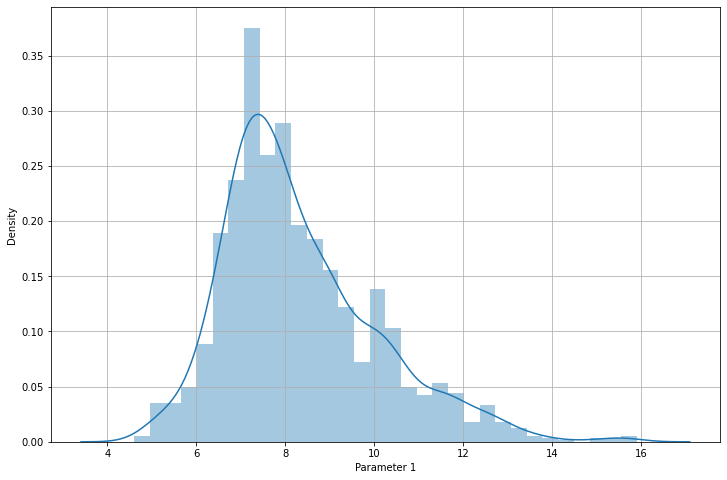

In [126]:
plt.figure(figsize=(12,8))
plt.grid()
sns.distplot(df['Parameter 1'])

In [127]:
# Ho = "The column is not normally distributed"
# Ha = "The column is normally distributed"
stat,Pvalue = shapiro(df['Parameter 1'])
if Pvalue<0.5:
    print(f"We reject null hypothesis as pvalue is {round(Pvalue)} and the data is normally distributed")
else:
    print("We fail to reject null hypothesis")

We reject null hypothesis as pvalue is 0 and the data is normally distributed


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 1'>

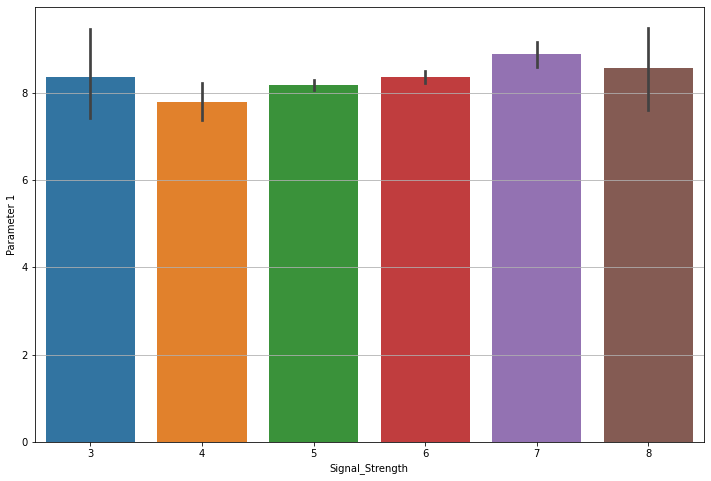

In [128]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df['Signal_Strength'],df['Parameter 1'])
#We see a very mild connection between target and parameter 1

In [129]:
# Ho = "There is no connect between Parameter 1 and target"
# Ha = "There is a connect between Parameter 1 and target"

stat,Pvalue = f_oneway(df[df['Signal_Strength']==3]['Parameter 1'],df[df['Signal_Strength']==4]['Parameter 1'],df[df['Signal_Strength']==5]['Parameter 1'],df[df['Signal_Strength']==6]['Parameter 1'],df[df['Signal_Strength']==7]['Parameter 1'],df[df['Signal_Strength']==8]['Parameter 1'])
if Pvalue<0.5:
    print(f"We reject null hypothesis as pvalue is {round(Pvalue)} and there is a connect between Parameter 1 and target")
else:
    print("We fail to reject null hypothesis")

We reject null hypothesis as pvalue is 0 and there is a connect between Parameter 1 and target


<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 1'>

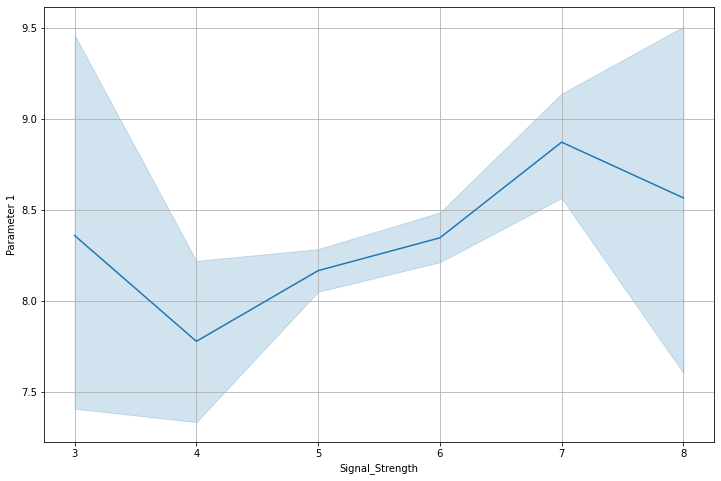

In [130]:
plt.figure(figsize=(12,8))
plt.grid()
sns.lineplot(df['Signal_Strength'],df['Parameter 1'])

<AxesSubplot:xlabel='Parameter 1', ylabel='Parameter 9'>

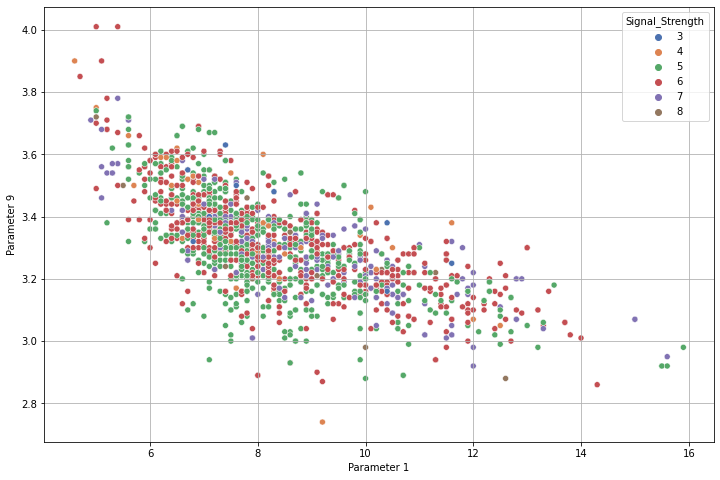

In [131]:
plt.figure(figsize=(12,8))
plt.grid()
sns.scatterplot(df['Parameter 1'],df['Parameter 9'],hue=df['Signal_Strength'],palette='deep')

<AxesSubplot:xlabel='Parameter 1', ylabel='Parameter 3'>

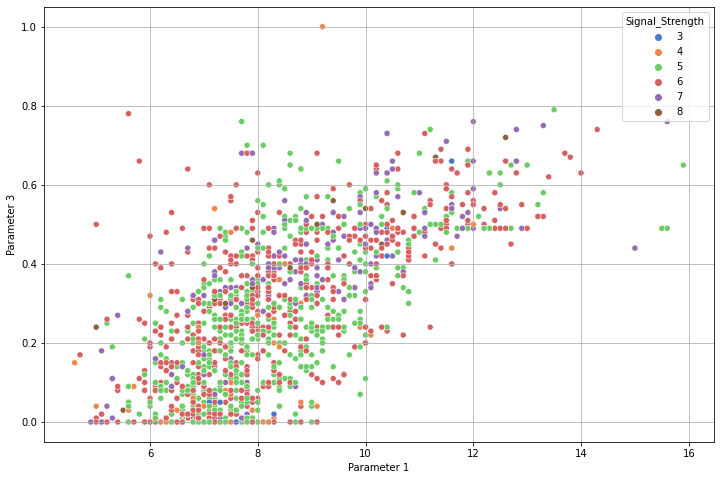

In [132]:
plt.figure(figsize=(12,8))
plt.grid()
sns.scatterplot(df['Parameter 1'],df['Parameter 3'],hue=df['Signal_Strength'],palette='muted')


<AxesSubplot:xlabel='Parameter 2', ylabel='Density'>

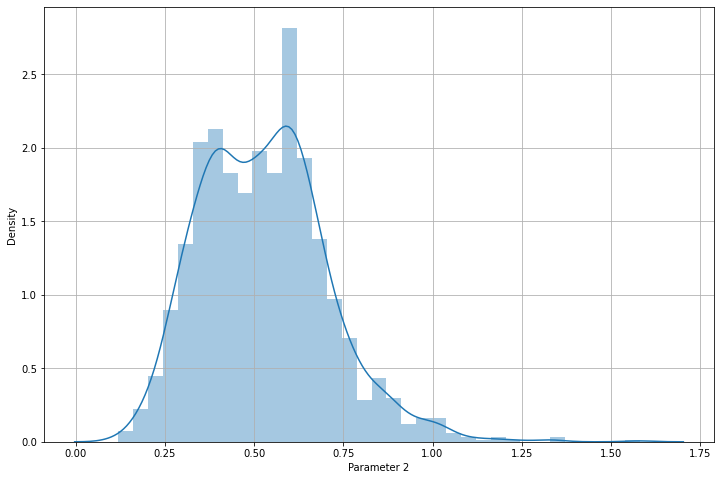

In [133]:
plt.figure(figsize=(12,8))
plt.grid()
sns.distplot(df['Parameter 2'])

<AxesSubplot:xlabel='Parameter 2'>

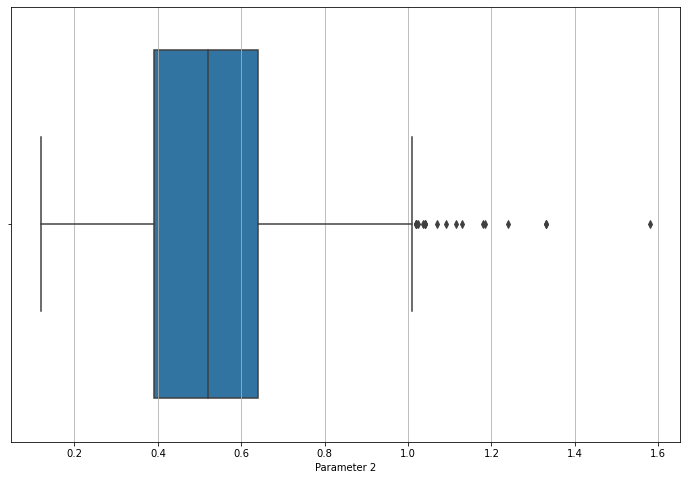

In [134]:
plt.figure(figsize=(12,8))
plt.grid()
sns.boxplot(df['Parameter 2'])

In [135]:
df.corr()['Parameter 2'].sort_values(ascending=False)

Parameter 2        1.000000
Parameter 9        0.234937
Parameter 7        0.076470
Parameter 5        0.061298
Parameter 8        0.022026
Parameter 4        0.001918
Parameter 6       -0.010504
Parameter 11      -0.202288
Parameter 1       -0.256131
Parameter 10      -0.260987
Signal_Strength   -0.390558
Parameter 3       -0.552496
Name: Parameter 2, dtype: float64

<AxesSubplot:xlabel='Parameter 2', ylabel='Parameter 3'>

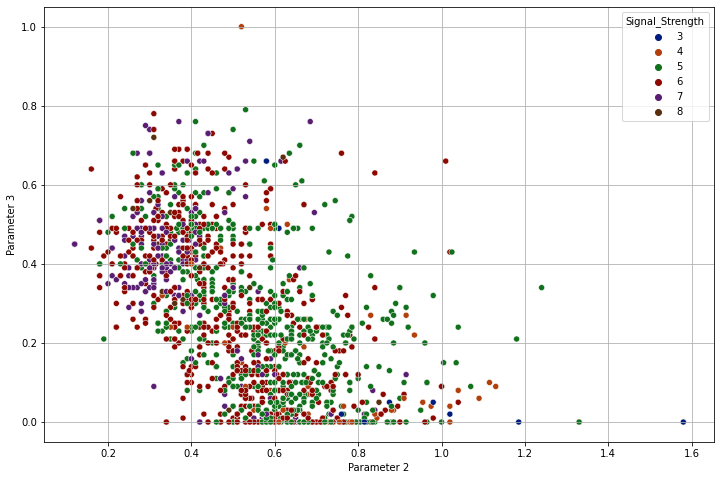

In [136]:
plt.figure(figsize=(12,8))
plt.grid()
sns.scatterplot(df['Parameter 2'],df['Parameter 3'],hue=df['Signal_Strength'],palette='dark')

<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 2'>

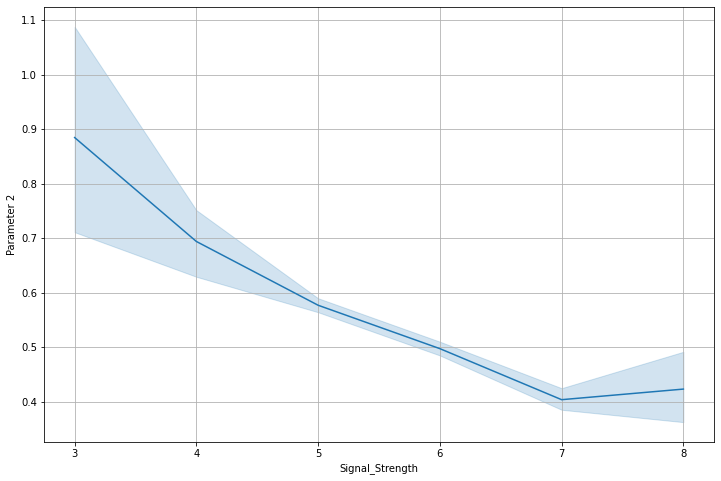

In [137]:
plt.figure(figsize=(12,8))
plt.grid()
sns.lineplot(df['Signal_Strength'],df['Parameter 2'])

<AxesSubplot:xlabel='Signal_Strength', ylabel='Parameter 3'>

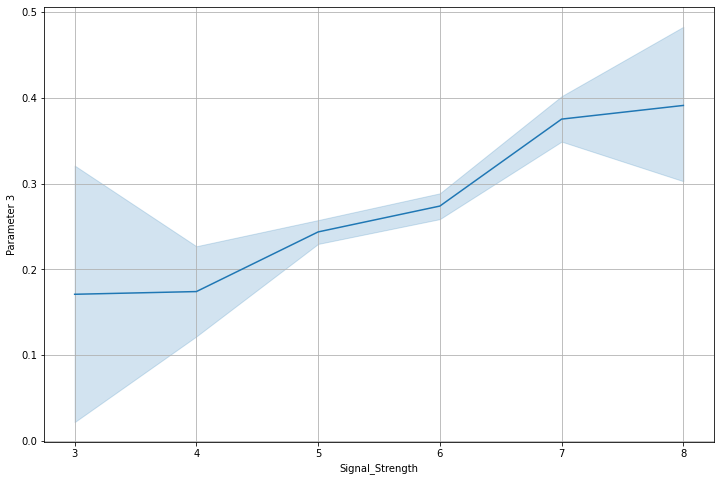

In [138]:
plt.figure(figsize=(12,8))
plt.grid()
sns.lineplot(df['Signal_Strength'],df['Parameter 3'])

<AxesSubplot:xlabel='Signal_Strength', ylabel='Feature3'>

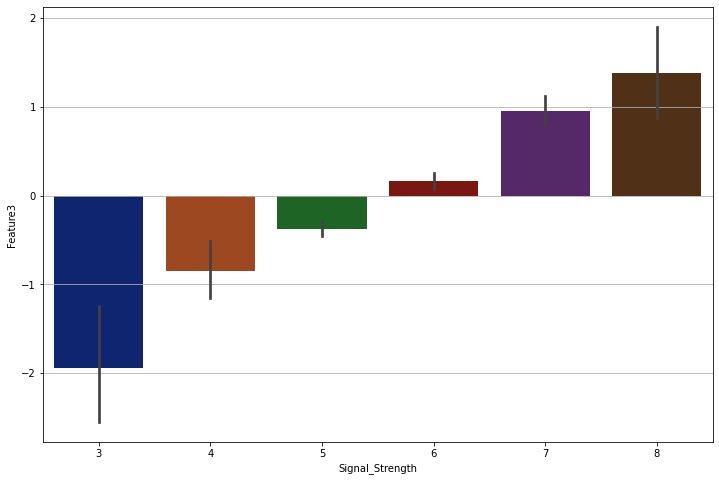

In [139]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df1['Signal_Strength'],df1['Feature3'],palette='dark')

In [147]:
df.corr()['Signal_Strength'].sort_values(ascending=False)

Signal_Strength    1.000000
Parameter 11       0.476166
Parameter 10       0.251397
Parameter 3        0.226373
Parameter 1        0.124052
Parameter 4        0.013732
Parameter 6       -0.050656
Parameter 9       -0.057731
Parameter 5       -0.128907
Parameter 8       -0.174919
Parameter 7       -0.185100
Parameter 2       -0.390558
Name: Signal_Strength, dtype: float64

In [142]:
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

<AxesSubplot:xlabel='Signal_Strength', ylabel='Feature2'>

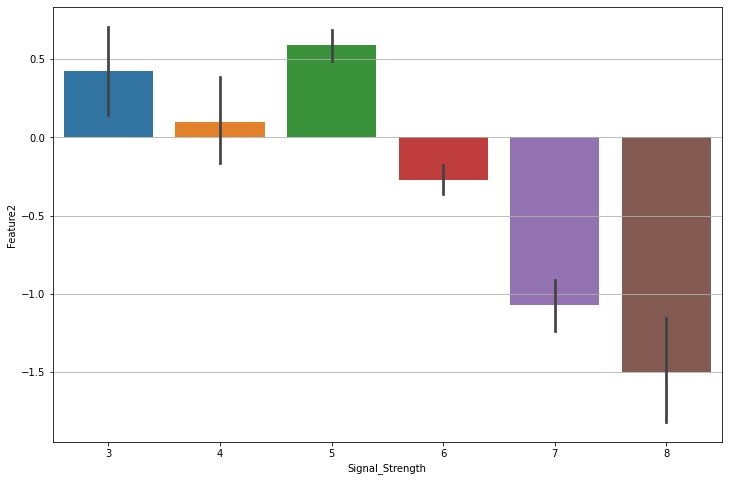

In [143]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df1['Signal_Strength'],df1['Feature2'])

<AxesSubplot:xlabel='Signal_Strength', ylabel='Feature5'>

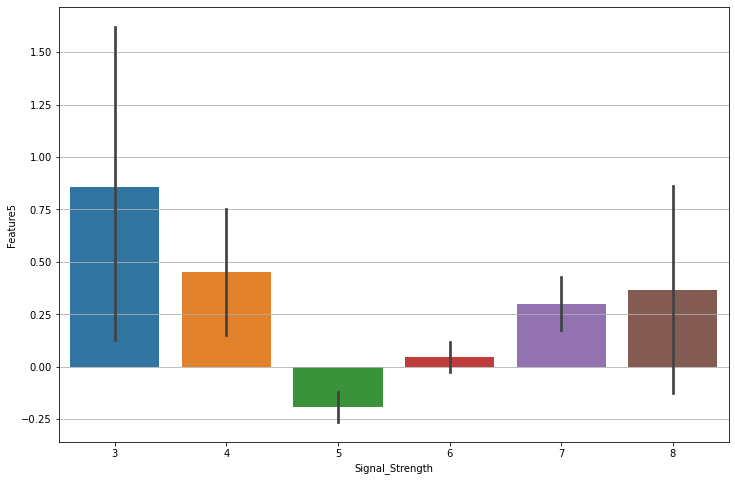

In [144]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df1['Signal_Strength'],df1['Feature5'])

<AxesSubplot:xlabel='Signal_Strength', ylabel='Feature4'>

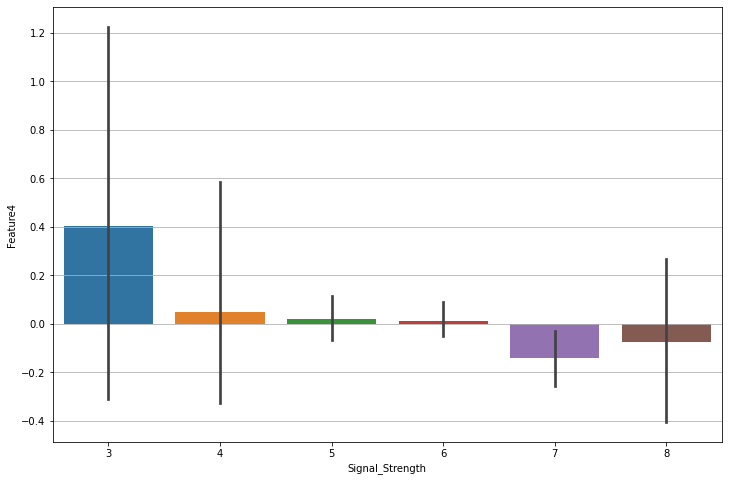

In [145]:
plt.figure(figsize=(12,8))
plt.grid()
sns.barplot(df1['Signal_Strength'],df1['Feature4'])

In [ ]:
# Ha = "The Signal_strength is not normally distributed"
# Ho = "The Signal_strength is normally distributed"

statistic,P_value = shapiro(df['Signal_Strength'])
if P_value<0.5:
    print("The signal strength is not normally distributed")
else:
    print("The signal strength is normally distributed")

# Design, train, tune and test a neural network classifier

In [477]:
df['Signal_Strength'].value_counts()

#We notice that the classes are imbalanced, we try to balance them using SMOTETomek Technique and also 
#the total size of data is just 1500 which is not enough for Neural Networks to train and predict

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

In [500]:
ST = SMOTETomek({4:640,8:640,3:640,7:650,6:700})
df['Signal_Strength'] = df['Signal_Strength'].astype('category')
X_resampled, y_resampled = ST.fit_resample(df.drop('Signal_Strength',axis=1),df['Signal_Strength'])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=11)
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [503]:
X_resampled.shape

(3743, 11)

In [504]:
y_resampled.value_counts()
#now it looks balanced

3    633
7    629
6    628
4    621
8    619
5    613
Name: Signal_Strength, dtype: int64

In [524]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [525]:
# y_train = np.array(pd.get_dummies(y_train))
# y_test = np.array(pd.get_dummies(y_test))

# Model with Adam Optimizer-  LR 0.08, Decay 1e-6, 500 epochs, Early stopping with patience of 15

In [527]:
ES = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
classifier = Sequential()
classifier.add(Dense(20,input_shape=(11,),activation='relu'))
classifier.add(Dense(15,activation='relu'))
classifier.add(Dense(7,activation='relu'))
classifier.add(Dense(9,activation='softmax'))
adam = optimizers.Adam(lr=0.08, decay=1e-6)
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[ES])

Epoch 1/500
82/82 [==============================] - 1s 5ms/step - loss: 2.0780 - accuracy: 0.2573 - val_loss: 1.9284 - val_accuracy: 0.3491
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.7428 - accuracy: 0.3737 - val_loss: 1.5671 - val_accuracy: 0.4007
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.4171 - accuracy: 0.4832 - val_loss: 1.2436 - val_accuracy: 0.5004
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1436 - accuracy: 0.5210 - val_loss: 1.0730 - val_accuracy: 0.5557
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0409 - accuracy: 0.5664 - val_loss: 1.0142 - val_accuracy: 0.5877
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.5878 - val_loss: 0.9732 - val_accuracy: 0.6002
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 0.9499 - accuracy: 0.6023 - val_loss: 0.9411 - val_accuracy: 0.6260
Epoch 8/500
8

Epoch 59/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7817 - val_loss: 0.6354 - val_accuracy: 0.7560
Epoch 60/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7821 - val_loss: 0.6256 - val_accuracy: 0.7569
Epoch 61/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7866 - val_loss: 0.6237 - val_accuracy: 0.7596
Epoch 62/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7828 - val_loss: 0.6223 - val_accuracy: 0.7596
Epoch 63/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7908 - val_loss: 0.6244 - val_accuracy: 0.7551
Epoch 64/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7844 - val_loss: 0.6197 - val_accuracy: 0.7605
Epoch 65/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7958 - val_loss: 0.6261 - val_accuracy: 0.7596
Epoch 

In [528]:
pred = classifier.predict_classes(X_test)

In [529]:
y_resampled.unique()

[5, 6, 7, 4, 8, 3]
Categories (6, int64): [5, 6, 7, 4, 8, 3]

In [530]:
actual = pd.Series([np.argmax(i) for i in y_test])

In [531]:
actual.unique()

array([6, 7, 3, 4, 8, 5], dtype=int64)

In [532]:
print(classification_report(pred,actual))

              precision    recall  f1-score   support

           3       1.00      0.96      0.98       200
           4       0.84      0.60      0.70       271
           5       0.34      0.46      0.39       132
           6       0.39      0.60      0.47       122
           7       0.79      0.72      0.75       215
           8       0.97      0.95      0.96       183

    accuracy                           0.73      1123
   macro avg       0.72      0.71      0.71      1123
weighted avg       0.77      0.73      0.74      1123



In [533]:
ES = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)
classfier2 = Sequential()
classfier2.add(Dense(20,input_shape=(11,),activation='relu'))
classfier2.add(Dense(10,activation='relu'))
classfier2.add(Dense(9,activation='softmax'))
adam = optimizers.Adam(lr=0.05, decay=1e-3)
classfier2.compile(optimizer=adam,metrics='accuracy',loss='categorical_crossentropy')
classfier2.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=ES)

Epoch 1/500
82/82 [==============================] - 1s 5ms/step - loss: 1.2320 - accuracy: 0.4767 - val_loss: 0.9943 - val_accuracy: 0.6126
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 0.9331 - accuracy: 0.6095 - val_loss: 0.9429 - val_accuracy: 0.5931
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 0.8823 - accuracy: 0.6286 - val_loss: 0.8929 - val_accuracy: 0.6465
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 0.8441 - accuracy: 0.6634 - val_loss: 0.8425 - val_accuracy: 0.6670
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 0.7934 - accuracy: 0.6733 - val_loss: 0.8220 - val_accuracy: 0.6572
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 0.7516 - accuracy: 0.7000 - val_loss: 0.7522 - val_accuracy: 0.6892
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 0.7380 - accuracy: 0.7019 - val_loss: 0.7598 - val_accuracy: 0.7053
Epoch 8/500
8

In [534]:
pred2 = classfier2.predict_classes(X_test)

In [535]:
actual2 = pd.Series([np.argmax(i) for i in y_test])

In [537]:
print(classification_report(pred2,actual2))

              precision    recall  f1-score   support

           3       1.00      0.96      0.98       199
           4       0.88      0.89      0.88       189
           5       0.56      0.65      0.60       153
           6       0.40      0.55      0.46       137
           7       0.91      0.67      0.77       263
           8       0.96      0.94      0.95       182

    accuracy                           0.79      1123
   macro avg       0.78      0.78      0.77      1123
weighted avg       0.82      0.79      0.79      1123



# Pickle the model for future use.

In [517]:
classfier2.save('classifier.h5')

In [519]:
x = load_model('classifier.h5')

## -> Even though the classes has been balanced, Neural Network requires a lot of data to learn and make good prediction.

## -> We are unable to push the model's metrics and if we were to use a model for deplyment, it will be classifier2 model.

# Part 3 - Clickable GUI

In [64]:
import tkinter as tk
from tkinter.filedialog import askopenfile

In [65]:
window = tk.Tk()
window.title("Neural Networks GUI")
canvas = tk.Canvas(window, width=800, height=50,borderwidth=2)
canvas.grid(columnspan=3, rowspan=30)

# Step1
lb1 = tk.Label(window, text="Step1: File name")
lb1.grid(column=0, row=5)
entry1 = tk.Button(window,width=20, text ='Click here to load file!!', command = lambda:open_file())
entry1.grid(column=1, row=5)
entry2 = tk.Button(window,text='Import Data',width=27,command=lambda:load_file())
entry2.grid(column=2, row=5)

# Step2
lb2 = tk.Label(window, text="Step2: Target Column")
lb2.grid(column=0, row=6)
inputtxt = tk.Text(window,height = 1,width = 20)
inputtxt.grid(column=1, row=6)
entry3 = tk.Button(window,text='Import Target',width=27,command=lambda:load_target())
entry3.grid(column=2, row=6)

# Step3
lb3 = tk.Label(window, text="Step3: Neural Network Regressor")
lb3.grid(column=0, row=7)
lb4 = tk.Label(window, text="Regression")
lb4.grid(column=0, row=8)
entry4 = tk.Button(window,text='Train',width=27,command=lambda:train_regressor())
entry4.grid(column=1, row=8)
lb5 = tk.Label(window, text="-->Regression-->")
lb5.grid(column=2, row=8)
lb6 = tk.Label(window, text="Pickle")
lb6.grid(column=0, row=9)
entry5 = tk.Button(window,text='Pickle',width=27,command=lambda:pickle_regressor())
entry5.grid(column=1, row=9)
lb7 = tk.Label(window, text="Pickle Model here")
lb7.grid(column=2, row=9)

#Step4
lb8 = tk.Label(window, text="Step4: Neural Network Classfier")
lb8.grid(column=0, row=10)
lb9 = tk.Label(window, text="Classification")
lb9.grid(column=0, row=11)
entry5 = tk.Button(window,text='Train',width=27,command=lambda:train_classfier())
entry5.grid(column=1, row=11)
lb10 = tk.Label(window, text="-->Classfier-->")
lb10.grid(column=2, row=11)
lb11 = tk.Label(window, text="Pickle")
lb11.grid(column=0, row=12)
entry6 = tk.Button(window,text='Pickle',width=27,command=lambda:pickle_classfier())
entry6.grid(column=1, row=12)
lb12 = tk.Label(window, text="Pickle Model here")
lb12.grid(column=2, row=12)
lb13 = tk.Label(window, text=".")
lb13.grid(column=0, row=14)
lb14 = tk.Label(window, text=".")
lb14.grid(column=1, row=14)
lb15 = tk.Label(window, text=".")
lb15.grid(column=2, row=14)


def pickle_classfier():
    classifier.save('NN_classfier_pickled.h5')
    lb12.configure(text="Model Pickled!!")


def train_classfier():
    global classifier
    ST = SMOTETomek({4:640,8:640,3:640,7:650,6:700})
    df[inputtxt.get(1.0, "end-1c")] = df[inputtxt.get(1.0, "end-1c")].astype('category')
    X_resampled, y_resampled = ST.fit_resample(df.drop(inputtxt.get(1.0, "end-1c"),axis=1),df[inputtxt.get(1.0, "end-1c")])
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=11)
    SS = StandardScaler()
    X_train = SS.fit_transform(X_train)
    X_test = SS.transform(X_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    ES = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
    classifier = Sequential()
    classifier.add(Dense(20,input_shape=(11,),activation='relu'))
    classifier.add(Dense(15,activation='relu'))
    classifier.add(Dense(7,activation='relu'))
    classifier.add(Dense(9,activation='sigmoid'))
    adam = optimizers.Adam(lr=0.08, decay=1e-6)
    classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    classifier.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[ES])
    lb10.configure(text="Training Complete!!")
    


def pickle_regressor():
    model6.save('NN_regressor_pickled.h5')
    lb7.configure(text="Model Pickled!!")
    

def train_regressor():
    global model6
    entry4.configure(text="Training -----> Please wait")
    ST = SMOTETomek({4:550,8:590,3:590,7:600})
    X_resampled, y_resampled = ST.fit_resample(df.drop(inputtxt.get(1.0, "end-1c"),axis=1),df[inputtxt.get(1.0, "end-1c")])
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=11)
    SS = StandardScaler()
    X_train = SS.fit_transform(X_train)
    X_test = SS.transform(X_test)
    ES = EarlyStopping(monitor='mean_squared_error',mode='min',verbose=1,patience=15)
    model6 = Sequential()
    model6.add(Dense(20,input_shape=(11,),activation='relu'))
    model6.add(Dense(10,activation='relu'))
    model6.add(Dense(5,activation='relu'))
    model6.add(Dense(3,activation='relu'))
    model6.add(Dense(1,activation='relu'))
    adam = optimizers.Adam(lr=0.05, decay=1e-2)
    model6.compile(optimizer=adam,metrics='mean_squared_error',loss='mean_squared_error')
    model6.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=ES)
    lb5.configure(text="Training Complete!!")

def load_target():
    if inputtxt.get(1.0, "end-1c") in df.columns:
        entry3.configure(text='Target found!!',width=27)
    else:
        entry3.configure(text='Target not found, Re-enter',width=35)

def load_file():
    if df.any:
        entry2.configure(text='File loaded Successfully!!!')
    else:
        entry2.configure(text='File not loaded, recheck')
        
def open_file():
    global df
    file = askopenfile(mode ='r', filetypes =[('Excel files','.csv')])
    df = pd.read_csv(file)
    




window.mainloop()

## We could also load the picked models to make predictions.

In [631]:
n = load_model('NN_regressor_pickled.h5')

In [633]:
n.predict(X_test)

array([[4.747287 ],
       [6.794597 ],
       [7.139029 ],
       ...,
       [3.0418382],
       [7.9781156],
       [4.607175 ]], dtype=float32)

In [634]:
o = load_model('NN_classfier_pickled.h5')

In [635]:
o.predict_classes(X_test)

array([6, 7, 7, ..., 3, 8, 4], dtype=int64)

# Part 4

# Import the data.

In [5]:
import h5py
f = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')
f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

# Loading the files from H5 file

In [6]:
X_test = np.array(f['X_test'])
X_train = np.array(f['X_train'])
X_val = np.array(f['X_val'])
y_test = np.array(f['y_test'])
y_train = np.array(f['y_train'])
y_val = np.array(f['y_val'])

In [7]:
X_train.shape

(42000, 32, 32)

In [8]:
X_test.shape

(18000, 32, 32)

In [9]:
X_val.shape

(60000, 32, 32)

In [10]:
y_train.shape

(42000,)

In [11]:
y_test.shape

(18000,)

In [12]:
y_val.shape

(60000,)

In [13]:
pd.Series(y_train).value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
4    4188
8    4188
0    4186
1    4172
6    4168
dtype: int64

# Data pre-processing and visualisation - Automated with OOPS

In [14]:
class Image_Neural_Network_Processing():
    '''
    ***********Developed by Raghavendra.S.K***********
    
    This datatype helps in reshaping the dataset. 
    
    1. It has methods such as dataset_shaping().Kindly pass your train and test dataset inside.
        The order to pass data set is......
        - X_train,X_test = dataset_shaping(x_train,y_train,x_test,y_test)
        
    2. You can also normalize the images if you have instantiated the object with X_train,X_test,y_train,y_test
        - X_train,X_test = image_normalization()
        
        Basic imports quick look (only for IDE,Jupyter,Colab):
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt
        %matplotlib inline
        import seaborn as sns
        import tensorflow as tf
        from tensorflow.keras.datasets import mnist
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dense,Dropout
        from tensorflow.keras.utils import to_categorical
        from tensorflow.keras import regularizers, optimizers
        from tensorflow.keras.callbacks import EarlyStopping
    
    ***********Developed by Raghavendra.S.K***********
    '''
    def dataset_shaping(self,x_train,y_train,x_test,y_test):
        self.X_train = x_train
        self.X_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        try:
            if len(self.X_train.shape)==3 & len(self.X_test.shape)==3:
                print(f"The shape of X_train was {self.X_train.shape}\n")
                print(f"The shape of X_test was {self.X_test.shape}\n")
                self.X_train = self.X_train.reshape(self.X_train.shape[0],(self.X_train.shape[1]*self.X_train.shape[2]))
                self.X_test = self.X_test.reshape(self.X_test.shape[0],(self.X_test.shape[1]*self.X_test.shape[2]))
                print(f"X_train has been reshaped to {self.X_train.shape}\n")
                print(f"X_test has been reshaped to {self.X_test.shape}\n")
                return self.X_train,self.X_test
            elif len(self.X_train.shape)==3 | len(self.X_test.shape)==3:
                if len(self.X_train.shape) == 3:
                    print(f"The shape of X_train was {self.X_train.shape}\n")
                    self.X_train = self.X_train.reshape(self.X_train.shape[0],(self.X_train.shape[1]*self.X_train.shape[2]))
                    print(f"X_train has been reshaped to {self.X_train.shape}\n")
                    print(f"The X_train remains in correct shape self.{X_train.shape}, recheck if necessary and X_test is not reshaped")
                    return self.X_train
                elif len(self.X_test.shape) == 3:
                    print(f"The shape of X_test was {self.X_test.shape}\n")
                    self.X_test = self.X_test.reshape(self.X_test.shape[0],(self.X_test.shape[1]*self.X_test.shape[2]))
                    print(f"X_test has been reshaped to {self.X_test.shape}\n")
                    print(f"The X_test remains in correct shape {self.X_test.shape}, recheck if necessary and X_train is not reshaped")
                    return self.X_test
            else:
                print(f"Please check both train and test datasets")
        except:
            print(f"You have already run the datasets in the datatype")
            
    def image_normalization(self):
        try:
            if (self.X_train.max()<=255) & (self.X_test.max()<=255):
                print("Image detected - Data normalized!!")
                self.X_train = self.X_train/255
                self.X_test = self.X_test/255
                return self.X_train,self.X_test
        except:
            if (self.X_train.max()<=255) | (self.X_test.max()<=255):
                if self.X_train.max()<=255:
                    print("Only X_train is an image")
                    return self.X_train/255
                elif self.X_test.max()<=255:
                    print("Only X_test is an image")
                    return self.X_test/255
                else:
                    print("None of the inputs shared are images to perform image normalization")

In [15]:
nn = Image_Neural_Network_Processing()

In [16]:
X_train,X_test = nn.dataset_shaping(X_train,y_train,X_test,y_test)

The shape of X_train was (42000, 32, 32)

The shape of X_test was (18000, 32, 32)

X_train has been reshaped to (42000, 1024)

X_test has been reshaped to (18000, 1024)



In [17]:
X_train,X_test = nn.image_normalization()

Image detected - Data normalized!!


### Visuvalizing the image 

8


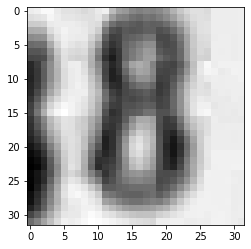

In [17]:
print(y_train[110])
plt.imshow(X_train.reshape(42000,32,32,1)[110],cmap='gray')

In [20]:
pd.Series(y_train).unique()

# We notice numbers from 0 - 9 -> 10 classes

In [18]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#Converting the target to categorical columns

# Design, train, tune and test a neural network image classifier. 

## Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.

In [47]:
def RMS_prop_classifier(opt):
    model_metrics = pd.DataFrame(columns=['Model','Optimizer','Learning_rate','Momentum','Decay','Training Loss','Test Loss','Train_Acc','Test_Acc'])
    new_dict = {}
    lr = [0.01,0.05,0.1,0.5,0.001,0.005]
    Momentum = [0.8,0.6,0.4]
    decay = [1e-6,1e-4,1e-2,1]
    try:
        i = model_metrics['Model'].iloc[-1]
        i+=1
    except:
        i = 1
    for l in lr:
        for m in Momentum:
            for d in decay:
                image_model = Sequential()
                image_model.add(Dense(500,input_shape=(1024,),activation='relu'))
                image_model.add(Dense(400,activation='relu'))
                image_model.add(Dense(300,activation='relu'))
                image_model.add(Dense(200,activation='relu'))
                image_model.add(Dense(100,activation='relu'))
                image_model.add(Dense(50,activation='relu'))
                image_model.add(Dense(10,activation='softmax'))
                sgd = optimizers.SGD(lr=l, decay=d, momentum=m)
                image_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
                image_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))
                
                training_acc = image_model.evaluate(X_train,y_train)[1]
                testing_acc = image_model.evaluate(X_test,y_test)[1]
                
                train_loss =image_model.evaluate(X_train,y_train)[0]
                test_loss = image_model.evaluate(X_test,y_test)[1]
                
                dd = {'Model':i,'Optimizer':opt,'Learning_rate':l,'Momentum':m,'Decay':d,'Training Loss':train_loss,'Test Loss':test_loss,'Train_Acc':training_acc,'Test_Acc':testing_acc}
                model_metrics = model_metrics.append(dd,ignore_index=True) 
                i+=1
    return model_metrics    




#Momentum0.6 - accuracy 96% training loss 10% val_loss-1.03

In [48]:
classifier_data_SGD = RMS_prop_classifier('SGD')

Epoch 1/10
1313/1313 [==============================] - 13s 9ms/step - loss: 2.0768 - accuracy: 0.2237 - val_loss: 1.4869 - val_accuracy: 0.4877
Epoch 2/10
1313/1313 [==============================] - 12s 9ms/step - loss: 1.4168 - accuracy: 0.5152 - val_loss: 1.2815 - val_accuracy: 0.5647
Epoch 3/10
1313/1313 [==============================] - 13s 10ms/step - loss: 1.1662 - accuracy: 0.6186 - val_loss: 1.2271 - val_accuracy: 0.6001
Epoch 4/10
1313/1313 [==============================] - 12s 9ms/step - loss: 1.0362 - accuracy: 0.6676 - val_loss: 1.0838 - val_accuracy: 0.6547
Epoch 5/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.9426 - accuracy: 0.6962 - val_loss: 0.9095 - val_accuracy: 0.7066
Epoch 6/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.8757 - accuracy: 0.7198 - val_loss: 1.0862 - val_accuracy: 0.6517
Epoch 7/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.8232 - accuracy: 0.7359 - val_loss: 0.8093 - val_a

563/563 [==============================] - 2s 4ms/step - loss: 0.7580 - accuracy: 0.7633
Epoch 1/10
1313/1313 [==============================] - 14s 10ms/step - loss: 2.2023 - accuracy: 0.1865 - val_loss: 2.0126 - val_accuracy: 0.2565
Epoch 2/10
1313/1313 [==============================] - 14s 10ms/step - loss: 1.6668 - accuracy: 0.4227 - val_loss: 1.5322 - val_accuracy: 0.4820
Epoch 3/10
1313/1313 [==============================] - 13s 10ms/step - loss: 1.3427 - accuracy: 0.5601 - val_loss: 1.2452 - val_accuracy: 0.5958
Epoch 4/10
1313/1313 [==============================] - 13s 10ms/step - loss: 1.1456 - accuracy: 0.6353 - val_loss: 1.2522 - val_accuracy: 0.5864
Epoch 5/10
1313/1313 [==============================] - 13s 10ms/step - loss: 1.0252 - accuracy: 0.6777 - val_loss: 1.0685 - val_accuracy: 0.6583
Epoch 6/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.9479 - accuracy: 0.7006 - val_loss: 0.9224 - val_accuracy: 0.7123
Epoch 7/10
1313/1313 [=============

563/563 [==============================] - 2s 3ms/step - loss: 0.7354 - accuracy: 0.7706
Epoch 1/10
1313/1313 [==============================] - 12s 8ms/step - loss: 2.1859 - accuracy: 0.2198 - val_loss: 1.8515 - val_accuracy: 0.3596
Epoch 2/10
1313/1313 [==============================] - 11s 8ms/step - loss: 1.6652 - accuracy: 0.4313 - val_loss: 1.5659 - val_accuracy: 0.4685
Epoch 3/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.4401 - accuracy: 0.5318 - val_loss: 1.3649 - val_accuracy: 0.5567
Epoch 4/10
1313/1313 [==============================] - 11s 8ms/step - loss: 1.3122 - accuracy: 0.5793 - val_loss: 1.2682 - val_accuracy: 0.5980
Epoch 5/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.2338 - accuracy: 0.6068 - val_loss: 1.2424 - val_accuracy: 0.5894
Epoch 6/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.1775 - accuracy: 0.6271 - val_loss: 1.1708 - val_accuracy: 0.6310
Epoch 7/10
1313/1313 [===================

563/563 [==============================] - 2s 3ms/step - loss: 0.9163 - accuracy: 0.7116
Epoch 1/10
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3002 - accuracy: 0.1072 - val_loss: 2.2991 - val_accuracy: 0.1127
Epoch 2/10
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2987 - accuracy: 0.1122 - val_loss: 2.2985 - val_accuracy: 0.1119
Epoch 3/10
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2983 - accuracy: 0.1149 - val_loss: 2.2982 - val_accuracy: 0.1122
Epoch 4/10
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2980 - accuracy: 0.1156 - val_loss: 2.2980 - val_accuracy: 0.1137
Epoch 5/10
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2978 - accuracy: 0.1164 - val_loss: 2.2979 - val_accuracy: 0.1134
Epoch 6/10
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2977 - accuracy: 0.1169 - val_loss: 2.2977 - val_accuracy: 0.1141
Epoch 7/10
1313/1313 [===================

563/563 [==============================] - 2s 4ms/step - loss: 2.2973 - accuracy: 0.1526
Epoch 1/10
1313/1313 [==============================] - 14s 10ms/step - loss: 2.3212 - accuracy: 0.1003 - val_loss: 2.3146 - val_accuracy: 0.1008
Epoch 2/10
1313/1313 [==============================] - 13s 10ms/step - loss: 2.3208 - accuracy: 0.1000 - val_loss: 2.3279 - val_accuracy: 0.0955
Epoch 3/10
1313/1313 [==============================] - 12s 9ms/step - loss: 2.3200 - accuracy: 0.1000 - val_loss: 2.3174 - val_accuracy: 0.1007
Epoch 4/10
1313/1313 [==============================] - 13s 10ms/step - loss: 2.3207 - accuracy: 0.0989 - val_loss: 2.3230 - val_accuracy: 0.0955
Epoch 5/10
1313/1313 [==============================] - 12s 9ms/step - loss: 2.3198 - accuracy: 0.1005 - val_loss: 2.3128 - val_accuracy: 0.1018
Epoch 6/10
1313/1313 [==============================] - 13s 10ms/step - loss: 2.3204 - accuracy: 0.0983 - val_loss: 2.3236 - val_accuracy: 0.1008
Epoch 7/10
1313/1313 [===============

563/563 [==============================] - 2s 4ms/step - loss: 2.3090 - accuracy: 0.1018
Epoch 1/10
1313/1313 [==============================] - 13s 9ms/step - loss: 2.3090 - accuracy: 0.0988 - val_loss: 2.3154 - val_accuracy: 0.1018
Epoch 2/10
1313/1313 [==============================] - 11s 9ms/step - loss: 2.3081 - accuracy: 0.0982 - val_loss: 2.3059 - val_accuracy: 0.0982
Epoch 3/10
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3072 - accuracy: 0.0992 - val_loss: 2.3061 - val_accuracy: 0.1007
Epoch 4/10
1313/1313 [==============================] - 11s 9ms/step - loss: 2.3066 - accuracy: 0.1013 - val_loss: 2.3122 - val_accuracy: 0.1007
Epoch 5/10
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3063 - accuracy: 0.1006 - val_loss: 2.3067 - val_accuracy: 0.1007
Epoch 6/10
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3060 - accuracy: 0.1003 - val_loss: 2.3083 - val_accuracy: 0.1007
Epoch 7/10
1313/1313 [===================

563/563 [==============================] - 2s 3ms/step - loss: 1.5137 - accuracy: 0.5126
Epoch 1/10
1313/1313 [==============================] - 12s 8ms/step - loss: 2.3018 - accuracy: 0.1156 - val_loss: 2.3004 - val_accuracy: 0.1220
Epoch 2/10
1313/1313 [==============================] - 11s 8ms/step - loss: 2.2999 - accuracy: 0.1247 - val_loss: 2.2997 - val_accuracy: 0.1268
Epoch 3/10
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2994 - accuracy: 0.1283 - val_loss: 2.2993 - val_accuracy: 0.1296
Epoch 4/10
1313/1313 [==============================] - 11s 8ms/step - loss: 2.2990 - accuracy: 0.1295 - val_loss: 2.2991 - val_accuracy: 0.1314
Epoch 5/10
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2988 - accuracy: 0.1303 - val_loss: 2.2989 - val_accuracy: 0.1317
Epoch 6/10
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2986 - accuracy: 0.1316 - val_loss: 2.2987 - val_accuracy: 0.1318
Epoch 7/10
1313/1313 [===================

563/563 [==============================] - 2s 3ms/step - loss: 2.2296 - accuracy: 0.2676
Epoch 1/10
1313/1313 [==============================] - 12s 9ms/step - loss: 2.3042 - accuracy: 0.0947 - val_loss: 2.3021 - val_accuracy: 0.0963
Epoch 2/10
1313/1313 [==============================] - 10s 8ms/step - loss: 2.3034 - accuracy: 0.0964 - val_loss: 2.3019 - val_accuracy: 0.0960
Epoch 3/10
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3032 - accuracy: 0.0970 - val_loss: 2.3017 - val_accuracy: 0.0964
Epoch 4/10
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3031 - accuracy: 0.0971 - val_loss: 2.3016 - val_accuracy: 0.0963
Epoch 5/10
1313/1313 [==============================] - 11s 9ms/step - loss: 2.3030 - accuracy: 0.0971 - val_loss: 2.3016 - val_accuracy: 0.0973
Epoch 6/10
1313/1313 [==============================] - 11s 9ms/step - loss: 2.3030 - accuracy: 0.0975 - val_loss: 2.3015 - val_accuracy: 0.0973
Epoch 7/10
1313/1313 [===================

563/563 [==============================] - 2s 4ms/step - loss: 2.3036 - accuracy: 0.0988


In [49]:
notify()

In [50]:
classifier_data_SGD.to_csv("Final_model_status.csv")

# For visuvalization we use tensorboard:

In [55]:
from tensorflow.keras.callbacks import TensorBoard

In [56]:
log_directory = 'logs\\fit'
board = TensorBoard(log_dir=log_directory,histogram_freq=1,write_graph=True,write_images=True,
                    update_freq='epoch',profile_batch=2,embeddings_freq=1)

In [57]:
print(log_directory)

logs\fit


# Out of 72 models built using SGD we notice that a model with 
##  - Learning rate 0.01
##  - Momentum 0.8
##  - Decay  0.0001
##  - This has a training loss of 0.61 and val_loss of 0.77 and training accuracy of 80.22% and test accuracy of 77.68%
## - Now, we try to add regularization (Dropout) to check if there is any improvement

In [58]:
ES = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=8)
image_model = Sequential()
image_model.add(Dense(500,input_shape=(1024,),activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(400,activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(300,activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(200,activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(100,activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(50,activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(10,activation='softmax'))
sgd = optimizers.SGD(lr=0.01, decay=0.0001, momentum=0.8)
image_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
image_model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),callbacks=[ES,board])

Epoch 1/200
1313/1313 [==============================] - 23s 17ms/step - loss: 2.3055 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 2/200
1313/1313 [==============================] - 17s 13ms/step - loss: 2.3033 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.1004
Epoch 3/200
1313/1313 [==============================] - 18s 13ms/step - loss: 2.3027 - accuracy: 0.1012 - val_loss: 2.3022 - val_accuracy: 0.1188
Epoch 4/200
1313/1313 [==============================] - 24s 18ms/step - loss: 2.3017 - accuracy: 0.1080 - val_loss: 2.2976 - val_accuracy: 0.1146
Epoch 5/200
1313/1313 [==============================] - 18s 14ms/step - loss: 2.2371 - accuracy: 0.1420 - val_loss: 2.1035 - val_accuracy: 0.1748
Epoch 6/200
1313/1313 [==============================] - 16s 12ms/step - loss: 2.0583 - accuracy: 0.1933 - val_loss: 2.0053 - val_accuracy: 0.2052
Epoch 7/200
1313/1313 [==============================] - 20s 15ms/step - loss: 1.9804 - accuracy: 0.2177 - val_loss: 1

In [59]:
notify()

# With Dropout the models look much better with Training Accuracy 84.30% & Validation Accuracy 84.34% and Training loss of 0.5226 and validation loss of 0.5260.

# Models overall accuracy is at 84%

In [60]:
predi = image_model.predict_classes(X_test)
#Predicting the classes
actual = pd.Series([np.argmax(i) for i in y_test])

In [61]:
print(classification_report(actual,predi))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1814
           1       0.81      0.88      0.84      1828
           2       0.88      0.85      0.86      1803
           3       0.82      0.79      0.80      1719
           4       0.88      0.88      0.88      1812
           5       0.79      0.84      0.81      1768
           6       0.86      0.82      0.84      1832
           7       0.84      0.90      0.87      1808
           8       0.83      0.79      0.81      1812
           9       0.85      0.82      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



In [62]:
image_model.evaluate(X_train,y_train)[0]

1313/1313 [==============================] - 5s 3ms/step - loss: 0.3437 - accuracy: 0.8967


0.34367263317108154

In [63]:
confusion_matrix(actual,predi)

array([[1590,   37,   10,   25,   21,    3,   26,   31,   17,   54],
       [  22, 1610,   15,   30,   36,    9,   11,   60,   25,   10],
       [  16,   28, 1528,   36,   27,   12,    7,   93,   17,   39],
       [  13,   48,   39, 1353,   14,  144,   14,   39,   36,   19],
       [  21,   63,   32,   15, 1587,   10,   32,   12,    8,   32],
       [  18,   22,   12,   83,    9, 1478,   47,   12,   57,   30],
       [  38,   35,    9,   17,   41,   73, 1509,   14,   82,   14],
       [   7,   64,   40,   18,   14,   10,    6, 1619,   12,   18],
       [  32,   41,   25,   42,   24,   64,   85,   14, 1436,   49],
       [  54,   44,   30,   41,   21,   58,   10,   26,   48, 1472]],
      dtype=int64)

# Pickle model for future use

In [72]:
image_model.save("SVHN_Imageclassfier.H5")
image_model.save_weights("SVHN_Imageclassfier_Weights.H5")

INFO:tensorflow:Assets written to: SVHN_Imageclassfier.H5\assets


In [70]:
new_model = load_model('SVHN_Imageclassfier.H5')

In [71]:
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 500)               512500    
_________________________________________________________________
dropout_24 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_25 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_26 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 200)             

## 1.The current input size is (42000, 32, 32) converted to (4200,1024), we will work to resize the input sample to (42000, 28,28) so that its converted to (4200,1024) 784

## 2. Post this we will try applying the same models with SGD and Adam Optimizer

In [33]:
import cv2

X_train_resized = np.zeros((X_train.shape[0], 28, 28))
for i in range(X_train.shape[0]):
    X_train_resized[i,:,:] = cv2.resize(X_train[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

X_test_resized = np.zeros((X_test.shape[0], 28, 28))
for i in range(X_test.shape[0]):
    X_test_resized[i,:,:] = cv2.resize(X_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

In [35]:
X_train_resized,X_test_resized = nn.dataset_shaping(X_train_resized,y_train,X_test_resized,y_test)

The shape of X_train was (42000, 28, 28)

The shape of X_test was (18000, 28, 28)

X_train has been reshaped to (42000, 784)

X_test has been reshaped to (18000, 784)



In [36]:
X_train_resized,X_test_resized = nn.image_normalization()

Image detected - Data normalized!!


## With SGD optimizer - Model not performing well hence we stop training

In [ ]:
ES = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)
image_model_sgd = Sequential()
image_model_sgd.add(Dense(500,input_shape=(784,),activation='relu'))
image_model_sgd.add(Dense(400,activation='relu'))
image_model_sgd.add(Dense(300,activation='relu'))
image_model_sgd.add(Dense(200,activation='relu'))
image_model_sgd.add(Dense(100,activation='relu'))
image_model_sgd.add(Dense(50,activation='relu'))
image_model_sgd.add(Dense(10,activation='softmax'))
sgd = optimizers.SGD(lr=0.01, decay=0.0001, momentum=0.8)
image_model_sgd.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
image_model_sgd.fit(X_train_resized,y_train,epochs=200,validation_data=(X_test_resized,y_test),callbacks=ES)

Epoch 1/200
1313/1313 [==============================] - 12s 8ms/step - loss: 2.3030 - accuracy: 0.0977 - val_loss: 2.3030 - val_accuracy: 0.0955
Epoch 2/200
1313/1313 [==============================] - 17s 13ms/step - loss: 2.3029 - accuracy: 0.1003 - val_loss: 2.3032 - val_accuracy: 0.0955
Epoch 3/200
1313/1313 [==============================] - 12s 9ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 4/200
1313/1313 [==============================] - 13s 10ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3029 - val_accuracy: 0.1002
Epoch 5/200
1313/1313 [==============================] - 15s 12ms/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 6/200
1313/1313 [==============================] - 14s 11ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3032 - val_accuracy: 0.0955
Epoch 7/200
1313/1313 [==============================] - 17s 13ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3

# With Adam optimizer with default values - Model not performing well hence we stop training

In [46]:
ES = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)
image_model_adam = Sequential()
image_model_adam.add(Dense(500,input_shape=(784,),activation='relu'))
image_model_adam.add(Dense(400,activation='relu'))
image_model_adam.add(Dense(300,activation='relu'))
image_model_adam.add(Dense(200,activation='relu'))
image_model_adam.add(Dense(100,activation='relu'))
image_model_adam.add(Dense(50,activation='relu'))
image_model_adam.add(Dense(10,activation='softmax'))
image_model_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
image_model_adam.fit(X_train_resized,y_train,epochs=200,validation_data=(X_test_resized,y_test),callbacks=ES)

Epoch 1/200
1313/1313 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.1013 - val_loss: 2.3032 - val_accuracy: 0.0955
Epoch 2/200
1313/1313 [==============================] - 10s 8ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3029 - val_accuracy: 0.0982
Epoch 3/200
1313/1313 [==============================] - 10s 8ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.0955
Epoch 4/200
1313/1313 [==============================] - 10s 8ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3029 - val_accuracy: 0.0955
Epoch 5/200
1313/1313 [==============================] - 11s 9ms/step - loss: 2.3027 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.0982
Epoch 6/200
1313/1313 [==============================] - 13s 10ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 7/200
1313/1313 [==============================] - 13s 10ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3027

KeyboardInterrupt: 

# With SGD and regularization (Dropout) - Model does not train well

In [47]:
ES = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
image_model = Sequential()
image_model.add(Dense(500,input_shape=(784,),activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(400,activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(300,activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(200,activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(100,activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(50,activation='relu'))
image_model.add(Dropout(0.2))
image_model.add(Dense(10,activation='softmax'))
sgd = optimizers.SGD(lr=0.01, decay=0.0001, momentum=0.8)
image_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
image_model.fit(X_train_resized,y_train,epochs=200,validation_data=(X_test_resized,y_test),callbacks=ES)

Epoch 1/200
1313/1313 [==============================] - 15s 10ms/step - loss: 2.3030 - accuracy: 0.0996 - val_loss: 2.3038 - val_accuracy: 0.0955
Epoch 2/200
1313/1313 [==============================] - 13s 10ms/step - loss: 2.3030 - accuracy: 0.0967 - val_loss: 2.3028 - val_accuracy: 0.1007
Epoch 3/200
1313/1313 [==============================] - 13s 10ms/step - loss: 2.3030 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1007
Epoch 4/200
1313/1313 [==============================] - 14s 10ms/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3029 - val_accuracy: 0.1004
Epoch 5/200
1313/1313 [==============================] - 21s 16ms/step - loss: 2.3029 - accuracy: 0.0977 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 6/200
1313/1313 [==============================] - 15s 12ms/step - loss: 2.3028 - accuracy: 0.1021 - val_loss: 2.3031 - val_accuracy: 0.0982
Epoch 7/200
1313/1313 [==============================] - 15s 11ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2

# Plot  the  training  loss,  validation  loss  vs  number  of  epochs  and  training  accuracy,  validation  accuracy  vs  number  of epochs plot and write your observations on the same


## In order to display Training loss , validation loss vs no of epochs & training  accuracy,  validation  accuracy  vs  number  of epochs plot,  i couldn't find a solution online but came across something called as TensorBoard which looks to help with all of these details with minimal efforts and hence i have posted this in the form of video as i couldnt make a copy of tensorboard to share on uploads

## Steps to run TensorBoard, please run cells from heading mentioned below:

## Make sure you have done "pip install TensorBoard"
## - "For visuvalization we use tensorboard:"
## - Open Anaconda Prompt, CD into directory where you have placed this Project7.ipynb file and then type  "tensorboard --logdir logs\fit"


## Video link incase if Tensoboard dosen't load : https://youtu.be/7Dn9H13DBYI